In [1]:
import os 
import sys
from tqdm import tqdm
import importlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

module_path = '/home/lun/project-basileus/seq-gan/sgtlstm'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
if 'sgtlstm' in sys.modules:
    importlib.reload(sys.modules['sgtlstm'])

from sgtlstm.utils import load_fixed_length_sequence_from_pickle, create_dataset
from sgtlstm.utils import create_dataset
from sgtlstm.SeqGan import build_G, build_D
from sgtlstm.pretrain import pretrain_generator, pretrain_discriminator, create_self_regression_data_batch
from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

## Load data 

In [3]:
valid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/valid_sequences.pickle'
invalid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/invalid_sequences.pickle'

valid_event_type_seqs, valid_timestamp_seqs = load_fixed_length_sequence_from_pickle(valid_data_path, to_timedelta=True, end_token=0)
invalid_event_type_seqs, invalid_timestamp_seqs = load_fixed_length_sequence_from_pickle(invalid_data_path, to_timedelta=True, end_token=0)

## Global Variables 

In [4]:
BATCH_SIZE = 128
T = 10 + 1
VOCAB = ['END/PADDING', 'INIT', 'start', 'click', 'install']
EVENT_VOCAB_DIM = len(VOCAB)
EMB_DIM = 5
HIDDEN_DIM = 64
K_MIST = 2

END_TOKEN = 0
MAX_TIME = 1024

## G and D

In [5]:
# generator = build_G(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST,
#     return_sequence=False,
# )


# discriminator = build_D(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST
# )

## Pretrain G

In [20]:
pretrain_G_et = valid_event_type_seqs
pretrain_G_ts = valid_timestamp_seqs
pretrain_G_labels = np.ones((valid_event_type_seqs.shape[0], 1))

pretrain_G_features = (pretrain_G_et, pretrain_G_ts)
N_pretrain_G = pretrain_G_et.shape[0]

In [21]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

EPOCHS = 2
_TOTAL_STEPS = int(EPOCHS * N_pretrain_G / 1)

pretrain_G_dataset = create_dataset(pretrain_G_features,
                                  pretrain_G_labels,
                                  batch_size=1,
                                  epochs=EPOCHS,
                                  buffer_size=N_pretrain_G)

pretrained_generator = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
sigma > 1 !!


In [22]:
_TOTAL_STEPS

20000

In [ ]:
pretrain_gen_ce_loss_history = []
pretrain_gen_gaussian_loss_history = []
step = 0

for feature_sample, _ in tqdm(pretrain_G_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    gen_ce_loss, gen_gaussian_loss =  pretrain_generator(feature_sample, 
                                                         pretrained_generator,
                                                         event_vocab_dim=EVENT_VOCAB_DIM, 
                                                         verbose=False, 
                                                         weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, 
                                                         optimizer=OPTIMIZER)
        
    pretrain_gen_ce_loss_history.append(gen_ce_loss.numpy())
    pretrain_gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

1it [00:02,  2.35s/it]

Training Step: 2


2it [00:03,  2.06s/it]

Training Step: 3


3it [00:05,  1.91s/it]

Training Step: 4


4it [00:06,  1.82s/it]

Training Step: 5


5it [00:08,  1.70s/it]

Training Step: 6


6it [00:09,  1.67s/it]

Training Step: 7


7it [00:11,  1.59s/it]

Training Step: 8


8it [00:12,  1.60s/it]

Training Step: 9


9it [00:14,  1.54s/it]

Training Step: 10


10it [00:15,  1.55s/it]

Training Step: 11


11it [00:17,  1.50s/it]

Training Step: 12


12it [00:18,  1.53s/it]

Training Step: 13


13it [00:20,  1.50s/it]

Training Step: 14


14it [00:21,  1.52s/it]

Training Step: 15


15it [00:23,  1.49s/it]

Training Step: 16


16it [00:24,  1.52s/it]

Training Step: 17


17it [00:26,  1.49s/it]

Training Step: 18


18it [00:27,  1.53s/it]

Training Step: 19


19it [00:29,  1.49s/it]

Training Step: 20


20it [00:30,  1.51s/it]

Training Step: 21


21it [00:32,  1.48s/it]

Training Step: 22


22it [00:33,  1.50s/it]

Training Step: 23


23it [00:35,  1.47s/it]

Training Step: 24


24it [00:36,  1.51s/it]

Training Step: 25


25it [00:38,  1.48s/it]

Training Step: 26


26it [00:39,  1.50s/it]

Training Step: 27


27it [00:41,  1.48s/it]

Training Step: 28


28it [00:42,  1.51s/it]

Training Step: 29


29it [00:44,  1.48s/it]

Training Step: 30


30it [00:45,  1.50s/it]

Training Step: 31


31it [00:47,  1.52s/it]

Training Step: 32


32it [00:48,  1.48s/it]

Training Step: 33


33it [00:50,  1.50s/it]

Training Step: 34


34it [00:51,  1.47s/it]

Training Step: 35


35it [00:53,  1.49s/it]

Training Step: 36


36it [00:54,  1.47s/it]

Training Step: 37


37it [00:56,  1.50s/it]

Training Step: 38


38it [00:57,  1.47s/it]

Training Step: 39


39it [00:59,  1.50s/it]

Training Step: 40


40it [01:00,  1.47s/it]

Training Step: 41


41it [01:02,  1.50s/it]

Training Step: 42


42it [01:03,  1.47s/it]

Training Step: 43


43it [01:05,  1.50s/it]

Training Step: 44


44it [01:06,  1.47s/it]

Training Step: 45


45it [01:08,  1.50s/it]

Training Step: 46


46it [01:09,  1.48s/it]

Training Step: 47


47it [01:11,  1.51s/it]

Training Step: 48


48it [01:12,  1.47s/it]

Training Step: 49


49it [01:14,  1.50s/it]

Training Step: 50


50it [01:15,  1.47s/it]

Training Step: 51


51it [01:17,  1.50s/it]

Training Step: 52


52it [01:18,  1.47s/it]

Training Step: 53


53it [01:19,  1.49s/it]

Training Step: 54


54it [01:21,  1.46s/it]

Training Step: 55


55it [01:22,  1.50s/it]

Training Step: 56


56it [01:24,  1.47s/it]

Training Step: 57


57it [01:25,  1.49s/it]

Training Step: 58


58it [01:27,  1.52s/it]

Training Step: 59


59it [01:28,  1.49s/it]

Training Step: 60


60it [01:30,  1.51s/it]

Training Step: 61


61it [01:31,  1.49s/it]

Training Step: 62


62it [01:33,  1.51s/it]

Training Step: 63


63it [01:34,  1.47s/it]

Training Step: 64


64it [01:36,  1.51s/it]

Training Step: 65


65it [01:37,  1.48s/it]

Training Step: 66


66it [01:39,  1.50s/it]

Training Step: 67


67it [01:40,  1.47s/it]

Training Step: 68


68it [01:42,  1.50s/it]

Training Step: 69


69it [01:43,  1.48s/it]

Training Step: 70


70it [01:45,  1.50s/it]

Training Step: 71


71it [01:46,  1.47s/it]

Training Step: 72


72it [01:48,  1.51s/it]

Training Step: 73


73it [01:49,  1.48s/it]

Training Step: 74


74it [01:51,  1.53s/it]

Training Step: 75


75it [01:52,  1.52s/it]

Training Step: 76


76it [01:54,  1.54s/it]

Training Step: 77


77it [01:55,  1.50s/it]

Training Step: 78


78it [01:57,  1.52s/it]

Training Step: 79


79it [01:58,  1.48s/it]

Training Step: 80


80it [02:00,  1.49s/it]

Training Step: 81


81it [02:01,  1.46s/it]

Training Step: 82


82it [02:03,  1.49s/it]

Training Step: 83


83it [02:04,  1.47s/it]

Training Step: 84


84it [02:06,  1.50s/it]

Training Step: 85


85it [02:07,  1.52s/it]

Training Step: 86


86it [02:09,  1.49s/it]

Training Step: 87


87it [02:10,  1.52s/it]

Training Step: 88


88it [02:12,  1.48s/it]

Training Step: 89


89it [02:13,  1.49s/it]

Training Step: 90


90it [02:15,  1.46s/it]

Training Step: 91


91it [02:16,  1.49s/it]

Training Step: 92


92it [02:18,  1.46s/it]

Training Step: 93


93it [02:19,  1.48s/it]

Training Step: 94


94it [02:21,  1.46s/it]

Training Step: 95


95it [02:22,  1.49s/it]

Training Step: 96


96it [02:24,  1.46s/it]

Training Step: 97


97it [02:25,  1.48s/it]

Training Step: 98


98it [02:26,  1.47s/it]

Training Step: 99


99it [02:28,  1.49s/it]

Training Step: 100


100it [02:29,  1.47s/it]

Training Step: 101


101it [02:31,  1.50s/it]

Training Step: 102


102it [02:32,  1.47s/it]

Training Step: 103


103it [02:34,  1.49s/it]

Training Step: 104


104it [02:35,  1.46s/it]

Training Step: 105


105it [02:37,  1.49s/it]

Training Step: 106


106it [02:38,  1.46s/it]

Training Step: 107


107it [02:40,  1.51s/it]

Training Step: 108


108it [02:41,  1.47s/it]

Training Step: 109


109it [02:43,  1.49s/it]

Training Step: 110


110it [02:44,  1.46s/it]

Training Step: 111


111it [02:46,  1.50s/it]

Training Step: 112


112it [02:47,  1.54s/it]

Training Step: 113


113it [02:49,  1.51s/it]

Training Step: 114


114it [02:50,  1.52s/it]

Training Step: 115


115it [02:52,  1.49s/it]

Training Step: 116


116it [02:53,  1.50s/it]

Training Step: 117


117it [02:55,  1.49s/it]

Training Step: 118


118it [02:56,  1.51s/it]

Training Step: 119


119it [02:58,  1.48s/it]

Training Step: 120


120it [02:59,  1.50s/it]

Training Step: 121


121it [03:01,  1.47s/it]

Training Step: 122


122it [03:02,  1.50s/it]

Training Step: 123


123it [03:04,  1.47s/it]

Training Step: 124


124it [03:05,  1.51s/it]

Training Step: 125


125it [03:07,  1.48s/it]

Training Step: 126


126it [03:08,  1.50s/it]

Training Step: 127


127it [03:10,  1.48s/it]

Training Step: 128


128it [03:11,  1.50s/it]

Training Step: 129


129it [03:13,  1.48s/it]

Training Step: 130


130it [03:14,  1.52s/it]

Training Step: 131


131it [03:16,  1.50s/it]

Training Step: 132


132it [03:17,  1.53s/it]

Training Step: 133


133it [03:19,  1.51s/it]

Training Step: 134


134it [03:20,  1.53s/it]

Training Step: 135


135it [03:22,  1.50s/it]

Training Step: 136


136it [03:23,  1.53s/it]

Training Step: 137


137it [03:25,  1.49s/it]

Training Step: 138


138it [03:26,  1.52s/it]

Training Step: 139


139it [03:28,  1.54s/it]

Training Step: 140


140it [03:29,  1.49s/it]

Training Step: 141


141it [03:31,  1.52s/it]

Training Step: 142


142it [03:32,  1.49s/it]

Training Step: 143


143it [03:34,  1.50s/it]

Training Step: 144


144it [03:35,  1.48s/it]

Training Step: 145


145it [03:37,  1.52s/it]

Training Step: 146


146it [03:38,  1.49s/it]

Training Step: 147


147it [03:40,  1.50s/it]

Training Step: 148


148it [03:41,  1.47s/it]

Training Step: 149


149it [03:43,  1.50s/it]

Training Step: 150


150it [03:44,  1.47s/it]

Training Step: 151


151it [03:46,  1.50s/it]

Training Step: 152


152it [03:47,  1.47s/it]

Training Step: 153


153it [03:49,  1.50s/it]

Training Step: 154


154it [03:50,  1.47s/it]

Training Step: 155


155it [03:52,  1.50s/it]

Training Step: 156


156it [03:53,  1.47s/it]

Training Step: 157


157it [03:55,  1.50s/it]

Training Step: 158


239it [05:57,  1.49s/it]

Training Step: 240


240it [05:59,  1.51s/it]

Training Step: 241


241it [06:00,  1.49s/it]

Training Step: 242


242it [06:02,  1.51s/it]

Training Step: 243


243it [06:03,  1.48s/it]

Training Step: 244


244it [06:05,  1.52s/it]

Training Step: 245


245it [06:06,  1.49s/it]

Training Step: 246


246it [06:08,  1.52s/it]

Training Step: 247


247it [06:09,  1.49s/it]

Training Step: 248


248it [06:11,  1.51s/it]

Training Step: 249


249it [06:12,  1.48s/it]

Training Step: 250


250it [06:14,  1.51s/it]

Training Step: 251


251it [06:15,  1.48s/it]

Training Step: 252


252it [06:17,  1.50s/it]

Training Step: 253


253it [06:18,  1.47s/it]

Training Step: 254


254it [06:20,  1.50s/it]

Training Step: 255


255it [06:21,  1.47s/it]

Training Step: 256


256it [06:23,  1.50s/it]

Training Step: 257


257it [06:24,  1.52s/it]

Training Step: 258


258it [06:26,  1.50s/it]

Training Step: 259


259it [06:27,  1.52s/it]

Training Step: 260


260it [06:29,  1.49s/it]

Training Step: 261


261it [06:30,  1.50s/it]

Training Step: 262


262it [06:32,  1.48s/it]

Training Step: 263


263it [06:33,  1.50s/it]

Training Step: 264


264it [06:35,  1.47s/it]

Training Step: 265


265it [06:36,  1.50s/it]

Training Step: 266


266it [06:37,  1.48s/it]

Training Step: 267


267it [06:39,  1.50s/it]

Training Step: 268


268it [06:40,  1.47s/it]

Training Step: 269


269it [06:42,  1.50s/it]

Training Step: 270


270it [06:43,  1.48s/it]

Training Step: 271


271it [06:45,  1.51s/it]

Training Step: 272


272it [06:46,  1.48s/it]

Training Step: 273


273it [06:48,  1.51s/it]

Training Step: 274


274it [06:49,  1.48s/it]

Training Step: 275


275it [06:51,  1.50s/it]

Training Step: 276


276it [06:52,  1.48s/it]

Training Step: 277


277it [06:54,  1.50s/it]

Training Step: 278


278it [06:55,  1.48s/it]

Training Step: 279


279it [06:57,  1.52s/it]

Training Step: 280


280it [06:58,  1.48s/it]

Training Step: 281


281it [07:00,  1.51s/it]

Training Step: 282


282it [07:01,  1.48s/it]

Training Step: 283


283it [07:03,  1.51s/it]

Training Step: 284


284it [07:04,  1.48s/it]

Training Step: 285


285it [07:06,  1.51s/it]

Training Step: 286


286it [07:07,  1.48s/it]

Training Step: 287


287it [07:09,  1.51s/it]

Training Step: 288


288it [07:10,  1.48s/it]

Training Step: 289


289it [07:12,  1.51s/it]

Training Step: 290


290it [07:13,  1.48s/it]

Training Step: 291


291it [07:15,  1.50s/it]

Training Step: 292


292it [07:16,  1.47s/it]

Training Step: 293


293it [07:18,  1.50s/it]

Training Step: 294


294it [07:19,  1.47s/it]

Training Step: 295


295it [07:21,  1.50s/it]

Training Step: 296


296it [07:22,  1.48s/it]

Training Step: 297


297it [07:24,  1.50s/it]

Training Step: 298


298it [07:25,  1.49s/it]

Training Step: 299


299it [07:27,  1.53s/it]

Training Step: 300


300it [07:28,  1.49s/it]

Training Step: 301


301it [07:30,  1.53s/it]

Training Step: 302


302it [07:31,  1.50s/it]

Training Step: 303


303it [07:33,  1.52s/it]

Training Step: 304


304it [07:34,  1.49s/it]

Training Step: 305


305it [07:36,  1.52s/it]

Training Step: 306


306it [07:37,  1.50s/it]

Training Step: 307


307it [07:39,  1.53s/it]

Training Step: 308


308it [07:40,  1.51s/it]

Training Step: 309


309it [07:42,  1.53s/it]

Training Step: 310


310it [07:43,  1.50s/it]

Training Step: 311


311it [07:45,  1.53s/it]

Training Step: 312


312it [07:47,  1.51s/it]

Training Step: 313


313it [07:48,  1.54s/it]

Training Step: 314


314it [07:50,  1.51s/it]

Training Step: 315


315it [07:51,  1.54s/it]

Training Step: 316


316it [07:53,  1.51s/it]

Training Step: 317


317it [07:54,  1.55s/it]

Training Step: 318


318it [07:56,  1.50s/it]

Training Step: 319


319it [07:57,  1.52s/it]

Training Step: 320


320it [07:59,  1.49s/it]

Training Step: 321


321it [08:00,  1.51s/it]

Training Step: 322


322it [08:02,  1.49s/it]

Training Step: 323


323it [08:03,  1.51s/it]

Training Step: 324


324it [08:05,  1.48s/it]

Training Step: 325


325it [08:06,  1.51s/it]

Training Step: 326


326it [08:08,  1.49s/it]

Training Step: 327


327it [08:09,  1.51s/it]

Training Step: 328


328it [08:11,  1.48s/it]

Training Step: 329


329it [08:12,  1.51s/it]

Training Step: 330


330it [08:14,  1.47s/it]

Training Step: 331


331it [08:15,  1.50s/it]

Training Step: 332


332it [08:17,  1.47s/it]

Training Step: 333


333it [08:18,  1.49s/it]

Training Step: 334


334it [08:19,  1.46s/it]

Training Step: 335


335it [08:21,  1.49s/it]

Training Step: 336


336it [08:22,  1.46s/it]

Training Step: 337


337it [08:24,  1.51s/it]

Training Step: 338


338it [08:26,  1.50s/it]

Training Step: 339


339it [08:27,  1.53s/it]

Training Step: 340


340it [08:29,  1.51s/it]

Training Step: 341


341it [08:30,  1.53s/it]

Training Step: 342


342it [08:32,  1.51s/it]

Training Step: 343


343it [08:33,  1.53s/it]

Training Step: 344


344it [08:35,  1.51s/it]

Training Step: 345


345it [08:36,  1.54s/it]

Training Step: 346


346it [08:38,  1.51s/it]

Training Step: 347


347it [08:39,  1.53s/it]

Training Step: 348


348it [08:41,  1.50s/it]

Training Step: 349


349it [08:42,  1.53s/it]

Training Step: 350


350it [08:44,  1.49s/it]

Training Step: 351


351it [08:45,  1.51s/it]

Training Step: 352


352it [08:47,  1.48s/it]

Training Step: 353


353it [08:48,  1.50s/it]

Training Step: 354


354it [08:50,  1.47s/it]

Training Step: 355


355it [08:51,  1.50s/it]

Training Step: 356


356it [08:53,  1.46s/it]

Training Step: 357


357it [08:54,  1.49s/it]

Training Step: 358


358it [08:56,  1.47s/it]

Training Step: 359


359it [08:57,  1.50s/it]

Training Step: 360


360it [08:59,  1.48s/it]

Training Step: 361


361it [09:00,  1.50s/it]

Training Step: 362


362it [09:02,  1.47s/it]

Training Step: 363


363it [09:03,  1.50s/it]

Training Step: 364


364it [09:05,  1.47s/it]

Training Step: 365


365it [09:06,  1.51s/it]

Training Step: 366


366it [09:08,  1.49s/it]

Training Step: 367


367it [09:09,  1.51s/it]

Training Step: 368


368it [09:10,  1.47s/it]

Training Step: 369


369it [09:12,  1.50s/it]

Training Step: 370


370it [09:13,  1.47s/it]

Training Step: 371


371it [09:15,  1.50s/it]

Training Step: 372


372it [09:16,  1.48s/it]

Training Step: 373


373it [09:18,  1.51s/it]

Training Step: 374


374it [09:19,  1.49s/it]

Training Step: 375


375it [09:21,  1.51s/it]

Training Step: 376


376it [09:22,  1.47s/it]

Training Step: 377


377it [09:24,  1.50s/it]

Training Step: 378


378it [09:25,  1.48s/it]

Training Step: 379


379it [09:27,  1.51s/it]

Training Step: 380


380it [09:28,  1.47s/it]

Training Step: 381


381it [09:30,  1.50s/it]

Training Step: 382


382it [09:31,  1.47s/it]

Training Step: 383


383it [09:33,  1.50s/it]

Training Step: 384


384it [09:34,  1.46s/it]

Training Step: 385


385it [09:36,  1.49s/it]

Training Step: 386


386it [09:37,  1.46s/it]

Training Step: 387


387it [09:39,  1.48s/it]

Training Step: 388


388it [09:40,  1.46s/it]

Training Step: 389


389it [09:42,  1.52s/it]

Training Step: 390


390it [09:43,  1.48s/it]

Training Step: 391


391it [09:45,  1.51s/it]

Training Step: 392


392it [09:46,  1.48s/it]

Training Step: 393


393it [09:48,  1.51s/it]

Training Step: 394


394it [09:49,  1.47s/it]

Training Step: 395


395it [09:51,  1.49s/it]

Training Step: 396


396it [09:52,  1.45s/it]

Training Step: 397


397it [09:54,  1.48s/it]

Training Step: 398


398it [09:55,  1.46s/it]

Training Step: 399


399it [09:57,  1.50s/it]

Training Step: 400


400it [09:58,  1.47s/it]

Training Step: 401


401it [10:00,  1.50s/it]

Training Step: 402


402it [10:01,  1.47s/it]

Training Step: 403


403it [10:03,  1.50s/it]

Training Step: 404


404it [10:04,  1.47s/it]

Training Step: 405


405it [10:06,  1.51s/it]

Training Step: 406


406it [10:07,  1.48s/it]

Training Step: 407


407it [10:08,  1.45s/it]

Training Step: 408


408it [10:10,  1.48s/it]

Training Step: 409


409it [10:11,  1.50s/it]

Training Step: 410


410it [10:13,  1.47s/it]

Training Step: 411


411it [10:14,  1.49s/it]

Training Step: 412


412it [10:16,  1.47s/it]

Training Step: 413


413it [10:17,  1.49s/it]

Training Step: 414


414it [10:19,  1.46s/it]

Training Step: 415


415it [10:20,  1.50s/it]

Training Step: 416


416it [10:22,  1.46s/it]

Training Step: 417


417it [10:23,  1.50s/it]

Training Step: 418


418it [10:25,  1.47s/it]

Training Step: 419


419it [10:26,  1.51s/it]

Training Step: 420


420it [10:28,  1.47s/it]

Training Step: 421


421it [10:29,  1.50s/it]

Training Step: 422


422it [10:31,  1.47s/it]

Training Step: 423


423it [10:32,  1.50s/it]

Training Step: 424


424it [10:34,  1.48s/it]

Training Step: 425


425it [10:35,  1.50s/it]

Training Step: 426


426it [10:37,  1.47s/it]

Training Step: 427


427it [10:38,  1.50s/it]

Training Step: 428


428it [10:40,  1.46s/it]

Training Step: 429


429it [10:41,  1.49s/it]

Training Step: 430


430it [10:42,  1.46s/it]

Training Step: 431


431it [10:44,  1.49s/it]

Training Step: 432


432it [10:45,  1.46s/it]

Training Step: 433


433it [10:47,  1.49s/it]

Training Step: 434


434it [10:48,  1.46s/it]

Training Step: 435


435it [10:50,  1.49s/it]

Training Step: 436


436it [10:52,  1.51s/it]

Training Step: 437


437it [10:53,  1.47s/it]

Training Step: 438


438it [10:54,  1.50s/it]

Training Step: 439


439it [10:56,  1.48s/it]

Training Step: 440


440it [10:57,  1.51s/it]

Training Step: 441


441it [10:59,  1.47s/it]

Training Step: 442


442it [11:00,  1.50s/it]

Training Step: 443


443it [11:02,  1.47s/it]

Training Step: 444


444it [11:03,  1.49s/it]

Training Step: 445


445it [11:05,  1.46s/it]

Training Step: 446


446it [11:06,  1.49s/it]

Training Step: 447


447it [11:08,  1.47s/it]

Training Step: 448


448it [11:09,  1.49s/it]

Training Step: 449


449it [11:11,  1.47s/it]

Training Step: 450


450it [11:12,  1.50s/it]

Training Step: 451


451it [11:14,  1.47s/it]

Training Step: 452


452it [11:15,  1.49s/it]

Training Step: 453


453it [11:17,  1.46s/it]

Training Step: 454


454it [11:18,  1.49s/it]

Training Step: 455


455it [11:20,  1.46s/it]

Training Step: 456


456it [11:21,  1.48s/it]

Training Step: 457


457it [11:22,  1.46s/it]

Training Step: 458


458it [11:24,  1.48s/it]

Training Step: 459


459it [11:25,  1.45s/it]

Training Step: 460


460it [11:27,  1.48s/it]

Training Step: 461


461it [11:28,  1.45s/it]

Training Step: 462


462it [11:30,  1.48s/it]

Training Step: 463


463it [11:31,  1.45s/it]

Training Step: 464


464it [11:33,  1.47s/it]

Training Step: 465


465it [11:34,  1.45s/it]

Training Step: 466


466it [11:36,  1.48s/it]

Training Step: 467


467it [11:37,  1.51s/it]

Training Step: 468


468it [11:39,  1.47s/it]

Training Step: 469


469it [11:40,  1.50s/it]

Training Step: 470


470it [11:42,  1.46s/it]

Training Step: 471


471it [11:43,  1.49s/it]

Training Step: 472


472it [11:45,  1.46s/it]

Training Step: 473


473it [11:46,  1.49s/it]

Training Step: 474


474it [11:48,  1.47s/it]

Training Step: 475


475it [11:49,  1.49s/it]

Training Step: 476


476it [11:50,  1.46s/it]

Training Step: 477


477it [11:52,  1.48s/it]

Training Step: 478


478it [11:53,  1.46s/it]

Training Step: 479


479it [11:55,  1.49s/it]

Training Step: 480


480it [11:56,  1.46s/it]

Training Step: 481


481it [11:58,  1.48s/it]

Training Step: 482


482it [11:59,  1.47s/it]

Training Step: 483


483it [12:01,  1.50s/it]

Training Step: 484


484it [12:02,  1.47s/it]

Training Step: 485


485it [12:04,  1.50s/it]

Training Step: 486


486it [12:05,  1.47s/it]

Training Step: 487


487it [12:07,  1.49s/it]

Training Step: 488


488it [12:08,  1.47s/it]

Training Step: 489


489it [12:10,  1.50s/it]

Training Step: 490


490it [12:11,  1.48s/it]

Training Step: 491


491it [12:13,  1.50s/it]

Training Step: 492


492it [12:14,  1.47s/it]

Training Step: 493


493it [12:16,  1.49s/it]

Training Step: 494


494it [12:17,  1.48s/it]

Training Step: 495


495it [12:19,  1.49s/it]

Training Step: 496


496it [12:20,  1.46s/it]

Training Step: 497


497it [12:22,  1.48s/it]

Training Step: 498


498it [12:23,  1.51s/it]

Training Step: 499


499it [12:25,  1.48s/it]

Training Step: 500


500it [12:26,  1.50s/it]

Training Step: 501


501it [12:27,  1.46s/it]

Training Step: 502


502it [12:29,  1.49s/it]

Training Step: 503


503it [12:30,  1.46s/it]

Training Step: 504


504it [12:32,  1.49s/it]

Training Step: 505


505it [12:33,  1.47s/it]

Training Step: 506


506it [12:35,  1.49s/it]

Training Step: 507


507it [12:36,  1.47s/it]

Training Step: 508


508it [12:38,  1.50s/it]

Training Step: 509


509it [12:39,  1.46s/it]

Training Step: 510


510it [12:41,  1.50s/it]

Training Step: 511


511it [12:42,  1.47s/it]

Training Step: 512


512it [12:44,  1.50s/it]

Training Step: 513


513it [12:45,  1.47s/it]

Training Step: 514


514it [12:47,  1.50s/it]

Training Step: 515


515it [12:48,  1.47s/it]

Training Step: 516


516it [12:50,  1.50s/it]

Training Step: 517


517it [12:51,  1.46s/it]

Training Step: 518


518it [12:53,  1.48s/it]

Training Step: 519


519it [12:54,  1.46s/it]

Training Step: 520


520it [12:56,  1.51s/it]

Training Step: 521


521it [12:57,  1.49s/it]

Training Step: 522


522it [12:59,  1.52s/it]

Training Step: 523


523it [13:00,  1.51s/it]

Training Step: 524


524it [13:02,  1.52s/it]

Training Step: 525


525it [13:03,  1.48s/it]

Training Step: 526


526it [13:05,  1.51s/it]

Training Step: 527


527it [13:06,  1.48s/it]

Training Step: 528


528it [13:08,  1.50s/it]

Training Step: 529


529it [13:09,  1.51s/it]

Training Step: 530


530it [13:11,  1.48s/it]

Training Step: 531


531it [13:12,  1.51s/it]

Training Step: 532


532it [13:14,  1.47s/it]

Training Step: 533


533it [13:15,  1.50s/it]

Training Step: 534


534it [13:17,  1.47s/it]

Training Step: 535


535it [13:18,  1.49s/it]

Training Step: 536


536it [13:20,  1.46s/it]

Training Step: 537


537it [13:21,  1.49s/it]

Training Step: 538


538it [13:22,  1.46s/it]

Training Step: 539


539it [13:24,  1.49s/it]

Training Step: 540


540it [13:25,  1.47s/it]

Training Step: 541


541it [13:27,  1.49s/it]

Training Step: 542


542it [13:28,  1.47s/it]

Training Step: 543


543it [13:30,  1.49s/it]

Training Step: 544


544it [13:31,  1.46s/it]

Training Step: 545


545it [13:33,  1.49s/it]

Training Step: 546


546it [13:34,  1.46s/it]

Training Step: 547


547it [13:36,  1.50s/it]

Training Step: 548


548it [13:37,  1.47s/it]

Training Step: 549


549it [13:39,  1.52s/it]

Training Step: 550


550it [13:40,  1.49s/it]

Training Step: 551


551it [13:42,  1.52s/it]

Training Step: 552


552it [13:43,  1.51s/it]

Training Step: 553


553it [13:45,  1.54s/it]

Training Step: 554


554it [13:46,  1.49s/it]

Training Step: 555


555it [13:48,  1.51s/it]

Training Step: 556


556it [13:49,  1.47s/it]

Training Step: 557


557it [13:51,  1.49s/it]

Training Step: 558


558it [13:52,  1.46s/it]

Training Step: 559


559it [13:54,  1.49s/it]

Training Step: 560


560it [13:55,  1.51s/it]

Training Step: 561


561it [13:57,  1.47s/it]

Training Step: 562


562it [13:58,  1.50s/it]

Training Step: 563


563it [14:00,  1.47s/it]

Training Step: 564


564it [14:01,  1.50s/it]

Training Step: 565


565it [14:03,  1.46s/it]

Training Step: 566


566it [14:04,  1.49s/it]

Training Step: 567


567it [14:06,  1.47s/it]

Training Step: 568


568it [14:07,  1.50s/it]

Training Step: 569


569it [14:09,  1.47s/it]

Training Step: 570


570it [14:10,  1.50s/it]

Training Step: 571


571it [14:12,  1.47s/it]

Training Step: 572


572it [14:13,  1.50s/it]

Training Step: 573


573it [14:15,  1.47s/it]

Training Step: 574


574it [14:16,  1.50s/it]

Training Step: 575


575it [14:18,  1.47s/it]

Training Step: 576


576it [14:19,  1.49s/it]

Training Step: 577


577it [14:20,  1.46s/it]

Training Step: 578


578it [14:22,  1.49s/it]

Training Step: 579


579it [14:23,  1.46s/it]

Training Step: 580


580it [14:25,  1.49s/it]

Training Step: 581


581it [14:26,  1.46s/it]

Training Step: 582


582it [14:28,  1.50s/it]

Training Step: 583


583it [14:29,  1.47s/it]

Training Step: 584


584it [14:31,  1.49s/it]

Training Step: 585


585it [14:32,  1.46s/it]

Training Step: 586


586it [14:34,  1.50s/it]

Training Step: 587


587it [14:35,  1.47s/it]

Training Step: 588


588it [14:37,  1.50s/it]

Training Step: 589


589it [14:38,  1.46s/it]

Training Step: 590


590it [14:40,  1.49s/it]

Training Step: 591


591it [14:41,  1.51s/it]

Training Step: 592


592it [14:43,  1.48s/it]

Training Step: 593


593it [14:44,  1.50s/it]

Training Step: 594


594it [14:46,  1.47s/it]

Training Step: 595


595it [14:47,  1.50s/it]

Training Step: 596


596it [14:49,  1.47s/it]

Training Step: 597


597it [14:50,  1.49s/it]

Training Step: 598


598it [14:52,  1.46s/it]

Training Step: 599


599it [14:53,  1.49s/it]

Training Step: 600


600it [14:55,  1.46s/it]

Training Step: 601


601it [14:56,  1.49s/it]

Training Step: 602


602it [14:57,  1.46s/it]

Training Step: 603


603it [14:59,  1.49s/it]

Training Step: 604


604it [15:00,  1.46s/it]

Training Step: 605


605it [15:02,  1.49s/it]

Training Step: 606


606it [15:03,  1.46s/it]

Training Step: 607


607it [15:05,  1.50s/it]

Training Step: 608


608it [15:06,  1.47s/it]

Training Step: 609


609it [15:08,  1.50s/it]

Training Step: 610


610it [15:09,  1.46s/it]

Training Step: 611


611it [15:11,  1.48s/it]

Training Step: 612


612it [15:12,  1.46s/it]

Training Step: 613


613it [15:14,  1.49s/it]

Training Step: 614


614it [15:15,  1.46s/it]

Training Step: 615


615it [15:17,  1.49s/it]

Training Step: 616


616it [15:18,  1.46s/it]

Training Step: 617


617it [15:20,  1.49s/it]

Training Step: 618


618it [15:21,  1.46s/it]

Training Step: 619


619it [15:23,  1.50s/it]

Training Step: 620


620it [15:24,  1.47s/it]

Training Step: 621


621it [15:26,  1.50s/it]

Training Step: 622


622it [15:27,  1.52s/it]

Training Step: 623


623it [15:29,  1.49s/it]

Training Step: 624


624it [15:30,  1.51s/it]

Training Step: 625


625it [15:32,  1.48s/it]

Training Step: 626


626it [15:33,  1.51s/it]

Training Step: 627


627it [15:35,  1.48s/it]

Training Step: 628


628it [15:36,  1.50s/it]

Training Step: 629


629it [15:38,  1.48s/it]

Training Step: 630


630it [15:39,  1.51s/it]

Training Step: 631


631it [15:41,  1.47s/it]

Training Step: 632


632it [15:42,  1.51s/it]

Training Step: 633


633it [15:43,  1.47s/it]

Training Step: 634


634it [15:45,  1.50s/it]

Training Step: 635


635it [15:46,  1.48s/it]

Training Step: 636


636it [15:48,  1.53s/it]

Training Step: 637


637it [15:50,  1.50s/it]

Training Step: 638


638it [15:51,  1.53s/it]

Training Step: 639


639it [15:53,  1.49s/it]

Training Step: 640


640it [15:54,  1.51s/it]

Training Step: 641


641it [15:56,  1.49s/it]

Training Step: 642


642it [15:57,  1.52s/it]

Training Step: 643


643it [15:59,  1.50s/it]

Training Step: 644


644it [16:00,  1.51s/it]

Training Step: 645


645it [16:02,  1.48s/it]

Training Step: 646


646it [16:03,  1.50s/it]

Training Step: 647


647it [16:04,  1.47s/it]

Training Step: 648


648it [16:06,  1.49s/it]

Training Step: 649


649it [16:07,  1.47s/it]

Training Step: 650


650it [16:09,  1.49s/it]

Training Step: 651


651it [16:10,  1.47s/it]

Training Step: 652


652it [16:12,  1.49s/it]

Training Step: 653


653it [16:14,  1.51s/it]

Training Step: 654


654it [16:15,  1.50s/it]

Training Step: 655


655it [16:17,  1.52s/it]

Training Step: 656


656it [16:18,  1.49s/it]

Training Step: 657


657it [16:20,  1.51s/it]

Training Step: 658


658it [16:21,  1.48s/it]

Training Step: 659


659it [16:22,  1.50s/it]

Training Step: 660


660it [16:24,  1.47s/it]

Training Step: 661


661it [16:25,  1.50s/it]

Training Step: 662


662it [16:27,  1.47s/it]

Training Step: 663


663it [16:28,  1.50s/it]

Training Step: 664


664it [16:30,  1.48s/it]

Training Step: 665


665it [16:31,  1.50s/it]

Training Step: 666


666it [16:33,  1.47s/it]

Training Step: 667


667it [16:34,  1.50s/it]

Training Step: 668


668it [16:36,  1.48s/it]

Training Step: 669


669it [16:37,  1.52s/it]

Training Step: 670


670it [16:39,  1.48s/it]

Training Step: 671


671it [16:40,  1.52s/it]

Training Step: 672


672it [16:42,  1.49s/it]

Training Step: 673


673it [16:43,  1.51s/it]

Training Step: 674


674it [16:45,  1.49s/it]

Training Step: 675


675it [16:46,  1.51s/it]

Training Step: 676


676it [16:48,  1.48s/it]

Training Step: 677


677it [16:49,  1.50s/it]

Training Step: 678


678it [16:51,  1.47s/it]

Training Step: 679


679it [16:52,  1.49s/it]

Training Step: 680


680it [16:54,  1.47s/it]

Training Step: 681


681it [16:55,  1.50s/it]

Training Step: 682


682it [16:57,  1.48s/it]

Training Step: 683


683it [16:58,  1.50s/it]

Training Step: 684


684it [17:00,  1.52s/it]

Training Step: 685


685it [17:01,  1.49s/it]

Training Step: 686


686it [17:03,  1.52s/it]

Training Step: 687


687it [17:04,  1.50s/it]

Training Step: 688


688it [17:06,  1.53s/it]

Training Step: 689


689it [17:07,  1.50s/it]

Training Step: 690


690it [17:09,  1.52s/it]

Training Step: 691


691it [17:10,  1.49s/it]

Training Step: 692


692it [17:12,  1.51s/it]

Training Step: 693


693it [17:13,  1.48s/it]

Training Step: 694


694it [17:15,  1.50s/it]

Training Step: 695


695it [17:16,  1.48s/it]

Training Step: 696


696it [17:18,  1.51s/it]

Training Step: 697


697it [17:19,  1.47s/it]

Training Step: 698


698it [17:21,  1.50s/it]

Training Step: 699


699it [17:22,  1.47s/it]

Training Step: 700


700it [17:24,  1.50s/it]

Training Step: 701


701it [17:25,  1.48s/it]

Training Step: 702


702it [17:27,  1.52s/it]

Training Step: 703


703it [17:28,  1.48s/it]

Training Step: 704


704it [17:30,  1.51s/it]

Training Step: 705


705it [17:31,  1.48s/it]

Training Step: 706


706it [17:33,  1.51s/it]

Training Step: 707


707it [17:34,  1.47s/it]

Training Step: 708


708it [17:36,  1.51s/it]

Training Step: 709


709it [17:37,  1.48s/it]

Training Step: 710


710it [17:39,  1.51s/it]

Training Step: 711


711it [17:40,  1.48s/it]

Training Step: 712


712it [17:42,  1.50s/it]

Training Step: 713


713it [17:43,  1.47s/it]

Training Step: 714


714it [17:45,  1.50s/it]

Training Step: 715


715it [17:46,  1.52s/it]

Training Step: 716


716it [17:48,  1.49s/it]

Training Step: 717


717it [17:49,  1.51s/it]

Training Step: 718


718it [17:51,  1.48s/it]

Training Step: 719


719it [17:52,  1.52s/it]

Training Step: 720


720it [17:54,  1.49s/it]

Training Step: 721


721it [17:55,  1.52s/it]

Training Step: 722


722it [17:57,  1.49s/it]

Training Step: 723


723it [17:58,  1.51s/it]

Training Step: 724


724it [18:00,  1.48s/it]

Training Step: 725


725it [18:01,  1.51s/it]

Training Step: 726


726it [18:03,  1.49s/it]

Training Step: 727


727it [18:04,  1.54s/it]

Training Step: 728


728it [18:06,  1.51s/it]

Training Step: 729


729it [18:07,  1.54s/it]

Training Step: 730


730it [18:09,  1.50s/it]

Training Step: 731


731it [18:10,  1.52s/it]

Training Step: 732


732it [18:12,  1.49s/it]

Training Step: 733


733it [18:13,  1.51s/it]

Training Step: 734


734it [18:15,  1.48s/it]

Training Step: 735


735it [18:16,  1.51s/it]

Training Step: 736


736it [18:18,  1.48s/it]

Training Step: 737


737it [18:19,  1.52s/it]

Training Step: 738


738it [18:21,  1.48s/it]

Training Step: 739


739it [18:22,  1.50s/it]

Training Step: 740


740it [18:24,  1.48s/it]

Training Step: 741


741it [18:25,  1.50s/it]

Training Step: 742


742it [18:27,  1.50s/it]

Training Step: 743


743it [18:28,  1.51s/it]

Training Step: 744


744it [18:30,  1.48s/it]

Training Step: 745


745it [18:31,  1.50s/it]

Training Step: 746


746it [18:33,  1.52s/it]

Training Step: 747


747it [18:34,  1.50s/it]

Training Step: 748


748it [18:36,  1.53s/it]

Training Step: 749


749it [18:37,  1.48s/it]

Training Step: 750


750it [18:39,  1.51s/it]

Training Step: 751


751it [18:40,  1.48s/it]

Training Step: 752


752it [18:42,  1.51s/it]

Training Step: 753


753it [18:43,  1.48s/it]

Training Step: 754


754it [18:45,  1.51s/it]

Training Step: 755


755it [18:46,  1.48s/it]

Training Step: 756


756it [18:48,  1.53s/it]

Training Step: 757


757it [18:49,  1.50s/it]

Training Step: 758


758it [18:51,  1.53s/it]

Training Step: 759


759it [18:52,  1.51s/it]

Training Step: 760


760it [18:54,  1.54s/it]

Training Step: 761


761it [18:55,  1.51s/it]

Training Step: 762


762it [18:57,  1.54s/it]

Training Step: 763


763it [18:58,  1.49s/it]

Training Step: 764


764it [19:00,  1.51s/it]

Training Step: 765


765it [19:01,  1.48s/it]

Training Step: 766


766it [19:03,  1.50s/it]

Training Step: 767


767it [19:04,  1.47s/it]

Training Step: 768


768it [19:06,  1.50s/it]

Training Step: 769


769it [19:07,  1.47s/it]

Training Step: 770


770it [19:09,  1.49s/it]

Training Step: 771


771it [19:10,  1.46s/it]

Training Step: 772


772it [19:12,  1.49s/it]

Training Step: 773


773it [19:13,  1.46s/it]

Training Step: 774


774it [19:15,  1.49s/it]

Training Step: 775


775it [19:16,  1.46s/it]

Training Step: 776


776it [19:18,  1.49s/it]

Training Step: 777


777it [19:19,  1.52s/it]

Training Step: 778


778it [19:21,  1.48s/it]

Training Step: 779


779it [19:22,  1.50s/it]

Training Step: 780


780it [19:24,  1.48s/it]

Training Step: 781


781it [19:25,  1.51s/it]

Training Step: 782


782it [19:27,  1.48s/it]

Training Step: 783


783it [19:28,  1.51s/it]

Training Step: 784


784it [19:30,  1.48s/it]

Training Step: 785


785it [19:31,  1.51s/it]

Training Step: 786


786it [19:33,  1.48s/it]

Training Step: 787


787it [19:34,  1.50s/it]

Training Step: 788


788it [19:36,  1.48s/it]

Training Step: 789


789it [19:37,  1.50s/it]

Training Step: 790


790it [19:38,  1.47s/it]

Training Step: 791


791it [19:40,  1.50s/it]

Training Step: 792


792it [19:41,  1.47s/it]

Training Step: 793


793it [19:43,  1.50s/it]

Training Step: 794


794it [19:44,  1.47s/it]

Training Step: 795


795it [19:46,  1.51s/it]

Training Step: 796


796it [19:47,  1.48s/it]

Training Step: 797


797it [19:49,  1.51s/it]

Training Step: 798


798it [19:50,  1.48s/it]

Training Step: 799


799it [19:52,  1.50s/it]

Training Step: 800


800it [19:53,  1.47s/it]

Training Step: 801


801it [19:55,  1.50s/it]

Training Step: 802


802it [19:56,  1.47s/it]

Training Step: 803


803it [19:58,  1.50s/it]

Training Step: 804


804it [19:59,  1.47s/it]

Training Step: 805


805it [20:01,  1.50s/it]

Training Step: 806


806it [20:02,  1.48s/it]

Training Step: 807


807it [20:04,  1.51s/it]

Training Step: 808


808it [20:05,  1.53s/it]

Training Step: 809


809it [20:07,  1.49s/it]

Training Step: 810


810it [20:08,  1.53s/it]

Training Step: 811


811it [20:10,  1.49s/it]

Training Step: 812


812it [20:11,  1.52s/it]

Training Step: 813


813it [20:13,  1.48s/it]

Training Step: 814


814it [20:14,  1.51s/it]

Training Step: 815


815it [20:16,  1.48s/it]

Training Step: 816


816it [20:17,  1.50s/it]

Training Step: 817


817it [20:19,  1.47s/it]

Training Step: 818


818it [20:20,  1.50s/it]

Training Step: 819


819it [20:22,  1.47s/it]

Training Step: 820


820it [20:23,  1.50s/it]

Training Step: 821


821it [20:25,  1.46s/it]

Training Step: 822


822it [20:26,  1.50s/it]

Training Step: 823


823it [20:28,  1.47s/it]

Training Step: 824


824it [20:29,  1.50s/it]

Training Step: 825


825it [20:31,  1.47s/it]

Training Step: 826


826it [20:32,  1.49s/it]

Training Step: 827


827it [20:34,  1.47s/it]

Training Step: 828


828it [20:35,  1.50s/it]

Training Step: 829


829it [20:37,  1.47s/it]

Training Step: 830


830it [20:38,  1.50s/it]

Training Step: 831


831it [20:40,  1.47s/it]

Training Step: 832


832it [20:41,  1.50s/it]

Training Step: 833


833it [20:43,  1.47s/it]

Training Step: 834


834it [20:44,  1.49s/it]

Training Step: 835


835it [20:45,  1.46s/it]

Training Step: 836


836it [20:47,  1.49s/it]

Training Step: 837


837it [20:48,  1.47s/it]

Training Step: 838


838it [20:50,  1.50s/it]

Training Step: 839


839it [20:52,  1.52s/it]

Training Step: 840


840it [20:53,  1.49s/it]

Training Step: 841


841it [20:55,  1.52s/it]

Training Step: 842


842it [20:56,  1.48s/it]

Training Step: 843


843it [20:58,  1.51s/it]

Training Step: 844


844it [20:59,  1.48s/it]

Training Step: 845


845it [21:00,  1.50s/it]

Training Step: 846


846it [21:02,  1.48s/it]

Training Step: 847


847it [21:04,  1.52s/it]

Training Step: 848


848it [21:05,  1.48s/it]

Training Step: 849


849it [21:07,  1.51s/it]

Training Step: 850


850it [21:08,  1.48s/it]

Training Step: 851


851it [21:09,  1.50s/it]

Training Step: 852


852it [21:11,  1.46s/it]

Training Step: 853


853it [21:12,  1.49s/it]

Training Step: 854


854it [21:14,  1.46s/it]

Training Step: 855


855it [21:15,  1.49s/it]

Training Step: 856


856it [21:17,  1.46s/it]

Training Step: 857


857it [21:18,  1.48s/it]

Training Step: 858


858it [21:20,  1.47s/it]

Training Step: 859


859it [21:21,  1.49s/it]

Training Step: 860


860it [21:23,  1.45s/it]

Training Step: 861


861it [21:24,  1.47s/it]

Training Step: 862


862it [21:26,  1.44s/it]

Training Step: 863


863it [21:27,  1.47s/it]

Training Step: 864


864it [21:28,  1.45s/it]

Training Step: 865


865it [21:30,  1.48s/it]

Training Step: 866


866it [21:31,  1.46s/it]

Training Step: 867


867it [21:33,  1.48s/it]

Training Step: 868


868it [21:34,  1.46s/it]

Training Step: 869


869it [21:36,  1.48s/it]

Training Step: 870


870it [21:37,  1.51s/it]

Training Step: 871


871it [21:39,  1.48s/it]

Training Step: 872


872it [21:40,  1.50s/it]

Training Step: 873


873it [21:42,  1.47s/it]

Training Step: 874


874it [21:43,  1.51s/it]

Training Step: 875


875it [21:45,  1.48s/it]

Training Step: 876


876it [21:46,  1.52s/it]

Training Step: 877


877it [21:48,  1.48s/it]

Training Step: 878


878it [21:49,  1.50s/it]

Training Step: 879


879it [21:51,  1.47s/it]

Training Step: 880


880it [21:52,  1.49s/it]

Training Step: 881


881it [21:54,  1.47s/it]

Training Step: 882


882it [21:55,  1.49s/it]

Training Step: 883


883it [21:57,  1.46s/it]

Training Step: 884


884it [21:58,  1.49s/it]

Training Step: 885


885it [22:00,  1.46s/it]

Training Step: 886


886it [22:01,  1.50s/it]

Training Step: 887


887it [22:03,  1.48s/it]

Training Step: 888


888it [22:04,  1.50s/it]

Training Step: 889


889it [22:06,  1.48s/it]

Training Step: 890


890it [22:07,  1.51s/it]

Training Step: 891


891it [22:09,  1.48s/it]

Training Step: 892


892it [22:10,  1.51s/it]

Training Step: 893


893it [22:12,  1.48s/it]

Training Step: 894


894it [22:13,  1.50s/it]

Training Step: 895


895it [22:15,  1.47s/it]

Training Step: 896


896it [22:16,  1.50s/it]

Training Step: 897


897it [22:17,  1.47s/it]

Training Step: 898


898it [22:19,  1.49s/it]

Training Step: 899


899it [22:20,  1.46s/it]

Training Step: 900


900it [22:22,  1.49s/it]

Training Step: 901


901it [22:24,  1.52s/it]

Training Step: 902


902it [22:25,  1.48s/it]

Training Step: 903


903it [22:27,  1.51s/it]

Training Step: 904


904it [22:28,  1.48s/it]

Training Step: 905


905it [22:30,  1.52s/it]

Training Step: 906


906it [22:31,  1.48s/it]

Training Step: 907


907it [22:32,  1.50s/it]

Training Step: 908


908it [22:34,  1.46s/it]

Training Step: 909


909it [22:35,  1.50s/it]

Training Step: 910


910it [22:37,  1.48s/it]

Training Step: 911


911it [22:38,  1.50s/it]

Training Step: 912


912it [22:40,  1.48s/it]

Training Step: 913


913it [22:41,  1.50s/it]

Training Step: 914


914it [22:43,  1.47s/it]

Training Step: 915


915it [22:44,  1.49s/it]

Training Step: 916


916it [22:46,  1.47s/it]

Training Step: 917


917it [22:47,  1.50s/it]

Training Step: 918


918it [22:49,  1.47s/it]

Training Step: 919


919it [22:50,  1.50s/it]

Training Step: 920


920it [22:52,  1.47s/it]

Training Step: 921


921it [22:53,  1.50s/it]

Training Step: 922


922it [22:55,  1.47s/it]

Training Step: 923


923it [22:56,  1.50s/it]

Training Step: 924


924it [22:58,  1.48s/it]

Training Step: 925


925it [22:59,  1.50s/it]

Training Step: 926


926it [23:01,  1.48s/it]

Training Step: 927


927it [23:02,  1.50s/it]

Training Step: 928


928it [23:04,  1.48s/it]

Training Step: 929


929it [23:05,  1.51s/it]

Training Step: 930


930it [23:07,  1.49s/it]

Training Step: 931


931it [23:08,  1.51s/it]

Training Step: 932


932it [23:10,  1.54s/it]

Training Step: 933


933it [23:11,  1.51s/it]

Training Step: 934


934it [23:13,  1.53s/it]

Training Step: 935


935it [23:14,  1.49s/it]

Training Step: 936


936it [23:16,  1.52s/it]

Training Step: 937


937it [23:17,  1.48s/it]

Training Step: 938


938it [23:19,  1.51s/it]

Training Step: 939


939it [23:20,  1.48s/it]

Training Step: 940


940it [23:22,  1.52s/it]

Training Step: 941


941it [23:23,  1.49s/it]

Training Step: 942


942it [23:25,  1.52s/it]

Training Step: 943


943it [23:26,  1.49s/it]

Training Step: 944


944it [23:28,  1.52s/it]

Training Step: 945


945it [23:29,  1.48s/it]

Training Step: 946


946it [23:31,  1.51s/it]

Training Step: 947


947it [23:32,  1.47s/it]

Training Step: 948


948it [23:34,  1.51s/it]

Training Step: 949


949it [23:35,  1.48s/it]

Training Step: 950


950it [23:37,  1.51s/it]

Training Step: 951


951it [23:38,  1.48s/it]

Training Step: 952


952it [23:40,  1.52s/it]

Training Step: 953


953it [23:41,  1.48s/it]

Training Step: 954


954it [23:43,  1.46s/it]

Training Step: 955


955it [23:44,  1.49s/it]

Training Step: 956


956it [23:46,  1.52s/it]

Training Step: 957


957it [23:47,  1.49s/it]

Training Step: 958


958it [23:49,  1.51s/it]

Training Step: 959


959it [23:50,  1.48s/it]

Training Step: 960


960it [23:52,  1.50s/it]

Training Step: 961


961it [23:53,  1.47s/it]

Training Step: 962


962it [23:55,  1.50s/it]

Training Step: 963


963it [23:56,  1.47s/it]

Training Step: 964


964it [23:58,  1.51s/it]

Training Step: 965


965it [23:59,  1.49s/it]

Training Step: 966


966it [24:01,  1.53s/it]

Training Step: 967


967it [24:02,  1.51s/it]

Training Step: 968


968it [24:04,  1.55s/it]

Training Step: 969


969it [24:05,  1.53s/it]

Training Step: 970


970it [24:07,  1.56s/it]

Training Step: 971


971it [24:08,  1.53s/it]

Training Step: 972


972it [24:10,  1.55s/it]

Training Step: 973


973it [24:11,  1.51s/it]

Training Step: 974


974it [24:13,  1.53s/it]

Training Step: 975


975it [24:14,  1.50s/it]

Training Step: 976


976it [24:16,  1.53s/it]

Training Step: 977


977it [24:17,  1.50s/it]

Training Step: 978


978it [24:19,  1.53s/it]

Training Step: 979


979it [24:21,  1.51s/it]

Training Step: 980


980it [24:22,  1.53s/it]

Training Step: 981


981it [24:24,  1.50s/it]

Training Step: 982


982it [24:25,  1.52s/it]

Training Step: 983


983it [24:27,  1.50s/it]

Training Step: 984


984it [24:28,  1.52s/it]

Training Step: 985


985it [24:30,  1.49s/it]

Training Step: 986


986it [24:31,  1.51s/it]

Training Step: 987


987it [24:33,  1.49s/it]

Training Step: 988


988it [24:34,  1.51s/it]

Training Step: 989


989it [24:36,  1.54s/it]

Training Step: 990


990it [24:37,  1.50s/it]

Training Step: 991


991it [24:39,  1.52s/it]

Training Step: 992


992it [24:40,  1.50s/it]

Training Step: 993


993it [24:42,  1.53s/it]

Training Step: 994


994it [24:43,  1.49s/it]

Training Step: 995


995it [24:45,  1.52s/it]

Training Step: 996


996it [24:46,  1.50s/it]

Training Step: 997


997it [24:48,  1.52s/it]

Training Step: 998


998it [24:49,  1.48s/it]

Training Step: 999


999it [24:51,  1.53s/it]

Training Step: 1000


1000it [24:52,  1.49s/it]

Training Step: 1001


1001it [24:54,  1.47s/it]

Training Step: 1002


1002it [24:55,  1.50s/it]

Training Step: 1003


1003it [24:57,  1.53s/it]

Training Step: 1004


1004it [24:58,  1.51s/it]

Training Step: 1005


1005it [25:00,  1.53s/it]

Training Step: 1006


1006it [25:01,  1.50s/it]

Training Step: 1007


1007it [25:03,  1.49s/it]

Training Step: 1008


1008it [25:04,  1.53s/it]

Training Step: 1009


1009it [25:06,  1.56s/it]

Training Step: 1010


1010it [25:07,  1.52s/it]

Training Step: 1011


1011it [25:09,  1.55s/it]

Training Step: 1012


1012it [25:10,  1.51s/it]

Training Step: 1013


1013it [25:12,  1.48s/it]

Training Step: 1014


1014it [25:13,  1.51s/it]

Training Step: 1015


1015it [25:15,  1.54s/it]

Training Step: 1016


1016it [25:16,  1.50s/it]

Training Step: 1017


1017it [25:18,  1.53s/it]

Training Step: 1018


1018it [25:19,  1.50s/it]

Training Step: 1019


1019it [25:21,  1.47s/it]

Training Step: 1020


1020it [25:22,  1.50s/it]

Training Step: 1021


1021it [25:24,  1.53s/it]

Training Step: 1022


1022it [25:25,  1.50s/it]

Training Step: 1023


1023it [25:27,  1.54s/it]

Training Step: 1024


1024it [25:29,  1.51s/it]

Training Step: 1025


1025it [25:30,  1.50s/it]

Training Step: 1026


1026it [25:32,  1.55s/it]

Training Step: 1027


1027it [25:33,  1.56s/it]

Training Step: 1028


1028it [25:35,  1.52s/it]

Training Step: 1029


1029it [25:36,  1.55s/it]

Training Step: 1030


1030it [25:38,  1.51s/it]

Training Step: 1031


1031it [25:39,  1.49s/it]

Training Step: 1032


1032it [25:41,  1.52s/it]

Training Step: 1033


1033it [25:42,  1.56s/it]

Training Step: 1034


1034it [25:44,  1.52s/it]

Training Step: 1035


1035it [25:45,  1.54s/it]

Training Step: 1036


1036it [25:47,  1.51s/it]

Training Step: 1037


1037it [25:48,  1.48s/it]

Training Step: 1038


1038it [25:50,  1.51s/it]

Training Step: 1039


1039it [25:51,  1.54s/it]

Training Step: 1040


1040it [25:53,  1.50s/it]

Training Step: 1041


1041it [25:54,  1.52s/it]

Training Step: 1042


1042it [25:56,  1.50s/it]

Training Step: 1043


1043it [25:57,  1.47s/it]

Training Step: 1044


1044it [25:59,  1.51s/it]

Training Step: 1045


1045it [26:00,  1.53s/it]

Training Step: 1046


1046it [26:02,  1.49s/it]

Training Step: 1047


1047it [26:03,  1.54s/it]

Training Step: 1048


1048it [26:05,  1.50s/it]

Training Step: 1049


1049it [26:06,  1.48s/it]

Training Step: 1050


1050it [26:08,  1.51s/it]

Training Step: 1051


1051it [26:10,  1.54s/it]

Training Step: 1052


1052it [26:11,  1.51s/it]

Training Step: 1053


1053it [26:13,  1.54s/it]

Training Step: 1054


1054it [26:14,  1.50s/it]

Training Step: 1055


1055it [26:15,  1.48s/it]

Training Step: 1056


1056it [26:17,  1.51s/it]

Training Step: 1057


1057it [26:19,  1.54s/it]

Training Step: 1058


1058it [26:20,  1.50s/it]

Training Step: 1059


1059it [26:22,  1.53s/it]

Training Step: 1060


1060it [26:23,  1.49s/it]

Training Step: 1061


1061it [26:24,  1.47s/it]

Training Step: 1062


1062it [26:26,  1.50s/it]

Training Step: 1063


1063it [26:28,  1.54s/it]

Training Step: 1064


1064it [26:29,  1.51s/it]

Training Step: 1065


1065it [26:31,  1.54s/it]

Training Step: 1066


1066it [26:32,  1.50s/it]

Training Step: 1067


1067it [26:34,  1.48s/it]

Training Step: 1068


1068it [26:35,  1.51s/it]

Training Step: 1069


1069it [26:37,  1.54s/it]

Training Step: 1070


1070it [26:38,  1.50s/it]

Training Step: 1071


1071it [26:40,  1.54s/it]

Training Step: 1072


1072it [26:41,  1.50s/it]

Training Step: 1073


1073it [26:43,  1.48s/it]

Training Step: 1074


1074it [26:44,  1.52s/it]

Training Step: 1075


1075it [26:46,  1.55s/it]

Training Step: 1076


1076it [26:47,  1.51s/it]

Training Step: 1077


1077it [26:49,  1.54s/it]

Training Step: 1078


1078it [26:50,  1.51s/it]

Training Step: 1079


1079it [26:52,  1.49s/it]

Training Step: 1080


1080it [26:53,  1.50s/it]

Training Step: 1081


1081it [26:55,  1.54s/it]

Training Step: 1082


1082it [26:56,  1.51s/it]

Training Step: 1083


1083it [26:58,  1.55s/it]

Training Step: 1084


1084it [26:59,  1.52s/it]

Training Step: 1085


1085it [27:01,  1.50s/it]

Training Step: 1086


1086it [27:03,  1.55s/it]

Training Step: 1087


1087it [27:04,  1.57s/it]

Training Step: 1088


1088it [27:06,  1.54s/it]

Training Step: 1089


1089it [27:07,  1.57s/it]

Training Step: 1090


1090it [27:09,  1.54s/it]

Training Step: 1091


1091it [27:10,  1.52s/it]

Training Step: 1092


1092it [27:12,  1.54s/it]

Training Step: 1093


1093it [27:13,  1.56s/it]

Training Step: 1094


1094it [27:15,  1.53s/it]

Training Step: 1095


1095it [27:16,  1.56s/it]

Training Step: 1096


1096it [27:18,  1.52s/it]

Training Step: 1097


1097it [27:19,  1.49s/it]

Training Step: 1098


1098it [27:21,  1.52s/it]

Training Step: 1099


1099it [27:23,  1.55s/it]

Training Step: 1100


1100it [27:24,  1.53s/it]

Training Step: 1101


1101it [27:26,  1.55s/it]

Training Step: 1102


1102it [27:27,  1.52s/it]

Training Step: 1103


1103it [27:29,  1.49s/it]

Training Step: 1104


1104it [27:30,  1.52s/it]

Training Step: 1105


1105it [27:32,  1.55s/it]

Training Step: 1106


1106it [27:33,  1.51s/it]

Training Step: 1107


1107it [27:35,  1.55s/it]

Training Step: 1108


1108it [27:36,  1.51s/it]

Training Step: 1109


1109it [27:38,  1.49s/it]

Training Step: 1110


1110it [27:39,  1.51s/it]

Training Step: 1111


1111it [27:41,  1.53s/it]

Training Step: 1112


1112it [27:42,  1.50s/it]

Training Step: 1113


1113it [27:44,  1.52s/it]

Training Step: 1114


1114it [27:45,  1.49s/it]

Training Step: 1115


1115it [27:47,  1.48s/it]

Training Step: 1116


1116it [27:48,  1.51s/it]

Training Step: 1117


1117it [27:50,  1.54s/it]

Training Step: 1118


1118it [27:51,  1.50s/it]

Training Step: 1119


1119it [27:53,  1.53s/it]

Training Step: 1120


1120it [27:54,  1.49s/it]

Training Step: 1121


1121it [27:56,  1.47s/it]

Training Step: 1122


1122it [27:57,  1.50s/it]

Training Step: 1123


1123it [27:59,  1.53s/it]

Training Step: 1124


1124it [28:00,  1.50s/it]

Training Step: 1125


1125it [28:02,  1.53s/it]

Training Step: 1126


1126it [28:03,  1.51s/it]

Training Step: 1127


1127it [28:05,  1.48s/it]

Training Step: 1128


1128it [28:06,  1.52s/it]

Training Step: 1129


1129it [28:08,  1.54s/it]

Training Step: 1130


1130it [28:09,  1.51s/it]

Training Step: 1131


1131it [28:11,  1.55s/it]

Training Step: 1132


1132it [28:12,  1.51s/it]

Training Step: 1133


1133it [28:14,  1.49s/it]

Training Step: 1134


1134it [28:16,  1.54s/it]

Training Step: 1135


1135it [28:17,  1.58s/it]

Training Step: 1136


1136it [28:19,  1.54s/it]

Training Step: 1137


1137it [28:20,  1.57s/it]

Training Step: 1138


1138it [28:22,  1.52s/it]

Training Step: 1139


1139it [28:23,  1.49s/it]

Training Step: 1140


1140it [28:25,  1.51s/it]

Training Step: 1141


1141it [28:26,  1.53s/it]

Training Step: 1142


1142it [28:28,  1.50s/it]

Training Step: 1143


1143it [28:29,  1.53s/it]

Training Step: 1144


1144it [28:31,  1.49s/it]

Training Step: 1145


1145it [28:32,  1.47s/it]

Training Step: 1146


1146it [28:34,  1.50s/it]

Training Step: 1147


1147it [28:35,  1.52s/it]

Training Step: 1148


1148it [28:37,  1.50s/it]

Training Step: 1149


1149it [28:38,  1.53s/it]

Training Step: 1150


1150it [28:40,  1.49s/it]

Training Step: 1151


1151it [28:41,  1.47s/it]

Training Step: 1152


1152it [28:43,  1.50s/it]

Training Step: 1153


1153it [28:44,  1.53s/it]

Training Step: 1154


1154it [28:46,  1.50s/it]

Training Step: 1155


1155it [28:47,  1.52s/it]

Training Step: 1156


1156it [28:49,  1.49s/it]

Training Step: 1157


1157it [28:50,  1.47s/it]

Training Step: 1158


1158it [28:52,  1.49s/it]

Training Step: 1159


1159it [28:53,  1.52s/it]

Training Step: 1160


1160it [28:55,  1.48s/it]

Training Step: 1161


1161it [28:56,  1.52s/it]

Training Step: 1162


1162it [28:58,  1.50s/it]

Training Step: 1163


1163it [28:59,  1.48s/it]

Training Step: 1164


1164it [29:01,  1.50s/it]

Training Step: 1165


1165it [29:02,  1.53s/it]

Training Step: 1166


1166it [29:04,  1.50s/it]

Training Step: 1167


1167it [29:05,  1.52s/it]

Training Step: 1168


1168it [29:07,  1.50s/it]

Training Step: 1169


1169it [29:08,  1.47s/it]

Training Step: 1170


1170it [29:10,  1.53s/it]

Training Step: 1171


1171it [29:11,  1.56s/it]

Training Step: 1172


1172it [29:13,  1.53s/it]

Training Step: 1173


1173it [29:15,  1.57s/it]

Training Step: 1174


1174it [29:16,  1.55s/it]

Training Step: 1175


1175it [29:18,  1.52s/it]

Training Step: 1176


1176it [29:19,  1.55s/it]

Training Step: 1177


1177it [29:21,  1.56s/it]

Training Step: 1178


1178it [29:22,  1.52s/it]

Training Step: 1179


1179it [29:24,  1.55s/it]

Training Step: 1180


1180it [29:25,  1.51s/it]

Training Step: 1181


1181it [29:27,  1.49s/it]

Training Step: 1182


1182it [29:28,  1.51s/it]

Training Step: 1183


1183it [29:30,  1.54s/it]

Training Step: 1184


1184it [29:31,  1.50s/it]

Training Step: 1185


1185it [29:33,  1.52s/it]

Training Step: 1186


1186it [29:34,  1.49s/it]

Training Step: 1187


1187it [29:36,  1.47s/it]

Training Step: 1188


1188it [29:37,  1.50s/it]

Training Step: 1189


1189it [29:39,  1.53s/it]

Training Step: 1190


1190it [29:40,  1.49s/it]

Training Step: 1191


1191it [29:42,  1.52s/it]

Training Step: 1192


1192it [29:43,  1.49s/it]

Training Step: 1193


1193it [29:45,  1.46s/it]

Training Step: 1194


1194it [29:46,  1.51s/it]

Training Step: 1195


1195it [29:48,  1.53s/it]

Training Step: 1196


1196it [29:49,  1.49s/it]

Training Step: 1197


1197it [29:51,  1.52s/it]

Training Step: 1198


1198it [29:52,  1.48s/it]

Training Step: 1199


1199it [29:54,  1.48s/it]

Training Step: 1200


1200it [29:55,  1.50s/it]

Training Step: 1201


1201it [29:57,  1.52s/it]

Training Step: 1202


1202it [29:58,  1.48s/it]

Training Step: 1203


1203it [30:00,  1.51s/it]

Training Step: 1204


1204it [30:01,  1.48s/it]

Training Step: 1205


1205it [30:03,  1.46s/it]

Training Step: 1206


1206it [30:04,  1.49s/it]

Training Step: 1207


1207it [30:06,  1.53s/it]

Training Step: 1208


1208it [30:07,  1.49s/it]

Training Step: 1209


1209it [30:09,  1.52s/it]

Training Step: 1210


1210it [30:10,  1.49s/it]

Training Step: 1211


1211it [30:12,  1.47s/it]

Training Step: 1212


1212it [30:13,  1.49s/it]

Training Step: 1213


1213it [30:15,  1.52s/it]

Training Step: 1214


1214it [30:16,  1.48s/it]

Training Step: 1215


1215it [30:18,  1.51s/it]

Training Step: 1216


1216it [30:19,  1.47s/it]

Training Step: 1217


1217it [30:20,  1.46s/it]

Training Step: 1218


1218it [30:22,  1.50s/it]

Training Step: 1219


1219it [30:24,  1.52s/it]

Training Step: 1220


1220it [30:25,  1.49s/it]

Training Step: 1221


1221it [30:27,  1.52s/it]

Training Step: 1222


1222it [30:28,  1.48s/it]

Training Step: 1223


1223it [30:29,  1.46s/it]

Training Step: 1224


1224it [30:31,  1.49s/it]

Training Step: 1225


1225it [30:33,  1.53s/it]

Training Step: 1226


1226it [30:34,  1.50s/it]

Training Step: 1227


1227it [30:36,  1.53s/it]

Training Step: 1228


1228it [30:37,  1.49s/it]

Training Step: 1229


1229it [30:38,  1.48s/it]

Training Step: 1230


1230it [30:40,  1.50s/it]

Training Step: 1231


1231it [30:42,  1.53s/it]

Training Step: 1232


1232it [30:43,  1.51s/it]

Training Step: 1233


1233it [30:45,  1.53s/it]

Training Step: 1234


1234it [30:46,  1.49s/it]

Training Step: 1235


1235it [30:47,  1.47s/it]

Training Step: 1236


1236it [30:49,  1.50s/it]

Training Step: 1237


1237it [30:51,  1.52s/it]

Training Step: 1238


1238it [30:52,  1.49s/it]

Training Step: 1239


1239it [30:54,  1.52s/it]

Training Step: 1240


1240it [30:55,  1.49s/it]

Training Step: 1241


1241it [30:56,  1.47s/it]

Training Step: 1242


1242it [30:58,  1.50s/it]

Training Step: 1243


1243it [31:00,  1.53s/it]

Training Step: 1244


1244it [31:01,  1.51s/it]

Training Step: 1245


1245it [31:03,  1.53s/it]

Training Step: 1246


1246it [31:04,  1.49s/it]

Training Step: 1247


1247it [31:06,  1.47s/it]

Training Step: 1248


1248it [31:07,  1.50s/it]

Training Step: 1249


1249it [31:09,  1.53s/it]

Training Step: 1250


1250it [31:10,  1.50s/it]

Training Step: 1251


1251it [31:12,  1.53s/it]

Training Step: 1252


1252it [31:13,  1.49s/it]

Training Step: 1253


1253it [31:15,  1.47s/it]

Training Step: 1254


1254it [31:16,  1.51s/it]

Training Step: 1255


1255it [31:18,  1.53s/it]

Training Step: 1256


1256it [31:19,  1.50s/it]

Training Step: 1257


1257it [31:21,  1.53s/it]

Training Step: 1258


1258it [31:22,  1.50s/it]

Training Step: 1259


1259it [31:24,  1.48s/it]

Training Step: 1260


1260it [31:25,  1.51s/it]

Training Step: 1261


1261it [31:27,  1.54s/it]

Training Step: 1262


1262it [31:28,  1.50s/it]

Training Step: 1263


1263it [31:30,  1.52s/it]

Training Step: 1264


1264it [31:31,  1.49s/it]

Training Step: 1265


1265it [31:33,  1.48s/it]

Training Step: 1266


1266it [31:34,  1.51s/it]

Training Step: 1267


1267it [31:36,  1.54s/it]

Training Step: 1268


1268it [31:37,  1.50s/it]

Training Step: 1269


1269it [31:39,  1.52s/it]

Training Step: 1270


1270it [31:40,  1.49s/it]

Training Step: 1271


1271it [31:42,  1.47s/it]

Training Step: 1272


1272it [31:43,  1.49s/it]

Training Step: 1273


1273it [31:45,  1.52s/it]

Training Step: 1274


1274it [31:46,  1.48s/it]

Training Step: 1275


1275it [31:48,  1.52s/it]

Training Step: 1276


1276it [31:49,  1.49s/it]

Training Step: 1277


1277it [31:51,  1.46s/it]

Training Step: 1278


1278it [31:52,  1.49s/it]

Training Step: 1279


1279it [31:54,  1.52s/it]

Training Step: 1280


1280it [31:55,  1.49s/it]

Training Step: 1281


1281it [31:57,  1.53s/it]

Training Step: 1282


1282it [31:58,  1.49s/it]

Training Step: 1283


1283it [32:00,  1.47s/it]

Training Step: 1284


1284it [32:01,  1.50s/it]

Training Step: 1285


1285it [32:03,  1.53s/it]

Training Step: 1286


1286it [32:04,  1.49s/it]

Training Step: 1287


1287it [32:06,  1.53s/it]

Training Step: 1288


1288it [32:07,  1.50s/it]

Training Step: 1289


1289it [32:09,  1.48s/it]

Training Step: 1290


1290it [32:10,  1.51s/it]

Training Step: 1291


1291it [32:12,  1.53s/it]

Training Step: 1292


1292it [32:13,  1.49s/it]

Training Step: 1293


1293it [32:15,  1.52s/it]

Training Step: 1294


1294it [32:16,  1.49s/it]

Training Step: 1295


1295it [32:18,  1.47s/it]

Training Step: 1296


1296it [32:19,  1.50s/it]

Training Step: 1297


1297it [32:21,  1.52s/it]

Training Step: 1298


1298it [32:22,  1.49s/it]

Training Step: 1299


1299it [32:24,  1.51s/it]

Training Step: 1300


1300it [32:25,  1.48s/it]

Training Step: 1301


1301it [32:27,  1.47s/it]

Training Step: 1302


1302it [32:28,  1.50s/it]

Training Step: 1303


1303it [32:30,  1.53s/it]

Training Step: 1304


1304it [32:31,  1.49s/it]

Training Step: 1305


1305it [32:33,  1.52s/it]

Training Step: 1306


1306it [32:34,  1.48s/it]

Training Step: 1307


1307it [32:36,  1.46s/it]

Training Step: 1308


1308it [32:37,  1.50s/it]

Training Step: 1309


1309it [32:39,  1.53s/it]

Training Step: 1310


1310it [32:40,  1.49s/it]

Training Step: 1311


1311it [32:42,  1.52s/it]

Training Step: 1312


1312it [32:43,  1.49s/it]

Training Step: 1313


1313it [32:45,  1.47s/it]

Training Step: 1314


1314it [32:46,  1.50s/it]

Training Step: 1315


1315it [32:48,  1.53s/it]

Training Step: 1316


1316it [32:49,  1.49s/it]

Training Step: 1317


1317it [32:51,  1.53s/it]

Training Step: 1318


1318it [32:52,  1.49s/it]

Training Step: 1319


1319it [32:54,  1.47s/it]

Training Step: 1320


1320it [32:55,  1.50s/it]

Training Step: 1321


1321it [32:57,  1.53s/it]

Training Step: 1322


1322it [32:58,  1.49s/it]

Training Step: 1323


1323it [33:00,  1.54s/it]

Training Step: 1324


1324it [33:01,  1.51s/it]

Training Step: 1325


1325it [33:03,  1.48s/it]

Training Step: 1326


1326it [33:04,  1.51s/it]

Training Step: 1327


1327it [33:06,  1.53s/it]

Training Step: 1328


1328it [33:07,  1.50s/it]

Training Step: 1329


1329it [33:09,  1.53s/it]

Training Step: 1330


1330it [33:10,  1.50s/it]

Training Step: 1331


1331it [33:12,  1.48s/it]

Training Step: 1332


1332it [33:13,  1.50s/it]

Training Step: 1333


1333it [33:15,  1.53s/it]

Training Step: 1334


1334it [33:16,  1.49s/it]

Training Step: 1335


1335it [33:18,  1.52s/it]

Training Step: 1336


1336it [33:19,  1.49s/it]

Training Step: 1337


1337it [33:21,  1.48s/it]

Training Step: 1338


1338it [33:22,  1.52s/it]

Training Step: 1339


1339it [33:24,  1.55s/it]

Training Step: 1340


1340it [33:25,  1.54s/it]

Training Step: 1341


1341it [33:27,  1.55s/it]

Training Step: 1342


1342it [33:28,  1.52s/it]

Training Step: 1343


1343it [33:30,  1.49s/it]

Training Step: 1344


1344it [33:31,  1.51s/it]

Training Step: 1345


1345it [33:33,  1.53s/it]

Training Step: 1346


1346it [33:34,  1.49s/it]

Training Step: 1347


1347it [33:36,  1.52s/it]

Training Step: 1348


1348it [33:37,  1.49s/it]

Training Step: 1349


1349it [33:39,  1.48s/it]

Training Step: 1350


1350it [33:41,  1.51s/it]

Training Step: 1351


1351it [33:42,  1.54s/it]

Training Step: 1352


1352it [33:44,  1.50s/it]

Training Step: 1353


1353it [33:45,  1.53s/it]

Training Step: 1354


1354it [33:47,  1.50s/it]

Training Step: 1355


1355it [33:48,  1.47s/it]

Training Step: 1356


1356it [33:50,  1.50s/it]

Training Step: 1357


1357it [33:51,  1.52s/it]

Training Step: 1358


1358it [33:52,  1.49s/it]

Training Step: 1359


1359it [33:54,  1.52s/it]

Training Step: 1360


1360it [33:56,  1.49s/it]

Training Step: 1361


1361it [33:57,  1.47s/it]

Training Step: 1362


1362it [33:59,  1.50s/it]

Training Step: 1363


1363it [34:00,  1.52s/it]

Training Step: 1364


1364it [34:01,  1.49s/it]

Training Step: 1365


1365it [34:03,  1.52s/it]

Training Step: 1366


1366it [34:05,  1.49s/it]

Training Step: 1367


1367it [34:06,  1.47s/it]

Training Step: 1368


1368it [34:08,  1.51s/it]

Training Step: 1369


1369it [34:09,  1.53s/it]

Training Step: 1370


1370it [34:11,  1.50s/it]

Training Step: 1371


1371it [34:12,  1.53s/it]

Training Step: 1372


1372it [34:14,  1.49s/it]

Training Step: 1373


1373it [34:15,  1.47s/it]

Training Step: 1374


1374it [34:17,  1.53s/it]

Training Step: 1375


1375it [34:18,  1.55s/it]

Training Step: 1376


1376it [34:20,  1.52s/it]

Training Step: 1377


1377it [34:21,  1.56s/it]

Training Step: 1378


1378it [34:23,  1.53s/it]

Training Step: 1379


1379it [34:24,  1.50s/it]

Training Step: 1380


1380it [34:26,  1.54s/it]

Training Step: 1381


1381it [34:27,  1.57s/it]

Training Step: 1382


1382it [34:29,  1.54s/it]

Training Step: 1383


1383it [34:31,  1.58s/it]

Training Step: 1384


1384it [34:32,  1.53s/it]

Training Step: 1385


1385it [34:33,  1.50s/it]

Training Step: 1386


1386it [34:35,  1.52s/it]

Training Step: 1387


1387it [34:37,  1.55s/it]

Training Step: 1388


1388it [34:38,  1.51s/it]

Training Step: 1389


1389it [34:39,  1.47s/it]

Training Step: 1390


1390it [34:41,  1.50s/it]

Training Step: 1391


1391it [34:43,  1.53s/it]

Training Step: 1392


1392it [34:44,  1.50s/it]

Training Step: 1393


1393it [34:46,  1.53s/it]

Training Step: 1394


1394it [34:47,  1.49s/it]

Training Step: 1395


1395it [34:49,  1.52s/it]

Training Step: 1396


1396it [34:50,  1.49s/it]

Training Step: 1397


1397it [34:51,  1.47s/it]

Training Step: 1398


1398it [34:53,  1.50s/it]

Training Step: 1399


1399it [34:55,  1.52s/it]

Training Step: 1400


1400it [34:56,  1.49s/it]

Training Step: 1401


1401it [34:58,  1.53s/it]

Training Step: 1402


1402it [34:59,  1.49s/it]

Training Step: 1403


1403it [35:01,  1.53s/it]

Training Step: 1404


1404it [35:02,  1.50s/it]

Training Step: 1405


1405it [35:04,  1.49s/it]

Training Step: 1406


1406it [35:05,  1.51s/it]

Training Step: 1407


1407it [35:07,  1.53s/it]

Training Step: 1408


1408it [35:08,  1.49s/it]

Training Step: 1409


1409it [35:10,  1.52s/it]

Training Step: 1410


1410it [35:11,  1.50s/it]

Training Step: 1411


1411it [35:13,  1.54s/it]

Training Step: 1412


1412it [35:14,  1.50s/it]

Training Step: 1413


1413it [35:16,  1.48s/it]

Training Step: 1414


1414it [35:17,  1.51s/it]

Training Step: 1415


1415it [35:19,  1.54s/it]

Training Step: 1416


1416it [35:20,  1.50s/it]

Training Step: 1417


1417it [35:22,  1.53s/it]

Training Step: 1418


1418it [35:23,  1.50s/it]

Training Step: 1419


1419it [35:25,  1.53s/it]

Training Step: 1420


1420it [35:26,  1.50s/it]

Training Step: 1421


1421it [35:28,  1.48s/it]

Training Step: 1422


1422it [35:29,  1.51s/it]

Training Step: 1423


1423it [35:31,  1.53s/it]

Training Step: 1424


1424it [35:32,  1.50s/it]

Training Step: 1425


1425it [35:34,  1.53s/it]

Training Step: 1426


1426it [35:35,  1.50s/it]

Training Step: 1427


1427it [35:37,  1.53s/it]

Training Step: 1428


1428it [35:38,  1.50s/it]

Training Step: 1429


1429it [35:40,  1.48s/it]

Training Step: 1430


1430it [35:41,  1.51s/it]

Training Step: 1431


1431it [35:43,  1.54s/it]

Training Step: 1432


1432it [35:44,  1.51s/it]

Training Step: 1433


1433it [35:46,  1.55s/it]

Training Step: 1434


1434it [35:47,  1.51s/it]

Training Step: 1435


1435it [35:49,  1.53s/it]

Training Step: 1436


1436it [35:50,  1.50s/it]

Training Step: 1437


1437it [35:52,  1.48s/it]

Training Step: 1438


1438it [35:53,  1.51s/it]

Training Step: 1439


1439it [35:55,  1.55s/it]

Training Step: 1440


1440it [35:57,  1.52s/it]

Training Step: 1441


1441it [35:58,  1.55s/it]

Training Step: 1442


1442it [36:00,  1.52s/it]

Training Step: 1443


1443it [36:01,  1.54s/it]

Training Step: 1444


1444it [36:03,  1.52s/it]

Training Step: 1445


1445it [36:04,  1.50s/it]

Training Step: 1446


1446it [36:06,  1.52s/it]

Training Step: 1447


1447it [36:07,  1.54s/it]

Training Step: 1448


1448it [36:09,  1.50s/it]

Training Step: 1449


1449it [36:10,  1.52s/it]

Training Step: 1450


1450it [36:12,  1.49s/it]

Training Step: 1451


1451it [36:13,  1.52s/it]

Training Step: 1452


1452it [36:15,  1.49s/it]

Training Step: 1453


1453it [36:16,  1.47s/it]

Training Step: 1454


1454it [36:18,  1.51s/it]

Training Step: 1455


1455it [36:19,  1.53s/it]

Training Step: 1456


1456it [36:21,  1.50s/it]

Training Step: 1457


1457it [36:22,  1.52s/it]

Training Step: 1458


1458it [36:24,  1.49s/it]

Training Step: 1459


1459it [36:25,  1.52s/it]

Training Step: 1460


1460it [36:27,  1.50s/it]

Training Step: 1461


1461it [36:28,  1.49s/it]

Training Step: 1462


1462it [36:30,  1.51s/it]

Training Step: 1463


1463it [36:31,  1.54s/it]

Training Step: 1464


1464it [36:33,  1.50s/it]

Training Step: 1465


1465it [36:34,  1.53s/it]

Training Step: 1466


1466it [36:36,  1.50s/it]

Training Step: 1467


1467it [36:37,  1.53s/it]

Training Step: 1468


1468it [36:39,  1.50s/it]

Training Step: 1469


1469it [36:40,  1.47s/it]

Training Step: 1470


1470it [36:42,  1.50s/it]

Training Step: 1471


1471it [36:43,  1.53s/it]

Training Step: 1472


1472it [36:45,  1.50s/it]

Training Step: 1473


1473it [36:47,  1.54s/it]

Training Step: 1474


1474it [36:48,  1.51s/it]

Training Step: 1475


1475it [36:50,  1.55s/it]

Training Step: 1476


1476it [36:51,  1.51s/it]

Training Step: 1477


1477it [36:52,  1.48s/it]

Training Step: 1478


1478it [36:54,  1.50s/it]

Training Step: 1479


1479it [36:56,  1.52s/it]

Training Step: 1480


1480it [36:57,  1.49s/it]

Training Step: 1481


1481it [36:59,  1.53s/it]

Training Step: 1482


1482it [37:00,  1.49s/it]

Training Step: 1483


1483it [37:02,  1.53s/it]

Training Step: 1484


1484it [37:03,  1.51s/it]

Training Step: 1485


1485it [37:04,  1.48s/it]

Training Step: 1486


1486it [37:06,  1.52s/it]

Training Step: 1487


1487it [37:08,  1.55s/it]

Training Step: 1488


1488it [37:09,  1.51s/it]

Training Step: 1489


1489it [37:11,  1.54s/it]

Training Step: 1490


1490it [37:12,  1.50s/it]

Training Step: 1491


1491it [37:14,  1.53s/it]

Training Step: 1492


1492it [37:15,  1.50s/it]

Training Step: 1493


1493it [37:17,  1.48s/it]

Training Step: 1494


1494it [37:18,  1.51s/it]

Training Step: 1495


1495it [37:20,  1.53s/it]

Training Step: 1496


1496it [37:21,  1.50s/it]

Training Step: 1497


1497it [37:23,  1.53s/it]

Training Step: 1498


1498it [37:24,  1.49s/it]

Training Step: 1499


1499it [37:26,  1.53s/it]

Training Step: 1500


1500it [37:27,  1.50s/it]

Training Step: 1501


1501it [37:29,  1.49s/it]

Training Step: 1502


1502it [37:30,  1.52s/it]

Training Step: 1503


1503it [37:32,  1.55s/it]

Training Step: 1504


1504it [37:33,  1.51s/it]

Training Step: 1505


1505it [37:35,  1.54s/it]

Training Step: 1506


1506it [37:36,  1.50s/it]

Training Step: 1507


1507it [37:38,  1.54s/it]

Training Step: 1508


1508it [37:39,  1.50s/it]

Training Step: 1509


1509it [37:41,  1.48s/it]

Training Step: 1510


1510it [37:42,  1.51s/it]

Training Step: 1511


1511it [37:44,  1.54s/it]

Training Step: 1512


1512it [37:45,  1.51s/it]

Training Step: 1513


1513it [37:47,  1.54s/it]

Training Step: 1514


1514it [37:48,  1.51s/it]

Training Step: 1515


1515it [37:50,  1.54s/it]

Training Step: 1516


1516it [37:52,  1.51s/it]

Training Step: 1517


1517it [37:53,  1.48s/it]

Training Step: 1518


1518it [37:54,  1.50s/it]

Training Step: 1519


1519it [37:56,  1.53s/it]

Training Step: 1520


1520it [37:58,  1.50s/it]

Training Step: 1521


1521it [37:59,  1.53s/it]

Training Step: 1522


1522it [38:01,  1.49s/it]

Training Step: 1523


1523it [38:02,  1.52s/it]

Training Step: 1524


1524it [38:04,  1.49s/it]

Training Step: 1525


1525it [38:05,  1.46s/it]

Training Step: 1526


1526it [38:07,  1.50s/it]

Training Step: 1527


1527it [38:08,  1.52s/it]

Training Step: 1528


1528it [38:10,  1.49s/it]

Training Step: 1529


1529it [38:11,  1.52s/it]

Training Step: 1530


1530it [38:13,  1.49s/it]

Training Step: 1531


1531it [38:14,  1.52s/it]

Training Step: 1532


1532it [38:16,  1.49s/it]

Training Step: 1533


1533it [38:17,  1.48s/it]

Training Step: 1534


1534it [38:19,  1.51s/it]

Training Step: 1535


1535it [38:20,  1.53s/it]

Training Step: 1536


1536it [38:22,  1.50s/it]

Training Step: 1537


1537it [38:23,  1.52s/it]

Training Step: 1538


1538it [38:25,  1.49s/it]

Training Step: 1539


1539it [38:26,  1.53s/it]

Training Step: 1540


1540it [38:28,  1.52s/it]

Training Step: 1541


1541it [38:29,  1.50s/it]

Training Step: 1542


1542it [38:31,  1.54s/it]

Training Step: 1543


1543it [38:32,  1.56s/it]

Training Step: 1544


1544it [38:34,  1.53s/it]

Training Step: 1545


1545it [38:35,  1.55s/it]

Training Step: 1546


1546it [38:37,  1.52s/it]

Training Step: 1547


1547it [38:38,  1.54s/it]

Training Step: 1548


1548it [38:40,  1.50s/it]

Training Step: 1549


1549it [38:41,  1.48s/it]

Training Step: 1550


1550it [38:43,  1.51s/it]

Training Step: 1551


1551it [38:44,  1.54s/it]

Training Step: 1552


1552it [38:46,  1.51s/it]

Training Step: 1553


1553it [38:47,  1.53s/it]

Training Step: 1554


1554it [38:49,  1.50s/it]

Training Step: 1555


1555it [38:50,  1.52s/it]

Training Step: 1556


1556it [38:52,  1.49s/it]

Training Step: 1557


1557it [38:53,  1.46s/it]

Training Step: 1558


1558it [38:55,  1.49s/it]

Training Step: 1559


1559it [38:56,  1.53s/it]

Training Step: 1560


1560it [38:58,  1.50s/it]

Training Step: 1561


1561it [38:59,  1.52s/it]

Training Step: 1562


1562it [39:01,  1.49s/it]

Training Step: 1563


1563it [39:03,  1.53s/it]

Training Step: 1564


1564it [39:04,  1.49s/it]

Training Step: 1565


1565it [39:05,  1.47s/it]

Training Step: 1566


1566it [39:07,  1.51s/it]

Training Step: 1567


1567it [39:09,  1.54s/it]

Training Step: 1568


1568it [39:10,  1.52s/it]

Training Step: 1569


1569it [39:12,  1.54s/it]

Training Step: 1570


1570it [39:13,  1.50s/it]

Training Step: 1571


1571it [39:15,  1.53s/it]

Training Step: 1572


1572it [39:16,  1.50s/it]

Training Step: 1573


1573it [39:17,  1.48s/it]

Training Step: 1574


1574it [39:19,  1.51s/it]

Training Step: 1575


1575it [39:21,  1.54s/it]

Training Step: 1576


1576it [39:22,  1.50s/it]

Training Step: 1577


1577it [39:24,  1.52s/it]

Training Step: 1578


1578it [39:25,  1.49s/it]

Training Step: 1579


1579it [39:27,  1.52s/it]

Training Step: 1580


1580it [39:28,  1.49s/it]

Training Step: 1581


1581it [39:29,  1.47s/it]

Training Step: 1582


1582it [39:31,  1.51s/it]

Training Step: 1583


1583it [39:33,  1.56s/it]

Training Step: 1584


1584it [39:34,  1.53s/it]

Training Step: 1585


1585it [39:36,  1.57s/it]

Training Step: 1586


1586it [39:37,  1.56s/it]

Training Step: 1587


1587it [39:39,  1.58s/it]

Training Step: 1588


1588it [39:40,  1.54s/it]

Training Step: 1589


1589it [39:42,  1.51s/it]

Training Step: 1590


1590it [39:44,  1.54s/it]

Training Step: 1591


1591it [39:45,  1.55s/it]

Training Step: 1592


1592it [39:47,  1.52s/it]

Training Step: 1593


1593it [39:48,  1.54s/it]

Training Step: 1594


1594it [39:50,  1.50s/it]

Training Step: 1595


1595it [39:51,  1.53s/it]

Training Step: 1596


1596it [39:53,  1.49s/it]

Training Step: 1597


1597it [39:54,  1.47s/it]

Training Step: 1598


1598it [39:56,  1.50s/it]

Training Step: 1599


1599it [39:57,  1.53s/it]

Training Step: 1600


1600it [39:59,  1.49s/it]

Training Step: 1601


1601it [40:00,  1.53s/it]

Training Step: 1602


1602it [40:02,  1.49s/it]

Training Step: 1603


1603it [40:03,  1.52s/it]

Training Step: 1604


1604it [40:05,  1.49s/it]

Training Step: 1605


1605it [40:06,  1.47s/it]

Training Step: 1606


1606it [40:08,  1.50s/it]

Training Step: 1607


1607it [40:09,  1.53s/it]

Training Step: 1608


1608it [40:11,  1.49s/it]

Training Step: 1609


1609it [40:12,  1.52s/it]

Training Step: 1610


1610it [40:14,  1.49s/it]

Training Step: 1611


1611it [40:15,  1.52s/it]

Training Step: 1612


1612it [40:17,  1.49s/it]

Training Step: 1613


1613it [40:18,  1.47s/it]

Training Step: 1614


1614it [40:20,  1.51s/it]

Training Step: 1615


1615it [40:21,  1.53s/it]

Training Step: 1616


1616it [40:23,  1.50s/it]

Training Step: 1617


1617it [40:24,  1.53s/it]

Training Step: 1618


1618it [40:26,  1.49s/it]

Training Step: 1619


1619it [40:27,  1.52s/it]

Training Step: 1620


1620it [40:29,  1.49s/it]

Training Step: 1621


1621it [40:30,  1.47s/it]

Training Step: 1622


1622it [40:32,  1.50s/it]

Training Step: 1623


1623it [40:33,  1.52s/it]

Training Step: 1624


1624it [40:35,  1.49s/it]

Training Step: 1625


1625it [40:36,  1.52s/it]

Training Step: 1626


1626it [40:38,  1.49s/it]

Training Step: 1627


1627it [40:39,  1.52s/it]

Training Step: 1628


1628it [40:41,  1.50s/it]

Training Step: 1629


1629it [40:42,  1.47s/it]

Training Step: 1630


1630it [40:44,  1.50s/it]

Training Step: 1631


1631it [40:45,  1.52s/it]

Training Step: 1632


1632it [40:47,  1.49s/it]

Training Step: 1633


1633it [40:48,  1.51s/it]

Training Step: 1634


1634it [40:50,  1.48s/it]

Training Step: 1635


1635it [40:51,  1.52s/it]

Training Step: 1636


1636it [40:53,  1.49s/it]

Training Step: 1637


1637it [40:54,  1.46s/it]

Training Step: 1638


1638it [40:56,  1.50s/it]

Training Step: 1639


1639it [40:57,  1.52s/it]

Training Step: 1640


1640it [40:59,  1.49s/it]

Training Step: 1641


1641it [41:00,  1.51s/it]

Training Step: 1642


1642it [41:02,  1.49s/it]

Training Step: 1643


1643it [41:03,  1.52s/it]

Training Step: 1644


1644it [41:05,  1.48s/it]

Training Step: 1645


1645it [41:06,  1.46s/it]

Training Step: 1646


1646it [41:08,  1.50s/it]

Training Step: 1647


1647it [41:09,  1.52s/it]

Training Step: 1648


1648it [41:11,  1.49s/it]

Training Step: 1649


1649it [41:12,  1.51s/it]

Training Step: 1650


1650it [41:14,  1.49s/it]

Training Step: 1651


1651it [41:15,  1.51s/it]

Training Step: 1652


1652it [41:17,  1.48s/it]

Training Step: 1653


1653it [41:18,  1.46s/it]

Training Step: 1654


1654it [41:20,  1.49s/it]

Training Step: 1655


1655it [41:21,  1.52s/it]

Training Step: 1656


1656it [41:23,  1.50s/it]

Training Step: 1657


1657it [41:24,  1.52s/it]

Training Step: 1658


1658it [41:26,  1.48s/it]

Training Step: 1659


1659it [41:27,  1.51s/it]

Training Step: 1660


1660it [41:29,  1.49s/it]

Training Step: 1661


1661it [41:30,  1.47s/it]

Training Step: 1662


1662it [41:32,  1.50s/it]

Training Step: 1663


1663it [41:33,  1.53s/it]

Training Step: 1664


1664it [41:35,  1.50s/it]

Training Step: 1665


1665it [41:36,  1.52s/it]

Training Step: 1666


1666it [41:38,  1.50s/it]

Training Step: 1667


1667it [41:39,  1.53s/it]

Training Step: 1668


1668it [41:41,  1.50s/it]

Training Step: 1669


1669it [41:42,  1.47s/it]

Training Step: 1670


1670it [41:44,  1.50s/it]

Training Step: 1671


1671it [41:45,  1.52s/it]

Training Step: 1672


1672it [41:47,  1.50s/it]

Training Step: 1673


1673it [41:48,  1.53s/it]

Training Step: 1674


1674it [41:50,  1.49s/it]

Training Step: 1675


1675it [41:51,  1.52s/it]

Training Step: 1676


1676it [41:53,  1.49s/it]

Training Step: 1677


1677it [41:54,  1.48s/it]

Training Step: 1678


1678it [41:56,  1.50s/it]

Training Step: 1679


1679it [41:57,  1.52s/it]

Training Step: 1680


1680it [41:59,  1.49s/it]

Training Step: 1681


1681it [42:00,  1.52s/it]

Training Step: 1682


1682it [42:02,  1.48s/it]

Training Step: 1683


1683it [42:03,  1.51s/it]

Training Step: 1684


1684it [42:05,  1.48s/it]

Training Step: 1685


1685it [42:06,  1.46s/it]

Training Step: 1686


1686it [42:08,  1.49s/it]

Training Step: 1687


1687it [42:09,  1.51s/it]

Training Step: 1688


1688it [42:10,  1.48s/it]

Training Step: 1689


1689it [42:12,  1.50s/it]

Training Step: 1690


1690it [42:13,  1.47s/it]

Training Step: 1691


1691it [42:15,  1.50s/it]

Training Step: 1692


1692it [42:16,  1.48s/it]

Training Step: 1693


1693it [42:18,  1.46s/it]

Training Step: 1694


1694it [42:19,  1.49s/it]

Training Step: 1695


1695it [42:21,  1.51s/it]

Training Step: 1696


1696it [42:22,  1.48s/it]

Training Step: 1697


1697it [42:24,  1.50s/it]

Training Step: 1698


1698it [42:25,  1.46s/it]

Training Step: 1699


1699it [42:27,  1.50s/it]

Training Step: 1700


1700it [42:28,  1.47s/it]

Training Step: 1701


1701it [42:30,  1.45s/it]

Training Step: 1702


1702it [42:31,  1.48s/it]

Training Step: 1703


1703it [42:33,  1.53s/it]

Training Step: 1704


1704it [42:34,  1.49s/it]

Training Step: 1705


1705it [42:36,  1.52s/it]

Training Step: 1706


1706it [42:37,  1.48s/it]

Training Step: 1707


1707it [42:39,  1.51s/it]

Training Step: 1708


1708it [42:40,  1.48s/it]

Training Step: 1709


1709it [42:42,  1.45s/it]

Training Step: 1710


1710it [42:43,  1.47s/it]

Training Step: 1711


1711it [42:45,  1.50s/it]

Training Step: 1712


1712it [42:46,  1.48s/it]

Training Step: 1713


1713it [42:48,  1.50s/it]

Training Step: 1714


1714it [42:49,  1.47s/it]

Training Step: 1715


1715it [42:51,  1.49s/it]

Training Step: 1716


1716it [42:52,  1.47s/it]

Training Step: 1717


1717it [42:53,  1.45s/it]

Training Step: 1718


1718it [42:55,  1.48s/it]

Training Step: 1719


1719it [42:57,  1.51s/it]

Training Step: 1720


1720it [42:58,  1.47s/it]

Training Step: 1721


1721it [43:00,  1.50s/it]

Training Step: 1722


1722it [43:01,  1.48s/it]

Training Step: 1723


1723it [43:03,  1.50s/it]

Training Step: 1724


1724it [43:04,  1.47s/it]

Training Step: 1725


1725it [43:05,  1.46s/it]

Training Step: 1726


1726it [43:07,  1.49s/it]

Training Step: 1727


1727it [43:08,  1.51s/it]

Training Step: 1728


1728it [43:10,  1.48s/it]

Training Step: 1729


1729it [43:11,  1.50s/it]

Training Step: 1730


1730it [43:13,  1.47s/it]

Training Step: 1731


1731it [43:14,  1.50s/it]

Training Step: 1732


1732it [43:16,  1.47s/it]

Training Step: 1733


1733it [43:17,  1.45s/it]

Training Step: 1734


1734it [43:19,  1.48s/it]

Training Step: 1735


1735it [43:20,  1.50s/it]

Training Step: 1736


1736it [43:22,  1.47s/it]

Training Step: 1737


1737it [43:23,  1.50s/it]

Training Step: 1738


1738it [43:25,  1.46s/it]

Training Step: 1739


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

5078it [2:07:34,  1.49s/it]

Training Step: 5079


5079it [2:07:36,  1.53s/it]

Training Step: 5080


5080it [2:07:37,  1.50s/it]

Training Step: 5081


5081it [2:07:39,  1.52s/it]

Training Step: 5082


5082it [2:07:41,  1.50s/it]

Training Step: 5083


5083it [2:07:42,  1.53s/it]

Training Step: 5084


5084it [2:07:44,  1.51s/it]

Training Step: 5085


5085it [2:07:45,  1.55s/it]

Training Step: 5086


5086it [2:07:47,  1.53s/it]

Training Step: 5087


5087it [2:07:48,  1.57s/it]

Training Step: 5088


5088it [2:07:50,  1.53s/it]

Training Step: 5089


5089it [2:07:51,  1.56s/it]

Training Step: 5090


5090it [2:07:53,  1.52s/it]

Training Step: 5091


5091it [2:07:54,  1.49s/it]

Training Step: 5092


5092it [2:07:56,  1.52s/it]

Training Step: 5093


5093it [2:07:57,  1.52s/it]

Training Step: 5094


5094it [2:07:59,  1.53s/it]

Training Step: 5095


5095it [2:08:00,  1.51s/it]

Training Step: 5096


5096it [2:08:02,  1.54s/it]

Training Step: 5097


5097it [2:08:03,  1.51s/it]

Training Step: 5098


5098it [2:08:05,  1.54s/it]

Training Step: 5099


5099it [2:08:07,  1.51s/it]

Training Step: 5100


5100it [2:08:08,  1.53s/it]

Training Step: 5101


5101it [2:08:10,  1.50s/it]

Training Step: 5102


5102it [2:08:11,  1.54s/it]

Training Step: 5103


5103it [2:08:13,  1.50s/it]

Training Step: 5104


5104it [2:08:14,  1.53s/it]

Training Step: 5105


5105it [2:08:16,  1.50s/it]

Training Step: 5106


5106it [2:08:17,  1.53s/it]

Training Step: 5107


5107it [2:08:19,  1.50s/it]

Training Step: 5108


5108it [2:08:20,  1.47s/it]

Training Step: 5109


5109it [2:08:22,  1.51s/it]

Training Step: 5110


5110it [2:08:23,  1.49s/it]

Training Step: 5111


5111it [2:08:25,  1.51s/it]

Training Step: 5112


5112it [2:08:26,  1.49s/it]

Training Step: 5113


5113it [2:08:28,  1.53s/it]

Training Step: 5114


5114it [2:08:29,  1.49s/it]

Training Step: 5115


5115it [2:08:31,  1.52s/it]

Training Step: 5116


5116it [2:08:32,  1.50s/it]

Training Step: 5117


5117it [2:08:34,  1.53s/it]

Training Step: 5118


5118it [2:08:35,  1.49s/it]

Training Step: 5119


5119it [2:08:37,  1.47s/it]

Training Step: 5120


5120it [2:08:38,  1.50s/it]

Training Step: 5121


5121it [2:08:40,  1.48s/it]

Training Step: 5122


5122it [2:08:41,  1.52s/it]

Training Step: 5123


5123it [2:08:43,  1.49s/it]

Training Step: 5124


5124it [2:08:44,  1.51s/it]

Training Step: 5125


5125it [2:08:46,  1.48s/it]

Training Step: 5126


5126it [2:08:47,  1.51s/it]

Training Step: 5127


5127it [2:08:49,  1.49s/it]

Training Step: 5128


5128it [2:08:50,  1.52s/it]

Training Step: 5129


5129it [2:08:52,  1.48s/it]

Training Step: 5130


5130it [2:08:53,  1.51s/it]

Training Step: 5131


5131it [2:08:55,  1.48s/it]

Training Step: 5132


5132it [2:08:56,  1.52s/it]

Training Step: 5133


5133it [2:08:58,  1.49s/it]

Training Step: 5134


5134it [2:08:59,  1.53s/it]

Training Step: 5135


5135it [2:09:01,  1.50s/it]

Training Step: 5136


5136it [2:09:02,  1.53s/it]

Training Step: 5137


5137it [2:09:04,  1.49s/it]

Training Step: 5138


5138it [2:09:05,  1.52s/it]

Training Step: 5139


5139it [2:09:07,  1.49s/it]

Training Step: 5140


5140it [2:09:08,  1.52s/it]

Training Step: 5141


5141it [2:09:10,  1.48s/it]

Training Step: 5142


5142it [2:09:11,  1.46s/it]

Training Step: 5143


5143it [2:09:13,  1.49s/it]

Training Step: 5144


5144it [2:09:14,  1.52s/it]

Training Step: 5145


5145it [2:09:16,  1.50s/it]

Training Step: 5146


5146it [2:09:17,  1.53s/it]

Training Step: 5147


5147it [2:09:19,  1.50s/it]

Training Step: 5148


5148it [2:09:20,  1.48s/it]

Training Step: 5149


5149it [2:09:22,  1.52s/it]

Training Step: 5150


5150it [2:09:23,  1.48s/it]

Training Step: 5151


5151it [2:09:25,  1.52s/it]

Training Step: 5152


5152it [2:09:26,  1.48s/it]

Training Step: 5153


5153it [2:09:28,  1.52s/it]

Training Step: 5154


5154it [2:09:29,  1.49s/it]

Training Step: 5155


5155it [2:09:31,  1.53s/it]

Training Step: 5156


5156it [2:09:32,  1.49s/it]

Training Step: 5157


5157it [2:09:34,  1.52s/it]

Training Step: 5158


5158it [2:09:35,  1.49s/it]

Training Step: 5159


5159it [2:09:37,  1.53s/it]

Training Step: 5160


5160it [2:09:38,  1.49s/it]

Training Step: 5161


5161it [2:09:40,  1.53s/it]

Training Step: 5162


5162it [2:09:41,  1.50s/it]

Training Step: 5163


5163it [2:09:43,  1.47s/it]

Training Step: 5164


5164it [2:09:44,  1.51s/it]

Training Step: 5165


5165it [2:09:46,  1.55s/it]

Training Step: 5166


5166it [2:09:47,  1.51s/it]

Training Step: 5167


5167it [2:09:49,  1.54s/it]

Training Step: 5168


5168it [2:09:50,  1.52s/it]

Training Step: 5169


5169it [2:09:52,  1.49s/it]

Training Step: 5170


5170it [2:09:53,  1.52s/it]

Training Step: 5171


5171it [2:09:55,  1.48s/it]

Training Step: 5172


5172it [2:09:56,  1.51s/it]

Training Step: 5173


5173it [2:09:58,  1.49s/it]

Training Step: 5174


5174it [2:09:59,  1.52s/it]

Training Step: 5175


5175it [2:10:01,  1.48s/it]

Training Step: 5176


5176it [2:10:02,  1.52s/it]

Training Step: 5177


5177it [2:10:04,  1.48s/it]

Training Step: 5178


5178it [2:10:05,  1.52s/it]

Training Step: 5179


5179it [2:10:07,  1.49s/it]

Training Step: 5180


5180it [2:10:08,  1.53s/it]

Training Step: 5181


5181it [2:10:10,  1.50s/it]

Training Step: 5182


5182it [2:10:11,  1.53s/it]

Training Step: 5183


5183it [2:10:13,  1.50s/it]

Training Step: 5184


5184it [2:10:14,  1.48s/it]

Training Step: 5185


5185it [2:10:16,  1.51s/it]

Training Step: 5186


5186it [2:10:18,  1.55s/it]

Training Step: 5187


5187it [2:10:19,  1.52s/it]

Training Step: 5188


5188it [2:10:21,  1.56s/it]

Training Step: 5189


5189it [2:10:22,  1.52s/it]

Training Step: 5190


5190it [2:10:24,  1.49s/it]

Training Step: 5191


5191it [2:10:25,  1.53s/it]

Training Step: 5192


5192it [2:10:27,  1.50s/it]

Training Step: 5193


5193it [2:10:28,  1.53s/it]

Training Step: 5194


5194it [2:10:30,  1.49s/it]

Training Step: 5195


5195it [2:10:31,  1.53s/it]

Training Step: 5196


5196it [2:10:33,  1.50s/it]

Training Step: 5197


5197it [2:10:34,  1.53s/it]

Training Step: 5198


5198it [2:10:36,  1.50s/it]

Training Step: 5199


5199it [2:10:37,  1.53s/it]

Training Step: 5200


5200it [2:10:39,  1.50s/it]

Training Step: 5201


5201it [2:10:40,  1.53s/it]

Training Step: 5202


5202it [2:10:42,  1.50s/it]

Training Step: 5203


5203it [2:10:43,  1.53s/it]

Training Step: 5204


5204it [2:10:45,  1.51s/it]

Training Step: 5205


5205it [2:10:46,  1.48s/it]

Training Step: 5206


5206it [2:10:48,  1.52s/it]

Training Step: 5207


5207it [2:10:49,  1.49s/it]

Training Step: 5208


5208it [2:10:51,  1.53s/it]

Training Step: 5209


5209it [2:10:52,  1.49s/it]

Training Step: 5210


5210it [2:10:54,  1.52s/it]

Training Step: 5211


5211it [2:10:55,  1.49s/it]

Training Step: 5212


5212it [2:10:57,  1.53s/it]

Training Step: 5213


5213it [2:10:58,  1.50s/it]

Training Step: 5214


5214it [2:11:00,  1.53s/it]

Training Step: 5215


5215it [2:11:01,  1.50s/it]

Training Step: 5216


5216it [2:11:03,  1.52s/it]

Training Step: 5217


5217it [2:11:04,  1.49s/it]

Training Step: 5218


5218it [2:11:06,  1.52s/it]

Training Step: 5219


5219it [2:11:07,  1.49s/it]

Training Step: 5220


5220it [2:11:09,  1.53s/it]

Training Step: 5221


5221it [2:11:10,  1.50s/it]

Training Step: 5222


5222it [2:11:12,  1.52s/it]

Training Step: 5223


5223it [2:11:13,  1.50s/it]

Training Step: 5224


5224it [2:11:15,  1.53s/it]

Training Step: 5225


5225it [2:11:16,  1.51s/it]

Training Step: 5226


5226it [2:11:18,  1.54s/it]

Training Step: 5227


5227it [2:11:19,  1.51s/it]

Training Step: 5228


5228it [2:11:21,  1.54s/it]

Training Step: 5229


5229it [2:11:23,  1.51s/it]

Training Step: 5230


5230it [2:11:24,  1.54s/it]

Training Step: 5231


5231it [2:11:26,  1.52s/it]

Training Step: 5232


5232it [2:11:27,  1.57s/it]

Training Step: 5233


5233it [2:11:29,  1.54s/it]

Training Step: 5234


5234it [2:11:30,  1.57s/it]

Training Step: 5235


5235it [2:11:32,  1.53s/it]

Training Step: 5236


5236it [2:11:34,  1.56s/it]

Training Step: 5237


5237it [2:11:35,  1.53s/it]

Training Step: 5238


5238it [2:11:37,  1.56s/it]

Training Step: 5239


5239it [2:11:38,  1.52s/it]

Training Step: 5240


5240it [2:11:40,  1.54s/it]

Training Step: 5241


5241it [2:11:41,  1.51s/it]

Training Step: 5242


5242it [2:11:43,  1.55s/it]

Training Step: 5243


5243it [2:11:44,  1.51s/it]

Training Step: 5244


5244it [2:11:46,  1.55s/it]

Training Step: 5245


5245it [2:11:47,  1.52s/it]

Training Step: 5246


5246it [2:11:49,  1.55s/it]

Training Step: 5247


5247it [2:11:50,  1.52s/it]

Training Step: 5248


5248it [2:11:52,  1.55s/it]

Training Step: 5249


5249it [2:11:53,  1.52s/it]

Training Step: 5250


5250it [2:11:55,  1.55s/it]

Training Step: 5251


5251it [2:11:56,  1.52s/it]

Training Step: 5252


5252it [2:11:58,  1.54s/it]

Training Step: 5253


5253it [2:11:59,  1.50s/it]

Training Step: 5254


5254it [2:12:01,  1.55s/it]

Training Step: 5255


5255it [2:12:03,  1.51s/it]

Training Step: 5256


5256it [2:12:04,  1.54s/it]

Training Step: 5257


5257it [2:12:06,  1.51s/it]

Training Step: 5258


5258it [2:12:07,  1.53s/it]

Training Step: 5259


5259it [2:12:09,  1.51s/it]

Training Step: 5260


5260it [2:12:10,  1.53s/it]

Training Step: 5261


5261it [2:12:12,  1.50s/it]

Training Step: 5262


5262it [2:12:13,  1.53s/it]

Training Step: 5263


5263it [2:12:15,  1.50s/it]

Training Step: 5264


5264it [2:12:16,  1.53s/it]

Training Step: 5265


5265it [2:12:18,  1.50s/it]

Training Step: 5266


5266it [2:12:19,  1.53s/it]

Training Step: 5267


5267it [2:12:21,  1.50s/it]

Training Step: 5268


5268it [2:12:22,  1.53s/it]

Training Step: 5269


5269it [2:12:24,  1.51s/it]

Training Step: 5270


5270it [2:12:25,  1.53s/it]

Training Step: 5271


5271it [2:12:27,  1.51s/it]

Training Step: 5272


5272it [2:12:28,  1.53s/it]

Training Step: 5273


5273it [2:12:30,  1.50s/it]

Training Step: 5274


5274it [2:12:31,  1.54s/it]

Training Step: 5275


5275it [2:12:33,  1.52s/it]

Training Step: 5276


5276it [2:12:35,  1.54s/it]

Training Step: 5277


5277it [2:12:36,  1.50s/it]

Training Step: 5278


5278it [2:12:38,  1.53s/it]

Training Step: 5279


5279it [2:12:39,  1.51s/it]

Training Step: 5280


5280it [2:12:41,  1.53s/it]

Training Step: 5281


5281it [2:12:42,  1.50s/it]

Training Step: 5282


5282it [2:12:44,  1.53s/it]

Training Step: 5283


5283it [2:12:45,  1.50s/it]

Training Step: 5284


5284it [2:12:47,  1.53s/it]

Training Step: 5285


5285it [2:12:48,  1.49s/it]

Training Step: 5286


5286it [2:12:50,  1.52s/it]

Training Step: 5287


5287it [2:12:51,  1.48s/it]

Training Step: 5288


5288it [2:12:53,  1.52s/it]

Training Step: 5289


5289it [2:12:54,  1.50s/it]

Training Step: 5290


5290it [2:12:56,  1.54s/it]

Training Step: 5291


5291it [2:12:57,  1.53s/it]

Training Step: 5292


5292it [2:12:59,  1.56s/it]

Training Step: 5293


5293it [2:13:00,  1.55s/it]

Training Step: 5294


5294it [2:13:02,  1.57s/it]

Training Step: 5295


5295it [2:13:03,  1.54s/it]

Training Step: 5296


5296it [2:13:05,  1.56s/it]

Training Step: 5297


5297it [2:13:06,  1.52s/it]

Training Step: 5298


5298it [2:13:08,  1.54s/it]

Training Step: 5299


5299it [2:13:10,  1.51s/it]

Training Step: 5300


5300it [2:13:11,  1.54s/it]

Training Step: 5301


5301it [2:13:13,  1.51s/it]

Training Step: 5302


5302it [2:13:14,  1.53s/it]

Training Step: 5303


5303it [2:13:16,  1.50s/it]

Training Step: 5304


5304it [2:13:17,  1.53s/it]

Training Step: 5305


5305it [2:13:19,  1.50s/it]

Training Step: 5306


5306it [2:13:20,  1.53s/it]

Training Step: 5307


5307it [2:13:22,  1.49s/it]

Training Step: 5308


5308it [2:13:23,  1.54s/it]

Training Step: 5309


5309it [2:13:25,  1.50s/it]

Training Step: 5310


5310it [2:13:26,  1.52s/it]

Training Step: 5311


5311it [2:13:28,  1.50s/it]

Training Step: 5312


5312it [2:13:29,  1.53s/it]

Training Step: 5313


5313it [2:13:31,  1.50s/it]

Training Step: 5314


5314it [2:13:32,  1.53s/it]

Training Step: 5315


5315it [2:13:34,  1.51s/it]

Training Step: 5316


5316it [2:13:35,  1.54s/it]

Training Step: 5317


5317it [2:13:37,  1.52s/it]

Training Step: 5318


5318it [2:13:39,  1.55s/it]

Training Step: 5319


5319it [2:13:40,  1.50s/it]

Training Step: 5320


5320it [2:13:42,  1.53s/it]

Training Step: 5321


5321it [2:13:43,  1.51s/it]

Training Step: 5322


5322it [2:13:45,  1.54s/it]

Training Step: 5323


5323it [2:13:46,  1.51s/it]

Training Step: 5324


5324it [2:13:48,  1.55s/it]

Training Step: 5325


5325it [2:13:49,  1.51s/it]

Training Step: 5326


5326it [2:13:51,  1.54s/it]

Training Step: 5327


5327it [2:13:52,  1.51s/it]

Training Step: 5328


5328it [2:13:54,  1.54s/it]

Training Step: 5329


5329it [2:13:55,  1.51s/it]

Training Step: 5330


5330it [2:13:57,  1.55s/it]

Training Step: 5331


5331it [2:13:58,  1.51s/it]

Training Step: 5332


5332it [2:14:00,  1.54s/it]

Training Step: 5333


5333it [2:14:01,  1.51s/it]

Training Step: 5334


5334it [2:14:03,  1.54s/it]

Training Step: 5335


5335it [2:14:04,  1.50s/it]

Training Step: 5336


5336it [2:14:06,  1.53s/it]

Training Step: 5337


5337it [2:14:07,  1.50s/it]

Training Step: 5338


5338it [2:14:09,  1.53s/it]

Training Step: 5339


5339it [2:14:10,  1.49s/it]

Training Step: 5340


5340it [2:14:12,  1.53s/it]

Training Step: 5341


5341it [2:14:13,  1.49s/it]

Training Step: 5342


5342it [2:14:15,  1.53s/it]

Training Step: 5343


5343it [2:14:16,  1.50s/it]

Training Step: 5344


5344it [2:14:18,  1.53s/it]

Training Step: 5345


5345it [2:14:19,  1.50s/it]

Training Step: 5346


5346it [2:14:21,  1.53s/it]

Training Step: 5347


5347it [2:14:22,  1.50s/it]

Training Step: 5348


5348it [2:14:24,  1.52s/it]

Training Step: 5349


5349it [2:14:25,  1.50s/it]

Training Step: 5350


5350it [2:14:27,  1.53s/it]

Training Step: 5351


5351it [2:14:29,  1.51s/it]

Training Step: 5352


5352it [2:14:30,  1.53s/it]

Training Step: 5353


5353it [2:14:32,  1.50s/it]

Training Step: 5354


5354it [2:14:33,  1.53s/it]

Training Step: 5355


5355it [2:14:35,  1.50s/it]

Training Step: 5356


5356it [2:14:36,  1.53s/it]

Training Step: 5357


5357it [2:14:38,  1.50s/it]

Training Step: 5358


5358it [2:14:39,  1.53s/it]

Training Step: 5359


5359it [2:14:41,  1.50s/it]

Training Step: 5360


5360it [2:14:42,  1.52s/it]

Training Step: 5361


5361it [2:14:44,  1.51s/it]

Training Step: 5362


5362it [2:14:45,  1.54s/it]

Training Step: 5363


5363it [2:14:47,  1.51s/it]

Training Step: 5364


5364it [2:14:48,  1.53s/it]

Training Step: 5365


5365it [2:14:50,  1.50s/it]

Training Step: 5366


5366it [2:14:51,  1.52s/it]

Training Step: 5367


5367it [2:14:53,  1.49s/it]

Training Step: 5368


5368it [2:14:54,  1.53s/it]

Training Step: 5369


5369it [2:14:56,  1.50s/it]

Training Step: 5370


5370it [2:14:57,  1.54s/it]

Training Step: 5371


5371it [2:14:59,  1.50s/it]

Training Step: 5372


5372it [2:15:00,  1.53s/it]

Training Step: 5373


5373it [2:15:02,  1.50s/it]

Training Step: 5374


5374it [2:15:03,  1.53s/it]

Training Step: 5375


5375it [2:15:05,  1.49s/it]

Training Step: 5376


5376it [2:15:06,  1.52s/it]

Training Step: 5377


5377it [2:15:08,  1.50s/it]

Training Step: 5378


5378it [2:15:09,  1.53s/it]

Training Step: 5379


5379it [2:15:11,  1.50s/it]

Training Step: 5380


5380it [2:15:13,  1.53s/it]

Training Step: 5381


5381it [2:15:14,  1.49s/it]

Training Step: 5382


5382it [2:15:16,  1.53s/it]

Training Step: 5383


5383it [2:15:17,  1.49s/it]

Training Step: 5384


5384it [2:15:19,  1.53s/it]

Training Step: 5385


5385it [2:15:20,  1.50s/it]

Training Step: 5386


5386it [2:15:22,  1.53s/it]

Training Step: 5387


5387it [2:15:23,  1.49s/it]

Training Step: 5388


5388it [2:15:25,  1.54s/it]

Training Step: 5389


5389it [2:15:26,  1.53s/it]

Training Step: 5390


5390it [2:15:28,  1.56s/it]

Training Step: 5391


5391it [2:15:29,  1.53s/it]

Training Step: 5392


5392it [2:15:31,  1.55s/it]

Training Step: 5393


5393it [2:15:32,  1.51s/it]

Training Step: 5394


5394it [2:15:34,  1.54s/it]

Training Step: 5395


5395it [2:15:35,  1.51s/it]

Training Step: 5396


5396it [2:15:37,  1.54s/it]

Training Step: 5397


5397it [2:15:38,  1.50s/it]

Training Step: 5398


5398it [2:15:40,  1.53s/it]

Training Step: 5399


5399it [2:15:41,  1.50s/it]

Training Step: 5400


5400it [2:15:43,  1.53s/it]

Training Step: 5401


5401it [2:15:44,  1.50s/it]

Training Step: 5402


5402it [2:15:46,  1.53s/it]

Training Step: 5403


5403it [2:15:47,  1.50s/it]

Training Step: 5404


5404it [2:15:49,  1.53s/it]

Training Step: 5405


5405it [2:15:50,  1.50s/it]

Training Step: 5406


5406it [2:15:52,  1.53s/it]

Training Step: 5407


5407it [2:15:53,  1.50s/it]

Training Step: 5408


5408it [2:15:55,  1.53s/it]

Training Step: 5409


5409it [2:15:56,  1.50s/it]

Training Step: 5410


5410it [2:15:58,  1.53s/it]

Training Step: 5411


5411it [2:15:59,  1.49s/it]

Training Step: 5412


5412it [2:16:01,  1.53s/it]

Training Step: 5413


5413it [2:16:03,  1.50s/it]

Training Step: 5414


5414it [2:16:04,  1.52s/it]

Training Step: 5415


5415it [2:16:06,  1.49s/it]

Training Step: 5416


5416it [2:16:07,  1.54s/it]

Training Step: 5417


5417it [2:16:09,  1.52s/it]

Training Step: 5418


5418it [2:16:10,  1.54s/it]

Training Step: 5419


5419it [2:16:12,  1.51s/it]

Training Step: 5420


5420it [2:16:13,  1.53s/it]

Training Step: 5421


5421it [2:16:15,  1.50s/it]

Training Step: 5422


5422it [2:16:16,  1.53s/it]

Training Step: 5423


5423it [2:16:18,  1.50s/it]

Training Step: 5424


5424it [2:16:19,  1.52s/it]

Training Step: 5425


5425it [2:16:21,  1.49s/it]

Training Step: 5426


5426it [2:16:22,  1.51s/it]

Training Step: 5427


5427it [2:16:24,  1.48s/it]

Training Step: 5428


5428it [2:16:25,  1.52s/it]

Training Step: 5429


5429it [2:16:27,  1.50s/it]

Training Step: 5430


5430it [2:16:28,  1.53s/it]

Training Step: 5431


5431it [2:16:30,  1.50s/it]

Training Step: 5432


5432it [2:16:31,  1.53s/it]

Training Step: 5433


5433it [2:16:33,  1.51s/it]

Training Step: 5434


5434it [2:16:34,  1.53s/it]

Training Step: 5435


5435it [2:16:36,  1.50s/it]

Training Step: 5436


5436it [2:16:37,  1.55s/it]

Training Step: 5437


5437it [2:16:39,  1.51s/it]

Training Step: 5438


5438it [2:16:40,  1.53s/it]

Training Step: 5439


5439it [2:16:42,  1.50s/it]

Training Step: 5440


5440it [2:16:44,  1.53s/it]

Training Step: 5441


5441it [2:16:45,  1.50s/it]

Training Step: 5442


5442it [2:16:47,  1.54s/it]

Training Step: 5443


5443it [2:16:48,  1.50s/it]

Training Step: 5444


5444it [2:16:50,  1.53s/it]

Training Step: 5445


5445it [2:16:51,  1.49s/it]

Training Step: 5446


5446it [2:16:53,  1.53s/it]

Training Step: 5447


5447it [2:16:54,  1.50s/it]

Training Step: 5448


5448it [2:16:56,  1.54s/it]

Training Step: 5449


5449it [2:16:57,  1.51s/it]

Training Step: 5450


5450it [2:16:59,  1.54s/it]

Training Step: 5451


5451it [2:17:00,  1.49s/it]

Training Step: 5452


5452it [2:17:02,  1.53s/it]

Training Step: 5453


5453it [2:17:03,  1.49s/it]

Training Step: 5454


5454it [2:17:05,  1.52s/it]

Training Step: 5455


5455it [2:17:06,  1.49s/it]

Training Step: 5456


5456it [2:17:08,  1.53s/it]

Training Step: 5457


5457it [2:17:09,  1.49s/it]

Training Step: 5458


5458it [2:17:11,  1.53s/it]

Training Step: 5459


5459it [2:17:12,  1.50s/it]

Training Step: 5460


5460it [2:17:14,  1.52s/it]

Training Step: 5461


5461it [2:17:15,  1.50s/it]

Training Step: 5462


5462it [2:17:17,  1.54s/it]

Training Step: 5463


5463it [2:17:18,  1.50s/it]

Training Step: 5464


5464it [2:17:20,  1.53s/it]

Training Step: 5465


5465it [2:17:21,  1.49s/it]

Training Step: 5466


5466it [2:17:23,  1.52s/it]

Training Step: 5467


5467it [2:17:24,  1.49s/it]

Training Step: 5468


5468it [2:17:26,  1.52s/it]

Training Step: 5469


5469it [2:17:27,  1.49s/it]

Training Step: 5470


5470it [2:17:29,  1.53s/it]

Training Step: 5471


5471it [2:17:30,  1.49s/it]

Training Step: 5472


5472it [2:17:32,  1.52s/it]

Training Step: 5473


5473it [2:17:33,  1.49s/it]

Training Step: 5474


5474it [2:17:35,  1.52s/it]

Training Step: 5475


5475it [2:17:36,  1.49s/it]

Training Step: 5476


5476it [2:17:38,  1.52s/it]

Training Step: 5477


5477it [2:17:39,  1.49s/it]

Training Step: 5478


5478it [2:17:41,  1.52s/it]

Training Step: 5479


5479it [2:17:42,  1.49s/it]

Training Step: 5480


5480it [2:17:44,  1.52s/it]

Training Step: 5481


5481it [2:17:45,  1.49s/it]

Training Step: 5482


5482it [2:17:47,  1.52s/it]

Training Step: 5483


5483it [2:17:48,  1.49s/it]

Training Step: 5484


5484it [2:17:50,  1.53s/it]

Training Step: 5485


5485it [2:17:51,  1.49s/it]

Training Step: 5486


5486it [2:17:53,  1.52s/it]

Training Step: 5487


5487it [2:17:54,  1.48s/it]

Training Step: 5488


5488it [2:17:56,  1.52s/it]

Training Step: 5489


5489it [2:17:57,  1.49s/it]

Training Step: 5490


5490it [2:17:59,  1.53s/it]

Training Step: 5491


5491it [2:18:00,  1.49s/it]

Training Step: 5492


5492it [2:18:02,  1.52s/it]

Training Step: 5493


5493it [2:18:03,  1.49s/it]

Training Step: 5494


5494it [2:18:05,  1.55s/it]

Training Step: 5495


5495it [2:18:07,  1.53s/it]

Training Step: 5496


5496it [2:18:08,  1.58s/it]

Training Step: 5497


5497it [2:18:10,  1.55s/it]

Training Step: 5498


5498it [2:18:11,  1.58s/it]

Training Step: 5499


5499it [2:18:13,  1.55s/it]

Training Step: 5500


5500it [2:18:15,  1.58s/it]

Training Step: 5501


5501it [2:18:16,  1.54s/it]

Training Step: 5502


5502it [2:18:18,  1.56s/it]

Training Step: 5503


5503it [2:18:19,  1.52s/it]

Training Step: 5504


5504it [2:18:21,  1.54s/it]

Training Step: 5505


5505it [2:18:22,  1.50s/it]

Training Step: 5506


5506it [2:18:24,  1.54s/it]

Training Step: 5507


5507it [2:18:25,  1.50s/it]

Training Step: 5508


5508it [2:18:27,  1.54s/it]

Training Step: 5509


5509it [2:18:28,  1.50s/it]

Training Step: 5510


5510it [2:18:30,  1.53s/it]

Training Step: 5511


5511it [2:18:31,  1.50s/it]

Training Step: 5512


5512it [2:18:33,  1.53s/it]

Training Step: 5513


5513it [2:18:34,  1.50s/it]

Training Step: 5514


5514it [2:18:36,  1.53s/it]

Training Step: 5515


5515it [2:18:37,  1.50s/it]

Training Step: 5516


5516it [2:18:39,  1.53s/it]

Training Step: 5517


5517it [2:18:40,  1.50s/it]

Training Step: 5518


5518it [2:18:42,  1.54s/it]

Training Step: 5519


5519it [2:18:43,  1.50s/it]

Training Step: 5520


5520it [2:18:45,  1.53s/it]

Training Step: 5521


5521it [2:18:46,  1.49s/it]

Training Step: 5522


5522it [2:18:48,  1.52s/it]

Training Step: 5523


5523it [2:18:49,  1.49s/it]

Training Step: 5524


5524it [2:18:51,  1.52s/it]

Training Step: 5525


5525it [2:18:52,  1.49s/it]

Training Step: 5526


5526it [2:18:54,  1.52s/it]

Training Step: 5527


5527it [2:18:55,  1.49s/it]

Training Step: 5528


5528it [2:18:57,  1.52s/it]

Training Step: 5529


5529it [2:18:58,  1.50s/it]

Training Step: 5530


5530it [2:19:00,  1.53s/it]

Training Step: 5531


5531it [2:19:01,  1.50s/it]

Training Step: 5532


5532it [2:19:03,  1.53s/it]

Training Step: 5533


5533it [2:19:04,  1.50s/it]

Training Step: 5534


5534it [2:19:06,  1.53s/it]

Training Step: 5535


5535it [2:19:07,  1.51s/it]

Training Step: 5536


5536it [2:19:09,  1.53s/it]

Training Step: 5537


5537it [2:19:10,  1.50s/it]

Training Step: 5538


5538it [2:19:12,  1.53s/it]

Training Step: 5539


5539it [2:19:13,  1.49s/it]

Training Step: 5540


5540it [2:19:15,  1.52s/it]

Training Step: 5541


5541it [2:19:17,  1.49s/it]

Training Step: 5542


5542it [2:19:18,  1.52s/it]

Training Step: 5543


5543it [2:19:20,  1.50s/it]

Training Step: 5544


5544it [2:19:21,  1.53s/it]

Training Step: 5545


5545it [2:19:23,  1.50s/it]

Training Step: 5546


5546it [2:19:24,  1.52s/it]

Training Step: 5547


5547it [2:19:26,  1.50s/it]

Training Step: 5548


5548it [2:19:27,  1.53s/it]

Training Step: 5549


5549it [2:19:29,  1.51s/it]

Training Step: 5550


5550it [2:19:30,  1.53s/it]

Training Step: 5551


5551it [2:19:32,  1.49s/it]

Training Step: 5552


5552it [2:19:33,  1.52s/it]

Training Step: 5553


5553it [2:19:35,  1.49s/it]

Training Step: 5554


5554it [2:19:36,  1.52s/it]

Training Step: 5555


5555it [2:19:38,  1.49s/it]

Training Step: 5556


5556it [2:19:39,  1.53s/it]

Training Step: 5557


5557it [2:19:41,  1.50s/it]

Training Step: 5558


5558it [2:19:42,  1.53s/it]

Training Step: 5559


5559it [2:19:44,  1.50s/it]

Training Step: 5560


5560it [2:19:45,  1.53s/it]

Training Step: 5561


5561it [2:19:47,  1.50s/it]

Training Step: 5562


5562it [2:19:48,  1.53s/it]

Training Step: 5563


5563it [2:19:50,  1.49s/it]

Training Step: 5564


5564it [2:19:51,  1.52s/it]

Training Step: 5565


5565it [2:19:53,  1.49s/it]

Training Step: 5566


5566it [2:19:54,  1.53s/it]

Training Step: 5567


5567it [2:19:56,  1.50s/it]

Training Step: 5568


5568it [2:19:57,  1.53s/it]

Training Step: 5569


5569it [2:19:59,  1.50s/it]

Training Step: 5570


5570it [2:20:00,  1.53s/it]

Training Step: 5571


5571it [2:20:02,  1.49s/it]

Training Step: 5572


5572it [2:20:03,  1.53s/it]

Training Step: 5573


5573it [2:20:05,  1.51s/it]

Training Step: 5574


5574it [2:20:07,  1.54s/it]

Training Step: 5575


5575it [2:20:08,  1.50s/it]

Training Step: 5576


5576it [2:20:10,  1.54s/it]

Training Step: 5577


5577it [2:20:11,  1.51s/it]

Training Step: 5578


5578it [2:20:13,  1.53s/it]

Training Step: 5579


5579it [2:20:14,  1.50s/it]

Training Step: 5580


5580it [2:20:16,  1.53s/it]

Training Step: 5581


5581it [2:20:17,  1.50s/it]

Training Step: 5582


5582it [2:20:19,  1.53s/it]

Training Step: 5583


5583it [2:20:20,  1.51s/it]

Training Step: 5584


5584it [2:20:22,  1.54s/it]

Training Step: 5585


5585it [2:20:23,  1.50s/it]

Training Step: 5586


5586it [2:20:25,  1.53s/it]

Training Step: 5587


5587it [2:20:26,  1.51s/it]

Training Step: 5588


5588it [2:20:28,  1.54s/it]

Training Step: 5589


5589it [2:20:29,  1.50s/it]

Training Step: 5590


5590it [2:20:31,  1.55s/it]

Training Step: 5591


5591it [2:20:32,  1.52s/it]

Training Step: 5592


5592it [2:20:34,  1.56s/it]

Training Step: 5593


5593it [2:20:36,  1.54s/it]

Training Step: 5594


5594it [2:20:37,  1.57s/it]

Training Step: 5595


5595it [2:20:39,  1.52s/it]

Training Step: 5596


5596it [2:20:40,  1.54s/it]

Training Step: 5597


5597it [2:20:42,  1.52s/it]

Training Step: 5598


5598it [2:20:43,  1.55s/it]

Training Step: 5599


5599it [2:20:45,  1.51s/it]

Training Step: 5600


5600it [2:20:46,  1.54s/it]

Training Step: 5601


5601it [2:20:48,  1.51s/it]

Training Step: 5602


5602it [2:20:49,  1.54s/it]

Training Step: 5603


5603it [2:20:51,  1.50s/it]

Training Step: 5604


5604it [2:20:52,  1.53s/it]

Training Step: 5605


5605it [2:20:54,  1.50s/it]

Training Step: 5606


5606it [2:20:55,  1.54s/it]

Training Step: 5607


5607it [2:20:57,  1.50s/it]

Training Step: 5608


5608it [2:20:58,  1.53s/it]

Training Step: 5609


5609it [2:21:00,  1.50s/it]

Training Step: 5610


5610it [2:21:01,  1.52s/it]

Training Step: 5611


5611it [2:21:03,  1.50s/it]

Training Step: 5612


5612it [2:21:04,  1.52s/it]

Training Step: 5613


5613it [2:21:06,  1.50s/it]

Training Step: 5614


5614it [2:21:07,  1.53s/it]

Training Step: 5615


5615it [2:21:09,  1.50s/it]

Training Step: 5616


5616it [2:21:10,  1.53s/it]

Training Step: 5617


5617it [2:21:12,  1.49s/it]

Training Step: 5618


5618it [2:21:13,  1.53s/it]

Training Step: 5619


5619it [2:21:15,  1.49s/it]

Training Step: 5620


5620it [2:21:17,  1.53s/it]

Training Step: 5621


5621it [2:21:18,  1.49s/it]

Training Step: 5622


5622it [2:21:20,  1.52s/it]

Training Step: 5623


5623it [2:21:21,  1.49s/it]

Training Step: 5624


5624it [2:21:23,  1.52s/it]

Training Step: 5625


5625it [2:21:24,  1.48s/it]

Training Step: 5626


5626it [2:21:26,  1.52s/it]

Training Step: 5627


5627it [2:21:27,  1.50s/it]

Training Step: 5628


5628it [2:21:29,  1.53s/it]

Training Step: 5629


5629it [2:21:30,  1.50s/it]

Training Step: 5630


5630it [2:21:32,  1.53s/it]

Training Step: 5631


5631it [2:21:33,  1.50s/it]

Training Step: 5632


5632it [2:21:35,  1.54s/it]

Training Step: 5633


5633it [2:21:36,  1.51s/it]

Training Step: 5634


5634it [2:21:38,  1.54s/it]

Training Step: 5635


5635it [2:21:39,  1.51s/it]

Training Step: 5636


5636it [2:21:41,  1.54s/it]

Training Step: 5637


5637it [2:21:42,  1.51s/it]

Training Step: 5638


5638it [2:21:44,  1.53s/it]

Training Step: 5639


5639it [2:21:45,  1.49s/it]

Training Step: 5640


5640it [2:21:47,  1.53s/it]

Training Step: 5641


5641it [2:21:48,  1.50s/it]

Training Step: 5642


5642it [2:21:50,  1.52s/it]

Training Step: 5643


5643it [2:21:51,  1.49s/it]

Training Step: 5644


5644it [2:21:53,  1.52s/it]

Training Step: 5645


5645it [2:21:54,  1.48s/it]

Training Step: 5646


5646it [2:21:56,  1.52s/it]

Training Step: 5647


5647it [2:21:57,  1.50s/it]

Training Step: 5648


5648it [2:21:59,  1.53s/it]

Training Step: 5649


5649it [2:22:00,  1.50s/it]

Training Step: 5650


5650it [2:22:02,  1.53s/it]

Training Step: 5651


5651it [2:22:03,  1.49s/it]

Training Step: 5652


5652it [2:22:05,  1.52s/it]

Training Step: 5653


5653it [2:22:06,  1.49s/it]

Training Step: 5654


5654it [2:22:08,  1.53s/it]

Training Step: 5655


5655it [2:22:09,  1.50s/it]

Training Step: 5656


5656it [2:22:11,  1.53s/it]

Training Step: 5657


5657it [2:22:12,  1.50s/it]

Training Step: 5658


5658it [2:22:14,  1.52s/it]

Training Step: 5659


5659it [2:22:15,  1.49s/it]

Training Step: 5660


5660it [2:22:17,  1.52s/it]

Training Step: 5661


5661it [2:22:18,  1.50s/it]

Training Step: 5662


5662it [2:22:20,  1.53s/it]

Training Step: 5663


5663it [2:22:21,  1.49s/it]

Training Step: 5664


5664it [2:22:23,  1.53s/it]

Training Step: 5665


5665it [2:22:24,  1.49s/it]

Training Step: 5666


5666it [2:22:26,  1.53s/it]

Training Step: 5667


5667it [2:22:28,  1.50s/it]

Training Step: 5668


5668it [2:22:29,  1.54s/it]

Training Step: 5669


5669it [2:22:31,  1.50s/it]

Training Step: 5670


5670it [2:22:32,  1.53s/it]

Training Step: 5671


5671it [2:22:34,  1.50s/it]

Training Step: 5672


5672it [2:22:35,  1.53s/it]

Training Step: 5673


5673it [2:22:37,  1.51s/it]

Training Step: 5674


5674it [2:22:38,  1.54s/it]

Training Step: 5675


5675it [2:22:40,  1.51s/it]

Training Step: 5676


5676it [2:22:41,  1.54s/it]

Training Step: 5677


5677it [2:22:43,  1.50s/it]

Training Step: 5678


5678it [2:22:44,  1.53s/it]

Training Step: 5679


5679it [2:22:46,  1.50s/it]

Training Step: 5680


5680it [2:22:47,  1.53s/it]

Training Step: 5681


5681it [2:22:49,  1.49s/it]

Training Step: 5682


5682it [2:22:50,  1.53s/it]

Training Step: 5683


5683it [2:22:52,  1.50s/it]

Training Step: 5684


5684it [2:22:53,  1.52s/it]

Training Step: 5685


5685it [2:22:55,  1.49s/it]

Training Step: 5686


5686it [2:22:56,  1.53s/it]

Training Step: 5687


5687it [2:22:58,  1.49s/it]

Training Step: 5688


5688it [2:22:59,  1.52s/it]

Training Step: 5689


5689it [2:23:01,  1.49s/it]

Training Step: 5690


5690it [2:23:02,  1.52s/it]

Training Step: 5691


5691it [2:23:04,  1.49s/it]

Training Step: 5692


5692it [2:23:05,  1.53s/it]

Training Step: 5693


5693it [2:23:07,  1.50s/it]

Training Step: 5694


5694it [2:23:08,  1.53s/it]

Training Step: 5695


5695it [2:23:10,  1.50s/it]

Training Step: 5696


5696it [2:23:12,  1.53s/it]

Training Step: 5697


5697it [2:23:13,  1.51s/it]

Training Step: 5698


5698it [2:23:15,  1.53s/it]

Training Step: 5699


5699it [2:23:16,  1.51s/it]

Training Step: 5700


5700it [2:23:18,  1.56s/it]

Training Step: 5701


5701it [2:23:19,  1.55s/it]

Training Step: 5702


5702it [2:23:21,  1.58s/it]

Training Step: 5703


5703it [2:23:22,  1.55s/it]

Training Step: 5704


5704it [2:23:24,  1.59s/it]

Training Step: 5705


5705it [2:23:25,  1.56s/it]

Training Step: 5706


5706it [2:23:27,  1.57s/it]

Training Step: 5707


5707it [2:23:28,  1.52s/it]

Training Step: 5708


5708it [2:23:30,  1.54s/it]

Training Step: 5709


5709it [2:23:32,  1.51s/it]

Training Step: 5710


5710it [2:23:33,  1.53s/it]

Training Step: 5711


5711it [2:23:35,  1.50s/it]

Training Step: 5712


5712it [2:23:36,  1.53s/it]

Training Step: 5713


5713it [2:23:38,  1.50s/it]

Training Step: 5714


5714it [2:23:39,  1.53s/it]

Training Step: 5715


5715it [2:23:41,  1.49s/it]

Training Step: 5716


5716it [2:23:42,  1.52s/it]

Training Step: 5717


5717it [2:23:44,  1.49s/it]

Training Step: 5718


5718it [2:23:45,  1.53s/it]

Training Step: 5719


5719it [2:23:47,  1.51s/it]

Training Step: 5720


5720it [2:23:48,  1.53s/it]

Training Step: 5721


5721it [2:23:50,  1.51s/it]

Training Step: 5722


5722it [2:23:51,  1.53s/it]

Training Step: 5723


5723it [2:23:53,  1.49s/it]

Training Step: 5724


5724it [2:23:54,  1.52s/it]

Training Step: 5725


5725it [2:23:56,  1.50s/it]

Training Step: 5726


5726it [2:23:57,  1.53s/it]

Training Step: 5727


5727it [2:23:59,  1.49s/it]

Training Step: 5728


5728it [2:24:00,  1.53s/it]

Training Step: 5729


5729it [2:24:02,  1.50s/it]

Training Step: 5730


5730it [2:24:03,  1.54s/it]

Training Step: 5731


5731it [2:24:05,  1.51s/it]

Training Step: 5732


5732it [2:24:06,  1.54s/it]

Training Step: 5733


5733it [2:24:08,  1.51s/it]

Training Step: 5734


5734it [2:24:10,  1.55s/it]

Training Step: 5735


5735it [2:24:11,  1.52s/it]

Training Step: 5736


5736it [2:24:13,  1.55s/it]

Training Step: 5737


5737it [2:24:14,  1.52s/it]

Training Step: 5738


5738it [2:24:16,  1.56s/it]

Training Step: 5739


5739it [2:24:17,  1.52s/it]

Training Step: 5740


5740it [2:24:19,  1.56s/it]

Training Step: 5741


5741it [2:24:20,  1.52s/it]

Training Step: 5742


5742it [2:24:22,  1.55s/it]

Training Step: 5743


5743it [2:24:23,  1.51s/it]

Training Step: 5744


5744it [2:24:25,  1.54s/it]

Training Step: 5745


5745it [2:24:26,  1.51s/it]

Training Step: 5746


5746it [2:24:28,  1.54s/it]

Training Step: 5747


5747it [2:24:29,  1.51s/it]

Training Step: 5748


5748it [2:24:31,  1.54s/it]

Training Step: 5749


5749it [2:24:32,  1.51s/it]

Training Step: 5750


5750it [2:24:34,  1.54s/it]

Training Step: 5751


5751it [2:24:35,  1.52s/it]

Training Step: 5752


5752it [2:24:37,  1.55s/it]

Training Step: 5753


5753it [2:24:39,  1.52s/it]

Training Step: 5754


5754it [2:24:40,  1.56s/it]

Training Step: 5755


5755it [2:24:42,  1.52s/it]

Training Step: 5756


5756it [2:24:43,  1.55s/it]

Training Step: 5757


5757it [2:24:45,  1.51s/it]

Training Step: 5758


5758it [2:24:46,  1.56s/it]

Training Step: 5759


5759it [2:24:48,  1.52s/it]

Training Step: 5760


5760it [2:24:49,  1.55s/it]

Training Step: 5761


5761it [2:24:51,  1.51s/it]

Training Step: 5762


5762it [2:24:52,  1.54s/it]

Training Step: 5763


5763it [2:24:54,  1.51s/it]

Training Step: 5764


5764it [2:24:55,  1.54s/it]

Training Step: 5765


5765it [2:24:57,  1.52s/it]

Training Step: 5766


5766it [2:24:59,  1.56s/it]

Training Step: 5767


5767it [2:25:00,  1.53s/it]

Training Step: 5768


5768it [2:25:02,  1.56s/it]

Training Step: 5769


5769it [2:25:03,  1.53s/it]

Training Step: 5770


5770it [2:25:05,  1.57s/it]

Training Step: 5771


5771it [2:25:06,  1.54s/it]

Training Step: 5772


5772it [2:25:08,  1.56s/it]

Training Step: 5773


5773it [2:25:09,  1.53s/it]

Training Step: 5774


5774it [2:25:11,  1.56s/it]

Training Step: 5775


5775it [2:25:12,  1.54s/it]

Training Step: 5776


5776it [2:25:14,  1.56s/it]

Training Step: 5777


5777it [2:25:16,  1.52s/it]

Training Step: 5778


5778it [2:25:17,  1.56s/it]

Training Step: 5779


5779it [2:25:19,  1.53s/it]

Training Step: 5780


5780it [2:25:20,  1.56s/it]

Training Step: 5781


5781it [2:25:22,  1.52s/it]

Training Step: 5782


5782it [2:25:23,  1.55s/it]

Training Step: 5783


5783it [2:25:25,  1.52s/it]

Training Step: 5784


5784it [2:25:26,  1.56s/it]

Training Step: 5785


5785it [2:25:28,  1.53s/it]

Training Step: 5786


5786it [2:25:29,  1.55s/it]

Training Step: 5787


5787it [2:25:31,  1.52s/it]

Training Step: 5788


5788it [2:25:33,  1.55s/it]

Training Step: 5789


5789it [2:25:34,  1.52s/it]

Training Step: 5790


5790it [2:25:36,  1.55s/it]

Training Step: 5791


5791it [2:25:37,  1.54s/it]

Training Step: 5792


5792it [2:25:39,  1.58s/it]

Training Step: 5793


5793it [2:25:40,  1.55s/it]

Training Step: 5794


5794it [2:25:42,  1.58s/it]

Training Step: 5795


5795it [2:25:43,  1.53s/it]

Training Step: 5796


5796it [2:25:45,  1.56s/it]

Training Step: 5797


5797it [2:25:46,  1.53s/it]

Training Step: 5798


5798it [2:25:48,  1.56s/it]

Training Step: 5799


5799it [2:25:49,  1.52s/it]

Training Step: 5800


5800it [2:25:51,  1.55s/it]

Training Step: 5801


5801it [2:25:53,  1.53s/it]

Training Step: 5802


5802it [2:25:54,  1.56s/it]

Training Step: 5803


5803it [2:25:56,  1.53s/it]

Training Step: 5804


5804it [2:25:57,  1.56s/it]

Training Step: 5805


5805it [2:25:59,  1.52s/it]

Training Step: 5806


5806it [2:26:00,  1.55s/it]

Training Step: 5807


5807it [2:26:02,  1.52s/it]

Training Step: 5808


5808it [2:26:03,  1.55s/it]

Training Step: 5809


5809it [2:26:05,  1.52s/it]

Training Step: 5810


5810it [2:26:07,  1.56s/it]

Training Step: 5811


5811it [2:26:08,  1.53s/it]

Training Step: 5812


5812it [2:26:10,  1.56s/it]

Training Step: 5813


5813it [2:26:11,  1.53s/it]

Training Step: 5814


5814it [2:26:13,  1.56s/it]

Training Step: 5815


5815it [2:26:14,  1.52s/it]

Training Step: 5816


5816it [2:26:16,  1.56s/it]

Training Step: 5817


5817it [2:26:17,  1.53s/it]

Training Step: 5818


5818it [2:26:19,  1.56s/it]

Training Step: 5819


5819it [2:26:20,  1.53s/it]

Training Step: 5820


5820it [2:26:22,  1.56s/it]

Training Step: 5821


5821it [2:26:23,  1.52s/it]

Training Step: 5822


5822it [2:26:25,  1.54s/it]

Training Step: 5823


5823it [2:26:26,  1.52s/it]

Training Step: 5824


5824it [2:26:28,  1.55s/it]

Training Step: 5825


5825it [2:26:29,  1.51s/it]

Training Step: 5826


5826it [2:26:31,  1.54s/it]

Training Step: 5827


5827it [2:26:33,  1.51s/it]

Training Step: 5828


5828it [2:26:34,  1.55s/it]

Training Step: 5829


5829it [2:26:36,  1.51s/it]

Training Step: 5830


5830it [2:26:37,  1.55s/it]

Training Step: 5831


5831it [2:26:39,  1.52s/it]

Training Step: 5832


5832it [2:26:40,  1.55s/it]

Training Step: 5833


5833it [2:26:42,  1.52s/it]

Training Step: 5834


5834it [2:26:43,  1.55s/it]

Training Step: 5835


5835it [2:26:45,  1.52s/it]

Training Step: 5836


5836it [2:26:46,  1.55s/it]

Training Step: 5837


5837it [2:26:48,  1.51s/it]

Training Step: 5838


5838it [2:26:49,  1.54s/it]

Training Step: 5839


5839it [2:26:51,  1.50s/it]

Training Step: 5840


5840it [2:26:52,  1.53s/it]

Training Step: 5841


5841it [2:26:54,  1.51s/it]

Training Step: 5842


5842it [2:26:56,  1.56s/it]

Training Step: 5843


5843it [2:26:57,  1.53s/it]

Training Step: 5844


5844it [2:26:59,  1.56s/it]

Training Step: 5845


5845it [2:27:00,  1.53s/it]

Training Step: 5846


5846it [2:27:02,  1.55s/it]

Training Step: 5847


5847it [2:27:03,  1.51s/it]

Training Step: 5848


5848it [2:27:05,  1.54s/it]

Training Step: 5849


5849it [2:27:06,  1.52s/it]

Training Step: 5850


5850it [2:27:08,  1.55s/it]

Training Step: 5851


5851it [2:27:09,  1.51s/it]

Training Step: 5852


5852it [2:27:11,  1.55s/it]

Training Step: 5853


5853it [2:27:12,  1.51s/it]

Training Step: 5854


5854it [2:27:14,  1.54s/it]

Training Step: 5855


5855it [2:27:15,  1.52s/it]

Training Step: 5856


5856it [2:27:17,  1.54s/it]

Training Step: 5857


5857it [2:27:19,  1.51s/it]

Training Step: 5858


5858it [2:27:20,  1.54s/it]

Training Step: 5859


5859it [2:27:22,  1.51s/it]

Training Step: 5860


5860it [2:27:23,  1.54s/it]

Training Step: 5861


5861it [2:27:25,  1.50s/it]

Training Step: 5862


5862it [2:27:26,  1.54s/it]

Training Step: 5863


5863it [2:27:28,  1.52s/it]

Training Step: 5864


5864it [2:27:29,  1.54s/it]

Training Step: 5865


5865it [2:27:31,  1.51s/it]

Training Step: 5866


5866it [2:27:32,  1.54s/it]

Training Step: 5867


5867it [2:27:34,  1.51s/it]

Training Step: 5868


5868it [2:27:35,  1.55s/it]

Training Step: 5869


5869it [2:27:37,  1.51s/it]

Training Step: 5870


5870it [2:27:38,  1.54s/it]

Training Step: 5871


5871it [2:27:40,  1.50s/it]

Training Step: 5872


5872it [2:27:41,  1.53s/it]

Training Step: 5873


5873it [2:27:43,  1.49s/it]

Training Step: 5874


5874it [2:27:44,  1.53s/it]

Training Step: 5875


5875it [2:27:46,  1.50s/it]

Training Step: 5876


5876it [2:27:48,  1.53s/it]

Training Step: 5877


5877it [2:27:49,  1.50s/it]

Training Step: 5878


5878it [2:27:51,  1.54s/it]

Training Step: 5879


5879it [2:27:52,  1.50s/it]

Training Step: 5880


5880it [2:27:54,  1.54s/it]

Training Step: 5881


5881it [2:27:55,  1.50s/it]

Training Step: 5882


5882it [2:27:57,  1.54s/it]

Training Step: 5883


5883it [2:27:58,  1.51s/it]

Training Step: 5884


5884it [2:28:00,  1.54s/it]

Training Step: 5885


5885it [2:28:01,  1.50s/it]

Training Step: 5886


5886it [2:28:03,  1.53s/it]

Training Step: 5887


5887it [2:28:04,  1.50s/it]

Training Step: 5888


5888it [2:28:06,  1.54s/it]

Training Step: 5889


5889it [2:28:07,  1.51s/it]

Training Step: 5890


5890it [2:28:09,  1.53s/it]

Training Step: 5891


5891it [2:28:10,  1.50s/it]

Training Step: 5892


5892it [2:28:12,  1.54s/it]

Training Step: 5893


5893it [2:28:13,  1.50s/it]

Training Step: 5894


5894it [2:28:15,  1.53s/it]

Training Step: 5895


5895it [2:28:16,  1.50s/it]

Training Step: 5896


5896it [2:28:18,  1.53s/it]

Training Step: 5897


5897it [2:28:19,  1.50s/it]

Training Step: 5898


5898it [2:28:21,  1.53s/it]

Training Step: 5899


5899it [2:28:22,  1.50s/it]

Training Step: 5900


5900it [2:28:24,  1.53s/it]

Training Step: 5901


5901it [2:28:25,  1.50s/it]

Training Step: 5902


5902it [2:28:27,  1.55s/it]

Training Step: 5903


5903it [2:28:29,  1.53s/it]

Training Step: 5904


5904it [2:28:30,  1.57s/it]

Training Step: 5905


5905it [2:28:32,  1.54s/it]

Training Step: 5906


5906it [2:28:33,  1.57s/it]

Training Step: 5907


5907it [2:28:35,  1.56s/it]

Training Step: 5908


5908it [2:28:37,  1.60s/it]

Training Step: 5909


5909it [2:28:38,  1.55s/it]

Training Step: 5910


5910it [2:28:40,  1.57s/it]

Training Step: 5911


5911it [2:28:41,  1.52s/it]

Training Step: 5912


5912it [2:28:43,  1.55s/it]

Training Step: 5913


5913it [2:28:44,  1.51s/it]

Training Step: 5914


5914it [2:28:46,  1.55s/it]

Training Step: 5915


5915it [2:28:47,  1.51s/it]

Training Step: 5916


5916it [2:28:49,  1.55s/it]

Training Step: 5917


5917it [2:28:50,  1.50s/it]

Training Step: 5918


5918it [2:28:52,  1.54s/it]

Training Step: 5919


5919it [2:28:53,  1.51s/it]

Training Step: 5920


5920it [2:28:55,  1.55s/it]

Training Step: 5921


5921it [2:28:56,  1.52s/it]

Training Step: 5922


5922it [2:28:58,  1.55s/it]

Training Step: 5923


5923it [2:28:59,  1.52s/it]

Training Step: 5924


5924it [2:29:01,  1.55s/it]

Training Step: 5925


5925it [2:29:02,  1.52s/it]

Training Step: 5926


5926it [2:29:04,  1.55s/it]

Training Step: 5927


5927it [2:29:06,  1.53s/it]

Training Step: 5928


5928it [2:29:07,  1.56s/it]

Training Step: 5929


5929it [2:29:09,  1.53s/it]

Training Step: 5930


5930it [2:29:10,  1.55s/it]

Training Step: 5931


5931it [2:29:12,  1.51s/it]

Training Step: 5932


5932it [2:29:13,  1.54s/it]

Training Step: 5933


5933it [2:29:15,  1.50s/it]

Training Step: 5934


5934it [2:29:16,  1.54s/it]

Training Step: 5935


5935it [2:29:18,  1.51s/it]

Training Step: 5936


5936it [2:29:19,  1.54s/it]

Training Step: 5937


5937it [2:29:21,  1.51s/it]

Training Step: 5938


5938it [2:29:22,  1.55s/it]

Training Step: 5939


5939it [2:29:24,  1.51s/it]

Training Step: 5940


5940it [2:29:25,  1.54s/it]

Training Step: 5941


5941it [2:29:27,  1.52s/it]

Training Step: 5942


5942it [2:29:29,  1.56s/it]

Training Step: 5943


5943it [2:29:30,  1.52s/it]

Training Step: 5944


5944it [2:29:32,  1.55s/it]

Training Step: 5945


5945it [2:29:33,  1.51s/it]

Training Step: 5946


5946it [2:29:35,  1.56s/it]

Training Step: 5947


5947it [2:29:36,  1.53s/it]

Training Step: 5948


5948it [2:29:38,  1.56s/it]

Training Step: 5949


5949it [2:29:39,  1.52s/it]

Training Step: 5950


5950it [2:29:41,  1.56s/it]

Training Step: 5951


5951it [2:29:42,  1.52s/it]

Training Step: 5952


5952it [2:29:44,  1.55s/it]

Training Step: 5953


5953it [2:29:45,  1.54s/it]

Training Step: 5954


5954it [2:29:47,  1.57s/it]

Training Step: 5955


5955it [2:29:49,  1.54s/it]

Training Step: 5956


5956it [2:29:50,  1.56s/it]

Training Step: 5957


5957it [2:29:52,  1.54s/it]

Training Step: 5958


5958it [2:29:53,  1.57s/it]

Training Step: 5959


5959it [2:29:55,  1.52s/it]

Training Step: 5960


5960it [2:29:56,  1.56s/it]

Training Step: 5961


5961it [2:29:58,  1.52s/it]

Training Step: 5962


5962it [2:29:59,  1.54s/it]

Training Step: 5963


5963it [2:30:01,  1.51s/it]

Training Step: 5964


5964it [2:30:02,  1.54s/it]

Training Step: 5965


5965it [2:30:04,  1.51s/it]

Training Step: 5966


5966it [2:30:05,  1.54s/it]

Training Step: 5967


5967it [2:30:07,  1.51s/it]

Training Step: 5968


5968it [2:30:09,  1.54s/it]

Training Step: 5969


5969it [2:30:10,  1.51s/it]

Training Step: 5970


5970it [2:30:12,  1.53s/it]

Training Step: 5971


5971it [2:30:13,  1.50s/it]

Training Step: 5972


5972it [2:30:15,  1.54s/it]

Training Step: 5973


5973it [2:30:16,  1.51s/it]

Training Step: 5974


5974it [2:30:18,  1.54s/it]

Training Step: 5975


5975it [2:30:19,  1.51s/it]

Training Step: 5976


5976it [2:30:21,  1.55s/it]

Training Step: 5977


5977it [2:30:22,  1.51s/it]

Training Step: 5978


5978it [2:30:24,  1.54s/it]

Training Step: 5979


5979it [2:30:25,  1.50s/it]

Training Step: 5980


5980it [2:30:27,  1.54s/it]

Training Step: 5981


5981it [2:30:28,  1.50s/it]

Training Step: 5982


5982it [2:30:30,  1.52s/it]

Training Step: 5983


5983it [2:30:31,  1.50s/it]

Training Step: 5984


5984it [2:30:33,  1.53s/it]

Training Step: 5985


5985it [2:30:34,  1.51s/it]

Training Step: 5986


5986it [2:30:36,  1.55s/it]

Training Step: 5987


5987it [2:30:37,  1.52s/it]

Training Step: 5988


5988it [2:30:39,  1.54s/it]

Training Step: 5989


5989it [2:30:40,  1.50s/it]

Training Step: 5990


5990it [2:30:42,  1.54s/it]

Training Step: 5991


5991it [2:30:43,  1.52s/it]

Training Step: 5992


5992it [2:30:45,  1.56s/it]

Training Step: 5993


5993it [2:30:47,  1.54s/it]

Training Step: 5994


5994it [2:30:48,  1.56s/it]

Training Step: 5995


5995it [2:30:50,  1.53s/it]

Training Step: 5996


5996it [2:30:51,  1.55s/it]

Training Step: 5997


5997it [2:30:53,  1.52s/it]

Training Step: 5998


5998it [2:30:54,  1.54s/it]

Training Step: 5999


5999it [2:30:56,  1.52s/it]

Training Step: 6000


6000it [2:30:57,  1.54s/it]

Training Step: 6001


6001it [2:30:59,  1.51s/it]

Training Step: 6002


6002it [2:31:00,  1.53s/it]

Training Step: 6003


6003it [2:31:02,  1.50s/it]

Training Step: 6004


6004it [2:31:03,  1.53s/it]

Training Step: 6005


6005it [2:31:05,  1.50s/it]

Training Step: 6006


6006it [2:31:06,  1.53s/it]

Training Step: 6007


6007it [2:31:08,  1.50s/it]

Training Step: 6008


6008it [2:31:09,  1.53s/it]

Training Step: 6009


6009it [2:31:11,  1.50s/it]

Training Step: 6010


6010it [2:31:13,  1.53s/it]

Training Step: 6011


6011it [2:31:14,  1.49s/it]

Training Step: 6012


6012it [2:31:16,  1.54s/it]

Training Step: 6013


6013it [2:31:17,  1.51s/it]

Training Step: 6014


6014it [2:31:19,  1.53s/it]

Training Step: 6015


6015it [2:31:20,  1.50s/it]

Training Step: 6016


6016it [2:31:22,  1.53s/it]

Training Step: 6017


6017it [2:31:23,  1.49s/it]

Training Step: 6018


6018it [2:31:25,  1.53s/it]

Training Step: 6019


6019it [2:31:26,  1.49s/it]

Training Step: 6020


6020it [2:31:28,  1.53s/it]

Training Step: 6021


6021it [2:31:29,  1.50s/it]

Training Step: 6022


6022it [2:31:31,  1.54s/it]

Training Step: 6023


6023it [2:31:32,  1.51s/it]

Training Step: 6024


6024it [2:31:34,  1.54s/it]

Training Step: 6025


6025it [2:31:35,  1.51s/it]

Training Step: 6026


6026it [2:31:37,  1.54s/it]

Training Step: 6027


6027it [2:31:38,  1.51s/it]

Training Step: 6028


6028it [2:31:40,  1.54s/it]

Training Step: 6029


6029it [2:31:41,  1.51s/it]

Training Step: 6030


6030it [2:31:43,  1.54s/it]

Training Step: 6031


6031it [2:31:44,  1.51s/it]

Training Step: 6032


6032it [2:31:46,  1.55s/it]

Training Step: 6033


6033it [2:31:47,  1.51s/it]

Training Step: 6034


6034it [2:31:49,  1.54s/it]

Training Step: 6035


6035it [2:31:50,  1.50s/it]

Training Step: 6036


6036it [2:31:52,  1.53s/it]

Training Step: 6037


6037it [2:31:54,  1.51s/it]

Training Step: 6038


6038it [2:31:55,  1.54s/it]

Training Step: 6039


6039it [2:31:57,  1.52s/it]

Training Step: 6040


6040it [2:31:58,  1.55s/it]

Training Step: 6041


6041it [2:32:00,  1.51s/it]

Training Step: 6042


6042it [2:32:01,  1.54s/it]

Training Step: 6043


6043it [2:32:03,  1.52s/it]

Training Step: 6044


6044it [2:32:04,  1.55s/it]

Training Step: 6045


6045it [2:32:06,  1.52s/it]

Training Step: 6046


6046it [2:32:07,  1.55s/it]

Training Step: 6047


6047it [2:32:09,  1.51s/it]

Training Step: 6048


6048it [2:32:10,  1.55s/it]

Training Step: 6049


6049it [2:32:12,  1.51s/it]

Training Step: 6050


6050it [2:32:14,  1.54s/it]

Training Step: 6051


6051it [2:32:15,  1.51s/it]

Training Step: 6052


6052it [2:32:17,  1.54s/it]

Training Step: 6053


6053it [2:32:18,  1.51s/it]

Training Step: 6054


6054it [2:32:20,  1.55s/it]

Training Step: 6055


6055it [2:32:21,  1.51s/it]

Training Step: 6056


6056it [2:32:23,  1.54s/it]

Training Step: 6057


6057it [2:32:24,  1.51s/it]

Training Step: 6058


6058it [2:32:26,  1.55s/it]

Training Step: 6059


6059it [2:32:27,  1.53s/it]

Training Step: 6060


6060it [2:32:29,  1.55s/it]

Training Step: 6061


6061it [2:32:30,  1.52s/it]

Training Step: 6062


6062it [2:32:32,  1.54s/it]

Training Step: 6063


6063it [2:32:33,  1.50s/it]

Training Step: 6064


6064it [2:32:35,  1.53s/it]

Training Step: 6065


6065it [2:32:36,  1.50s/it]

Training Step: 6066


6066it [2:32:38,  1.53s/it]

Training Step: 6067


6067it [2:32:39,  1.50s/it]

Training Step: 6068


6068it [2:32:41,  1.53s/it]

Training Step: 6069


6069it [2:32:42,  1.51s/it]

Training Step: 6070


6070it [2:32:44,  1.53s/it]

Training Step: 6071


6071it [2:32:45,  1.50s/it]

Training Step: 6072


6072it [2:32:47,  1.53s/it]

Training Step: 6073


6073it [2:32:48,  1.51s/it]

Training Step: 6074


6074it [2:32:50,  1.54s/it]

Training Step: 6075


6075it [2:32:51,  1.50s/it]

Training Step: 6076


6076it [2:32:53,  1.55s/it]

Training Step: 6077


6077it [2:32:55,  1.53s/it]

Training Step: 6078


6078it [2:32:56,  1.56s/it]

Training Step: 6079


6079it [2:32:58,  1.52s/it]

Training Step: 6080


6080it [2:32:59,  1.55s/it]

Training Step: 6081


6081it [2:33:01,  1.51s/it]

Training Step: 6082


6082it [2:33:02,  1.54s/it]

Training Step: 6083


6083it [2:33:04,  1.51s/it]

Training Step: 6084


6084it [2:33:05,  1.54s/it]

Training Step: 6085


6085it [2:33:07,  1.52s/it]

Training Step: 6086


6086it [2:33:08,  1.55s/it]

Training Step: 6087


6087it [2:33:10,  1.53s/it]

Training Step: 6088


6088it [2:33:12,  1.56s/it]

Training Step: 6089


6089it [2:33:13,  1.52s/it]

Training Step: 6090


6090it [2:33:15,  1.55s/it]

Training Step: 6091


6091it [2:33:16,  1.51s/it]

Training Step: 6092


6092it [2:33:18,  1.55s/it]

Training Step: 6093


6093it [2:33:19,  1.51s/it]

Training Step: 6094


6094it [2:33:21,  1.55s/it]

Training Step: 6095


6095it [2:33:22,  1.51s/it]

Training Step: 6096


6096it [2:33:24,  1.54s/it]

Training Step: 6097


6097it [2:33:25,  1.51s/it]

Training Step: 6098


6098it [2:33:27,  1.55s/it]

Training Step: 6099


6099it [2:33:28,  1.52s/it]

Training Step: 6100


6100it [2:33:30,  1.56s/it]

Training Step: 6101


6101it [2:33:31,  1.52s/it]

Training Step: 6102


6102it [2:33:33,  1.55s/it]

Training Step: 6103


6103it [2:33:34,  1.52s/it]

Training Step: 6104


6104it [2:33:36,  1.55s/it]

Training Step: 6105


6105it [2:33:38,  1.53s/it]

Training Step: 6106


6106it [2:33:39,  1.57s/it]

Training Step: 6107


6107it [2:33:41,  1.55s/it]

Training Step: 6108


6108it [2:33:42,  1.58s/it]

Training Step: 6109


6109it [2:33:44,  1.53s/it]

Training Step: 6110


6110it [2:33:45,  1.57s/it]

Training Step: 6111


6111it [2:33:47,  1.54s/it]

Training Step: 6112


6112it [2:33:49,  1.57s/it]

Training Step: 6113


6113it [2:33:50,  1.53s/it]

Training Step: 6114


6114it [2:33:52,  1.55s/it]

Training Step: 6115


6115it [2:33:53,  1.51s/it]

Training Step: 6116


6116it [2:33:55,  1.55s/it]

Training Step: 6117


6117it [2:33:56,  1.52s/it]

Training Step: 6118


6118it [2:33:58,  1.54s/it]

Training Step: 6119


6119it [2:33:59,  1.51s/it]

Training Step: 6120


6120it [2:34:01,  1.56s/it]

Training Step: 6121


6121it [2:34:02,  1.52s/it]

Training Step: 6122


6122it [2:34:04,  1.55s/it]

Training Step: 6123


6123it [2:34:05,  1.52s/it]

Training Step: 6124


6124it [2:34:07,  1.56s/it]

Training Step: 6125


6125it [2:34:08,  1.54s/it]

Training Step: 6126


6126it [2:34:10,  1.57s/it]

Training Step: 6127


6127it [2:34:12,  1.54s/it]

Training Step: 6128


6128it [2:34:13,  1.56s/it]

Training Step: 6129


6129it [2:34:15,  1.53s/it]

Training Step: 6130


6130it [2:34:16,  1.56s/it]

Training Step: 6131


6131it [2:34:18,  1.54s/it]

Training Step: 6132


6132it [2:34:19,  1.57s/it]

Training Step: 6133


6133it [2:34:21,  1.54s/it]

Training Step: 6134


6134it [2:34:22,  1.56s/it]

Training Step: 6135


6135it [2:34:24,  1.52s/it]

Training Step: 6136


6136it [2:34:26,  1.56s/it]

Training Step: 6137


6137it [2:34:27,  1.53s/it]

Training Step: 6138


6138it [2:34:29,  1.56s/it]

Training Step: 6139


6139it [2:34:30,  1.52s/it]

Training Step: 6140


6140it [2:34:32,  1.55s/it]

Training Step: 6141


6141it [2:34:33,  1.52s/it]

Training Step: 6142


6142it [2:34:35,  1.55s/it]

Training Step: 6143


6143it [2:34:36,  1.52s/it]

Training Step: 6144


6144it [2:34:38,  1.56s/it]

Training Step: 6145


6145it [2:34:39,  1.53s/it]

Training Step: 6146


6146it [2:34:41,  1.56s/it]

Training Step: 6147


6147it [2:34:42,  1.54s/it]

Training Step: 6148


6148it [2:34:44,  1.57s/it]

Training Step: 6149


6149it [2:34:46,  1.54s/it]

Training Step: 6150


6150it [2:34:47,  1.57s/it]

Training Step: 6151


6151it [2:34:49,  1.55s/it]

Training Step: 6152


6152it [2:34:50,  1.58s/it]

Training Step: 6153


6153it [2:34:52,  1.54s/it]

Training Step: 6154


6154it [2:34:53,  1.56s/it]

Training Step: 6155


6155it [2:34:55,  1.52s/it]

Training Step: 6156


6156it [2:34:56,  1.56s/it]

Training Step: 6157


6157it [2:34:58,  1.53s/it]

Training Step: 6158


6158it [2:35:00,  1.56s/it]

Training Step: 6159


6159it [2:35:01,  1.53s/it]

Training Step: 6160


6160it [2:35:03,  1.55s/it]

Training Step: 6161


6161it [2:35:04,  1.52s/it]

Training Step: 6162


6162it [2:35:06,  1.55s/it]

Training Step: 6163


6163it [2:35:07,  1.52s/it]

Training Step: 6164


6164it [2:35:09,  1.57s/it]

Training Step: 6165


6165it [2:35:10,  1.53s/it]

Training Step: 6166


6166it [2:35:12,  1.56s/it]

Training Step: 6167


6167it [2:35:13,  1.53s/it]

Training Step: 6168


6168it [2:35:15,  1.56s/it]

Training Step: 6169


6169it [2:35:16,  1.53s/it]

Training Step: 6170


6170it [2:35:18,  1.57s/it]

Training Step: 6171


6171it [2:35:20,  1.54s/it]

Training Step: 6172


6172it [2:35:21,  1.57s/it]

Training Step: 6173


6173it [2:35:23,  1.53s/it]

Training Step: 6174


6174it [2:35:24,  1.55s/it]

Training Step: 6175


6175it [2:35:26,  1.52s/it]

Training Step: 6176


6176it [2:35:27,  1.56s/it]

Training Step: 6177


6177it [2:35:29,  1.54s/it]

Training Step: 6178


6178it [2:35:30,  1.57s/it]

Training Step: 6179


6179it [2:35:32,  1.53s/it]

Training Step: 6180


6180it [2:35:34,  1.55s/it]

Training Step: 6181


6181it [2:35:35,  1.52s/it]

Training Step: 6182


6182it [2:35:37,  1.57s/it]

Training Step: 6183


6183it [2:35:38,  1.54s/it]

Training Step: 6184


6184it [2:35:40,  1.57s/it]

Training Step: 6185


6185it [2:35:41,  1.54s/it]

Training Step: 6186


6186it [2:35:43,  1.57s/it]

Training Step: 6187


6187it [2:35:44,  1.53s/it]

Training Step: 6188


6188it [2:35:46,  1.57s/it]

Training Step: 6189


6189it [2:35:47,  1.53s/it]

Training Step: 6190


6190it [2:35:49,  1.58s/it]

Training Step: 6191


6191it [2:35:51,  1.55s/it]

Training Step: 6192


6192it [2:35:52,  1.58s/it]

Training Step: 6193


6193it [2:35:54,  1.56s/it]

Training Step: 6194


6194it [2:35:55,  1.58s/it]

Training Step: 6195


6195it [2:35:57,  1.54s/it]

Training Step: 6196


6196it [2:35:58,  1.56s/it]

Training Step: 6197


6197it [2:36:00,  1.52s/it]

Training Step: 6198


6198it [2:36:01,  1.56s/it]

Training Step: 6199


6199it [2:36:03,  1.53s/it]

Training Step: 6200


6200it [2:36:05,  1.56s/it]

Training Step: 6201


6201it [2:36:06,  1.53s/it]

Training Step: 6202


6202it [2:36:08,  1.56s/it]

Training Step: 6203


6203it [2:36:09,  1.53s/it]

Training Step: 6204


6204it [2:36:11,  1.56s/it]

Training Step: 6205


6205it [2:36:12,  1.52s/it]

Training Step: 6206


6206it [2:36:14,  1.55s/it]

Training Step: 6207


6207it [2:36:15,  1.52s/it]

Training Step: 6208


6208it [2:36:17,  1.55s/it]

Training Step: 6209


6209it [2:36:18,  1.51s/it]

Training Step: 6210


6210it [2:36:20,  1.56s/it]

Training Step: 6211


6211it [2:36:21,  1.52s/it]

Training Step: 6212


6212it [2:36:23,  1.55s/it]

Training Step: 6213


6213it [2:36:24,  1.52s/it]

Training Step: 6214


6214it [2:36:26,  1.56s/it]

Training Step: 6215


6215it [2:36:28,  1.53s/it]

Training Step: 6216


6216it [2:36:29,  1.56s/it]

Training Step: 6217


6217it [2:36:31,  1.52s/it]

Training Step: 6218


6218it [2:36:32,  1.54s/it]

Training Step: 6219


6219it [2:36:34,  1.51s/it]

Training Step: 6220


6220it [2:36:35,  1.54s/it]

Training Step: 6221


6221it [2:36:37,  1.52s/it]

Training Step: 6222


6222it [2:36:38,  1.55s/it]

Training Step: 6223


6223it [2:36:40,  1.53s/it]

Training Step: 6224


6224it [2:36:42,  1.57s/it]

Training Step: 6225


6225it [2:36:43,  1.54s/it]

Training Step: 6226


6226it [2:36:45,  1.57s/it]

Training Step: 6227


6227it [2:36:46,  1.53s/it]

Training Step: 6228


6228it [2:36:48,  1.57s/it]

Training Step: 6229


6229it [2:36:49,  1.54s/it]

Training Step: 6230


6230it [2:36:51,  1.56s/it]

Training Step: 6231


6231it [2:36:52,  1.53s/it]

Training Step: 6232


6232it [2:36:54,  1.55s/it]

Training Step: 6233


6233it [2:36:55,  1.52s/it]

Training Step: 6234


6234it [2:36:57,  1.56s/it]

Training Step: 6235


6235it [2:36:58,  1.52s/it]

Training Step: 6236


6236it [2:37:00,  1.56s/it]

Training Step: 6237


6237it [2:37:02,  1.53s/it]

Training Step: 6238


6238it [2:37:03,  1.56s/it]

Training Step: 6239


6239it [2:37:05,  1.53s/it]

Training Step: 6240


6240it [2:37:06,  1.57s/it]

Training Step: 6241


6241it [2:37:08,  1.54s/it]

Training Step: 6242


6242it [2:37:09,  1.57s/it]

Training Step: 6243


6243it [2:37:11,  1.53s/it]

Training Step: 6244


6244it [2:37:12,  1.56s/it]

Training Step: 6245


6245it [2:37:14,  1.52s/it]

Training Step: 6246


6246it [2:37:16,  1.55s/it]

Training Step: 6247


6247it [2:37:17,  1.53s/it]

Training Step: 6248


6248it [2:37:19,  1.56s/it]

Training Step: 6249


6249it [2:37:20,  1.52s/it]

Training Step: 6250


6250it [2:37:22,  1.56s/it]

Training Step: 6251


6251it [2:37:23,  1.52s/it]

Training Step: 6252


6252it [2:37:25,  1.55s/it]

Training Step: 6253


6253it [2:37:26,  1.52s/it]

Training Step: 6254


6254it [2:37:28,  1.56s/it]

Training Step: 6255


6255it [2:37:29,  1.52s/it]

Training Step: 6256


6256it [2:37:31,  1.56s/it]

Training Step: 6257


6257it [2:37:32,  1.53s/it]

Training Step: 6258


6258it [2:37:34,  1.55s/it]

Training Step: 6259


6259it [2:37:35,  1.52s/it]

Training Step: 6260


6260it [2:37:37,  1.55s/it]

Training Step: 6261


6261it [2:37:38,  1.52s/it]

Training Step: 6262


6262it [2:37:40,  1.55s/it]

Training Step: 6263


6263it [2:37:42,  1.52s/it]

Training Step: 6264


6264it [2:37:43,  1.54s/it]

Training Step: 6265


6265it [2:37:45,  1.51s/it]

Training Step: 6266


6266it [2:37:46,  1.55s/it]

Training Step: 6267


6267it [2:37:48,  1.53s/it]

Training Step: 6268


6268it [2:37:49,  1.56s/it]

Training Step: 6269


6269it [2:37:51,  1.52s/it]

Training Step: 6270


6270it [2:37:52,  1.55s/it]

Training Step: 6271


6271it [2:37:54,  1.52s/it]

Training Step: 6272


6272it [2:37:55,  1.54s/it]

Training Step: 6273


6273it [2:37:57,  1.52s/it]

Training Step: 6274


6274it [2:37:59,  1.56s/it]

Training Step: 6275


6275it [2:38:00,  1.52s/it]

Training Step: 6276


6276it [2:38:02,  1.56s/it]

Training Step: 6277


6277it [2:38:03,  1.54s/it]

Training Step: 6278


6278it [2:38:05,  1.57s/it]

Training Step: 6279


6279it [2:38:06,  1.53s/it]

Training Step: 6280


6280it [2:38:08,  1.56s/it]

Training Step: 6281


6281it [2:38:09,  1.53s/it]

Training Step: 6282


6282it [2:38:11,  1.56s/it]

Training Step: 6283


6283it [2:38:12,  1.52s/it]

Training Step: 6284


6284it [2:38:14,  1.55s/it]

Training Step: 6285


6285it [2:38:15,  1.53s/it]

Training Step: 6286


6286it [2:38:17,  1.56s/it]

Training Step: 6287


6287it [2:38:19,  1.55s/it]

Training Step: 6288


6288it [2:38:20,  1.58s/it]

Training Step: 6289


6289it [2:38:22,  1.54s/it]

Training Step: 6290


6290it [2:38:23,  1.57s/it]

Training Step: 6291


6291it [2:38:25,  1.54s/it]

Training Step: 6292


6292it [2:38:27,  1.59s/it]

Training Step: 6293


6293it [2:38:28,  1.55s/it]

Training Step: 6294


6294it [2:38:30,  1.58s/it]

Training Step: 6295


6295it [2:38:31,  1.54s/it]

Training Step: 6296


6296it [2:38:33,  1.58s/it]

Training Step: 6297


6297it [2:38:34,  1.54s/it]

Training Step: 6298


6298it [2:38:36,  1.57s/it]

Training Step: 6299


6299it [2:38:37,  1.54s/it]

Training Step: 6300


6300it [2:38:39,  1.56s/it]

Training Step: 6301


6301it [2:38:40,  1.53s/it]

Training Step: 6302


6302it [2:38:42,  1.56s/it]

Training Step: 6303


6303it [2:38:43,  1.53s/it]

Training Step: 6304


6304it [2:38:45,  1.56s/it]

Training Step: 6305


6305it [2:38:47,  1.53s/it]

Training Step: 6306


6306it [2:38:48,  1.56s/it]

Training Step: 6307


6307it [2:38:50,  1.54s/it]

Training Step: 6308


6308it [2:38:51,  1.58s/it]

Training Step: 6309


6309it [2:38:53,  1.55s/it]

Training Step: 6310


6310it [2:38:54,  1.59s/it]

Training Step: 6311


6311it [2:38:56,  1.56s/it]

Training Step: 6312


6312it [2:38:58,  1.59s/it]

Training Step: 6313


6313it [2:38:59,  1.56s/it]

Training Step: 6314


6314it [2:39:01,  1.59s/it]

Training Step: 6315


6315it [2:39:02,  1.54s/it]

Training Step: 6316


6316it [2:39:04,  1.56s/it]

Training Step: 6317


6317it [2:39:05,  1.53s/it]

Training Step: 6318


6318it [2:39:07,  1.57s/it]

Training Step: 6319


6319it [2:39:08,  1.53s/it]

Training Step: 6320


6320it [2:39:10,  1.56s/it]

Training Step: 6321


6321it [2:39:11,  1.53s/it]

Training Step: 6322


6322it [2:39:13,  1.55s/it]

Training Step: 6323


6323it [2:39:15,  1.51s/it]

Training Step: 6324


6324it [2:39:16,  1.54s/it]

Training Step: 6325


6325it [2:39:18,  1.51s/it]

Training Step: 6326


6326it [2:39:19,  1.54s/it]

Training Step: 6327


6327it [2:39:21,  1.51s/it]

Training Step: 6328


6328it [2:39:22,  1.54s/it]

Training Step: 6329


6329it [2:39:24,  1.50s/it]

Training Step: 6330


6330it [2:39:25,  1.53s/it]

Training Step: 6331


6331it [2:39:27,  1.51s/it]

Training Step: 6332


6332it [2:39:28,  1.54s/it]

Training Step: 6333


6333it [2:39:30,  1.50s/it]

Training Step: 6334


6334it [2:39:31,  1.54s/it]

Training Step: 6335


6335it [2:39:33,  1.51s/it]

Training Step: 6336


6336it [2:39:34,  1.54s/it]

Training Step: 6337


6337it [2:39:36,  1.51s/it]

Training Step: 6338


6338it [2:39:37,  1.54s/it]

Training Step: 6339


6339it [2:39:39,  1.51s/it]

Training Step: 6340


6340it [2:39:41,  1.56s/it]

Training Step: 6341


6341it [2:39:42,  1.52s/it]

Training Step: 6342


6342it [2:39:44,  1.56s/it]

Training Step: 6343


6343it [2:39:45,  1.52s/it]

Training Step: 6344


6344it [2:39:47,  1.55s/it]

Training Step: 6345


6345it [2:39:48,  1.51s/it]

Training Step: 6346


6346it [2:39:50,  1.54s/it]

Training Step: 6347


6347it [2:39:51,  1.50s/it]

Training Step: 6348


6348it [2:39:53,  1.54s/it]

Training Step: 6349


6349it [2:39:54,  1.51s/it]

Training Step: 6350


6350it [2:39:56,  1.54s/it]

Training Step: 6351


6351it [2:39:57,  1.50s/it]

Training Step: 6352


6352it [2:39:59,  1.54s/it]

Training Step: 6353


6353it [2:40:00,  1.51s/it]

Training Step: 6354


6354it [2:40:02,  1.55s/it]

Training Step: 6355


6355it [2:40:03,  1.53s/it]

Training Step: 6356


6356it [2:40:05,  1.56s/it]

Training Step: 6357


6357it [2:40:06,  1.52s/it]

Training Step: 6358


6358it [2:40:08,  1.55s/it]

Training Step: 6359


6359it [2:40:10,  1.52s/it]

Training Step: 6360


6360it [2:40:11,  1.55s/it]

Training Step: 6361


6361it [2:40:13,  1.53s/it]

Training Step: 6362


6362it [2:40:14,  1.55s/it]

Training Step: 6363


6363it [2:40:16,  1.52s/it]

Training Step: 6364


6364it [2:40:17,  1.55s/it]

Training Step: 6365


6365it [2:40:19,  1.51s/it]

Training Step: 6366


6366it [2:40:20,  1.54s/it]

Training Step: 6367


6367it [2:40:22,  1.50s/it]

Training Step: 6368


6368it [2:40:23,  1.53s/it]

Training Step: 6369


6369it [2:40:25,  1.50s/it]

Training Step: 6370


6370it [2:40:26,  1.53s/it]

Training Step: 6371


6371it [2:40:28,  1.50s/it]

Training Step: 6372


6372it [2:40:29,  1.53s/it]

Training Step: 6373


6373it [2:40:31,  1.51s/it]

Training Step: 6374


6374it [2:40:32,  1.54s/it]

Training Step: 6375


6375it [2:40:34,  1.51s/it]

Training Step: 6376


6376it [2:40:36,  1.54s/it]

Training Step: 6377


6377it [2:40:37,  1.50s/it]

Training Step: 6378


6378it [2:40:39,  1.54s/it]

Training Step: 6379


6379it [2:40:40,  1.51s/it]

Training Step: 6380


6380it [2:40:42,  1.54s/it]

Training Step: 6381


6381it [2:40:43,  1.50s/it]

Training Step: 6382


6382it [2:40:45,  1.53s/it]

Training Step: 6383


6383it [2:40:46,  1.50s/it]

Training Step: 6384


6384it [2:40:48,  1.54s/it]

Training Step: 6385


6385it [2:40:49,  1.50s/it]

Training Step: 6386


6386it [2:40:51,  1.53s/it]

Training Step: 6387


6387it [2:40:52,  1.51s/it]

Training Step: 6388


6388it [2:40:54,  1.53s/it]

Training Step: 6389


6389it [2:40:55,  1.52s/it]

Training Step: 6390


6390it [2:40:57,  1.57s/it]

Training Step: 6391


6391it [2:40:58,  1.54s/it]

Training Step: 6392


6392it [2:41:00,  1.58s/it]

Training Step: 6393


6393it [2:41:02,  1.54s/it]

Training Step: 6394


6394it [2:41:03,  1.55s/it]

Training Step: 6395


6395it [2:41:05,  1.51s/it]

Training Step: 6396


6396it [2:41:06,  1.54s/it]

Training Step: 6397


6397it [2:41:08,  1.50s/it]

Training Step: 6398


6398it [2:41:09,  1.53s/it]

Training Step: 6399


6399it [2:41:11,  1.50s/it]

Training Step: 6400


6400it [2:41:12,  1.53s/it]

Training Step: 6401


6401it [2:41:14,  1.50s/it]

Training Step: 6402


6402it [2:41:15,  1.53s/it]

Training Step: 6403


6403it [2:41:17,  1.50s/it]

Training Step: 6404


6404it [2:41:18,  1.53s/it]

Training Step: 6405


6405it [2:41:20,  1.50s/it]

Training Step: 6406


6406it [2:41:21,  1.53s/it]

Training Step: 6407


6407it [2:41:23,  1.50s/it]

Training Step: 6408


6408it [2:41:24,  1.53s/it]

Training Step: 6409


6409it [2:41:26,  1.50s/it]

Training Step: 6410


6410it [2:41:27,  1.52s/it]

Training Step: 6411


6411it [2:41:29,  1.50s/it]

Training Step: 6412


6412it [2:41:30,  1.53s/it]

Training Step: 6413


6413it [2:41:32,  1.49s/it]

Training Step: 6414


6414it [2:41:33,  1.52s/it]

Training Step: 6415


6415it [2:41:35,  1.49s/it]

Training Step: 6416


6416it [2:41:36,  1.52s/it]

Training Step: 6417


6417it [2:41:38,  1.50s/it]

Training Step: 6418


6418it [2:41:39,  1.53s/it]

Training Step: 6419


6419it [2:41:41,  1.50s/it]

Training Step: 6420


6420it [2:41:42,  1.54s/it]

Training Step: 6421


6421it [2:41:44,  1.49s/it]

Training Step: 6422


6422it [2:41:45,  1.52s/it]

Training Step: 6423


6423it [2:41:47,  1.49s/it]

Training Step: 6424


6424it [2:41:48,  1.53s/it]

Training Step: 6425


6425it [2:41:50,  1.49s/it]

Training Step: 6426


6426it [2:41:51,  1.52s/it]

Training Step: 6427


6427it [2:41:53,  1.49s/it]

Training Step: 6428


6428it [2:41:54,  1.52s/it]

Training Step: 6429


6429it [2:41:56,  1.50s/it]

Training Step: 6430


6430it [2:41:57,  1.53s/it]

Training Step: 6431


6431it [2:41:59,  1.50s/it]

Training Step: 6432


6432it [2:42:01,  1.53s/it]

Training Step: 6433


6433it [2:42:02,  1.49s/it]

Training Step: 6434


6434it [2:42:04,  1.52s/it]

Training Step: 6435


6435it [2:42:05,  1.49s/it]

Training Step: 6436


6436it [2:42:07,  1.52s/it]

Training Step: 6437


6437it [2:42:08,  1.50s/it]

Training Step: 6438


6438it [2:42:10,  1.53s/it]

Training Step: 6439


6439it [2:42:11,  1.49s/it]

Training Step: 6440


6440it [2:42:13,  1.52s/it]

Training Step: 6441


6441it [2:42:14,  1.48s/it]

Training Step: 6442


6442it [2:42:16,  1.52s/it]

Training Step: 6443


6443it [2:42:17,  1.49s/it]

Training Step: 6444


6444it [2:42:19,  1.53s/it]

Training Step: 6445


6445it [2:42:20,  1.50s/it]

Training Step: 6446


6446it [2:42:22,  1.53s/it]

Training Step: 6447


6447it [2:42:23,  1.50s/it]

Training Step: 6448


6448it [2:42:25,  1.52s/it]

Training Step: 6449


6449it [2:42:26,  1.49s/it]

Training Step: 6450


6450it [2:42:28,  1.53s/it]

Training Step: 6451


6451it [2:42:29,  1.50s/it]

Training Step: 6452


6452it [2:42:31,  1.53s/it]

Training Step: 6453


6453it [2:42:32,  1.49s/it]

Training Step: 6454


6454it [2:42:34,  1.52s/it]

Training Step: 6455


6455it [2:42:35,  1.50s/it]

Training Step: 6456


6456it [2:42:37,  1.54s/it]

Training Step: 6457


6457it [2:42:38,  1.51s/it]

Training Step: 6458


6458it [2:42:40,  1.53s/it]

Training Step: 6459


6459it [2:42:41,  1.51s/it]

Training Step: 6460


6460it [2:42:43,  1.54s/it]

Training Step: 6461


6461it [2:42:44,  1.50s/it]

Training Step: 6462


6462it [2:42:46,  1.52s/it]

Training Step: 6463


6463it [2:42:47,  1.49s/it]

Training Step: 6464


6464it [2:42:49,  1.52s/it]

Training Step: 6465


6465it [2:42:50,  1.48s/it]

Training Step: 6466


6466it [2:42:52,  1.51s/it]

Training Step: 6467


6467it [2:42:53,  1.47s/it]

Training Step: 6468


6468it [2:42:55,  1.50s/it]

Training Step: 6469


6469it [2:42:56,  1.48s/it]

Training Step: 6470


6470it [2:42:58,  1.51s/it]

Training Step: 6471


6471it [2:42:59,  1.48s/it]

Training Step: 6472


6472it [2:43:01,  1.51s/it]

Training Step: 6473


6473it [2:43:02,  1.48s/it]

Training Step: 6474


6474it [2:43:04,  1.52s/it]

Training Step: 6475


6475it [2:43:05,  1.49s/it]

Training Step: 6476


6476it [2:43:07,  1.52s/it]

Training Step: 6477


6477it [2:43:08,  1.48s/it]

Training Step: 6478


6478it [2:43:10,  1.51s/it]

Training Step: 6479


6479it [2:43:11,  1.48s/it]

Training Step: 6480


6480it [2:43:13,  1.51s/it]

Training Step: 6481


6481it [2:43:14,  1.49s/it]

Training Step: 6482


6482it [2:43:16,  1.53s/it]

Training Step: 6483


6483it [2:43:17,  1.49s/it]

Training Step: 6484


6484it [2:43:19,  1.52s/it]

Training Step: 6485


6485it [2:43:20,  1.49s/it]

Training Step: 6486


6486it [2:43:22,  1.52s/it]

Training Step: 6487


6487it [2:43:23,  1.49s/it]

Training Step: 6488


6488it [2:43:25,  1.51s/it]

Training Step: 6489


6489it [2:43:26,  1.48s/it]

Training Step: 6490


6490it [2:43:28,  1.52s/it]

Training Step: 6491


6491it [2:43:29,  1.48s/it]

Training Step: 6492


6492it [2:43:31,  1.51s/it]

Training Step: 6493


6493it [2:43:32,  1.48s/it]

Training Step: 6494


6494it [2:43:34,  1.51s/it]

Training Step: 6495


6495it [2:43:35,  1.47s/it]

Training Step: 6496


6496it [2:43:37,  1.52s/it]

Training Step: 6497


6497it [2:43:38,  1.49s/it]

Training Step: 6498


6498it [2:43:40,  1.51s/it]

Training Step: 6499


6499it [2:43:41,  1.48s/it]

Training Step: 6500


6500it [2:43:43,  1.51s/it]

Training Step: 6501


6501it [2:43:44,  1.48s/it]

Training Step: 6502


6502it [2:43:46,  1.52s/it]

Training Step: 6503


6503it [2:43:47,  1.50s/it]

Training Step: 6504


6504it [2:43:49,  1.53s/it]

Training Step: 6505


6505it [2:43:50,  1.50s/it]

Training Step: 6506


6506it [2:43:52,  1.52s/it]

Training Step: 6507


6507it [2:43:53,  1.49s/it]

Training Step: 6508


6508it [2:43:55,  1.51s/it]

Training Step: 6509


6509it [2:43:56,  1.49s/it]

Training Step: 6510


6510it [2:43:58,  1.52s/it]

Training Step: 6511


6511it [2:43:59,  1.49s/it]

Training Step: 6512


6512it [2:44:01,  1.53s/it]

Training Step: 6513


6513it [2:44:02,  1.51s/it]

Training Step: 6514


6514it [2:44:04,  1.54s/it]

Training Step: 6515


6515it [2:44:05,  1.51s/it]

Training Step: 6516


6516it [2:44:07,  1.55s/it]

Training Step: 6517


6517it [2:44:08,  1.52s/it]

Training Step: 6518


6518it [2:44:10,  1.55s/it]

Training Step: 6519


6519it [2:44:11,  1.51s/it]

Training Step: 6520


6520it [2:44:13,  1.53s/it]

Training Step: 6521


6521it [2:44:15,  1.50s/it]

Training Step: 6522


6522it [2:44:16,  1.53s/it]

Training Step: 6523


6523it [2:44:18,  1.50s/it]

Training Step: 6524


6524it [2:44:19,  1.53s/it]

Training Step: 6525


6525it [2:44:21,  1.50s/it]

Training Step: 6526


6526it [2:44:22,  1.52s/it]

Training Step: 6527


6527it [2:44:24,  1.49s/it]

Training Step: 6528


6528it [2:44:25,  1.52s/it]

Training Step: 6529


6529it [2:44:27,  1.50s/it]

Training Step: 6530


6530it [2:44:28,  1.53s/it]

Training Step: 6531


6531it [2:44:30,  1.49s/it]

Training Step: 6532


6532it [2:44:31,  1.52s/it]

Training Step: 6533


6533it [2:44:33,  1.49s/it]

Training Step: 6534


6534it [2:44:34,  1.52s/it]

Training Step: 6535


6535it [2:44:36,  1.50s/it]

Training Step: 6536


6536it [2:44:37,  1.53s/it]

Training Step: 6537


6537it [2:44:39,  1.50s/it]

Training Step: 6538


6538it [2:44:40,  1.53s/it]

Training Step: 6539


6539it [2:44:42,  1.49s/it]

Training Step: 6540


6540it [2:44:43,  1.52s/it]

Training Step: 6541


6541it [2:44:45,  1.50s/it]

Training Step: 6542


6542it [2:44:46,  1.54s/it]

Training Step: 6543


6543it [2:44:48,  1.51s/it]

Training Step: 6544


6544it [2:44:49,  1.54s/it]

Training Step: 6545


6545it [2:44:51,  1.51s/it]

Training Step: 6546


6546it [2:44:52,  1.54s/it]

Training Step: 6547


6547it [2:44:54,  1.50s/it]

Training Step: 6548


6548it [2:44:55,  1.53s/it]

Training Step: 6549


6549it [2:44:57,  1.50s/it]

Training Step: 6550


6550it [2:44:58,  1.53s/it]

Training Step: 6551


6551it [2:45:00,  1.50s/it]

Training Step: 6552


6552it [2:45:02,  1.53s/it]

Training Step: 6553


6553it [2:45:03,  1.50s/it]

Training Step: 6554


6554it [2:45:05,  1.53s/it]

Training Step: 6555


6555it [2:45:06,  1.50s/it]

Training Step: 6556


6556it [2:45:08,  1.54s/it]

Training Step: 6557


6557it [2:45:09,  1.50s/it]

Training Step: 6558


6558it [2:45:11,  1.53s/it]

Training Step: 6559


6559it [2:45:12,  1.50s/it]

Training Step: 6560


6560it [2:45:14,  1.54s/it]

Training Step: 6561


6561it [2:45:15,  1.50s/it]

Training Step: 6562


6562it [2:45:17,  1.53s/it]

Training Step: 6563


6563it [2:45:18,  1.49s/it]

Training Step: 6564


6564it [2:45:20,  1.52s/it]

Training Step: 6565


6565it [2:45:21,  1.50s/it]

Training Step: 6566


6566it [2:45:23,  1.53s/it]

Training Step: 6567


6567it [2:45:24,  1.50s/it]

Training Step: 6568


6568it [2:45:26,  1.54s/it]

Training Step: 6569


6569it [2:45:27,  1.49s/it]

Training Step: 6570


6570it [2:45:29,  1.53s/it]

Training Step: 6571


6571it [2:45:30,  1.50s/it]

Training Step: 6572


6572it [2:45:32,  1.53s/it]

Training Step: 6573


6573it [2:45:33,  1.50s/it]

Training Step: 6574


6574it [2:45:35,  1.53s/it]

Training Step: 6575


6575it [2:45:36,  1.49s/it]

Training Step: 6576


6576it [2:45:38,  1.53s/it]

Training Step: 6577


6577it [2:45:39,  1.50s/it]

Training Step: 6578


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 0, 'training steps')

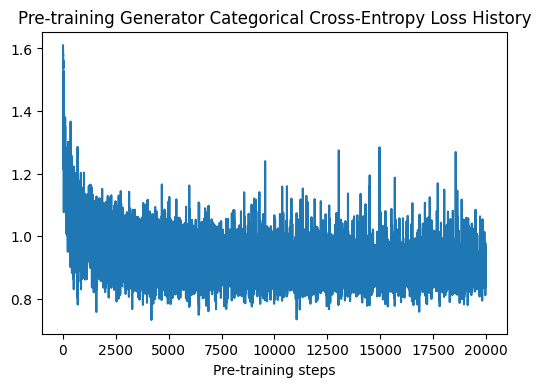

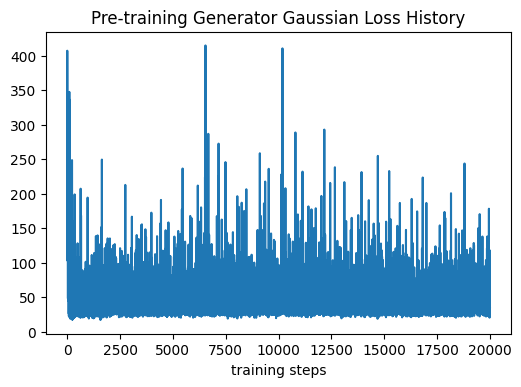

In [24]:
x = range(len(pretrain_gen_ce_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_ce_loss_history)
plt.title('Pre-training Generator Categorical Cross-Entropy Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_gaussian_loss_history)
plt.title('Pre-training Generator Gaussian Loss History')
plt.xlabel('training steps')

### predict using pretrained G on self-regression

In [41]:
feature_sample, feature_label = list(pretrain_G_dataset.skip(11).take(1).as_numpy_iterator())[0]
feature_sample

(array([[[1.],
         [2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [2.],
         [3.],
         [4.],
         [3.],
         [2.]]]),
 array([[[ 0.],
         [ 7.],
         [ 8.],
         [13.],
         [ 5.],
         [ 8.],
         [21.],
         [12.],
         [ 2.],
         [10.],
         [ 8.]]]))

In [43]:
self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
print(self_target_token.squeeze())

[2. 2. 2. 3. 3. 2. 3. 4. 3. 2.]


In [49]:
self_regression_et[0]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [50]:
curr_state_et = self_regression_et[[0]]
curr_state_ts = self_regression_ts[[0]]

print(curr_state_et)
print(curr_state_ts)

[[[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]


In [51]:
pred_token_prob, gaussian_log, mask, alpha, mu, sigma = pretrained_generator.predict((curr_state_et, curr_state_ts))
pred_token_prob.shape
print(pred_token_prob.argmax(axis=1))

[2]


### Save Pretrained G

In [52]:
if not os.path.exists('./gan_model_weights/pretrain_20000_gen_clip'):
    os.makedirs('./gan_model_weights/pretrain_20000_gen_clip')
    
G_save_path = './gan_model_weights/pretrain_20000_gen_clip/model.tf'
pretrained_generator.save_weights(G_save_path)

In [ ]:
reload_pretrained_gen = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

reload_pretrained_gen.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_gen.load_weights(G_save_path)

In [ ]:
reload_pretrained_gen.summary()

## Pretrain D 

In [5]:
pretrain_D_et = np.concatenate([valid_event_type_seqs, invalid_event_type_seqs], axis=0)
pretrain_D_ts = np.concatenate([valid_timestamp_seqs, invalid_timestamp_seqs], axis=0)

pretrain_D_labels = np.concatenate([np.ones((valid_event_type_seqs.shape[0], 1)), 
                                  np.zeros((invalid_event_type_seqs.shape[0], 1))
                                 ], axis=0)
pretrain_D_features = (pretrain_D_et, pretrain_D_ts)
N_pretrain_D = pretrain_D_ts.shape[0]

In [6]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

EPOCHS = 2
_TOTAL_STEPS = int(EPOCHS * N_pretrain_D / BATCH_SIZE)
# _TOTAL_STEPS = 1000

pretrain_disc_token_loss_history = []
pretrain_disc_gaussian_loss_history = []


pretrain_D_dataset = create_dataset(pretrain_D_features,
                                  pretrain_D_labels,
                                  batch_size=BATCH_SIZE,
                                  epochs=EPOCHS,
                                  buffer_size=N_pretrain_D)

pretrained_discriminator = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [7]:
_TOTAL_STEPS

1564

In [10]:
step = 0

for features_batch, real_labels in tqdm(pretrain_D_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    disc_token_loss, disc_gaussian_loss = pretrain_discriminator(features_batch, real_labels, pretrained_discriminator, verbose=False, 
                                                                 weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, optimizer=OPTIMIZER)
    pretrain_disc_token_loss_history.append(disc_token_loss.numpy())
    pretrain_disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1


1it [00:00,  2.17it/s]

Training Step: 2


2it [00:00,  2.58it/s]

Training Step: 3


3it [00:00,  2.97it/s]

Training Step: 4


4it [00:01,  3.29it/s]

Training Step: 5


5it [00:01,  3.60it/s]

Training Step: 6


6it [00:01,  3.86it/s]

Training Step: 7


7it [00:01,  4.06it/s]

Training Step: 8


8it [00:01,  4.20it/s]

Training Step: 9


9it [00:02,  4.28it/s]

Training Step: 10


10it [00:02,  4.35it/s]

Training Step: 11


11it [00:02,  4.39it/s]

Training Step: 12


12it [00:02,  4.40it/s]

Training Step: 13


13it [00:03,  4.43it/s]

Training Step: 14


14it [00:03,  4.45it/s]

Training Step: 15


15it [00:03,  4.48it/s]

Training Step: 16


16it [00:03,  3.87it/s]

Training Step: 17


17it [00:04,  4.04it/s]

Training Step: 18


18it [00:04,  4.16it/s]

Training Step: 19


19it [00:04,  4.26it/s]

Training Step: 20


20it [00:04,  4.32it/s]

Training Step: 21


21it [00:05,  4.35it/s]

Training Step: 22


22it [00:05,  4.37it/s]

Training Step: 23


23it [00:05,  4.29it/s]

Training Step: 24


24it [00:05,  4.34it/s]

Training Step: 25


25it [00:05,  4.40it/s]

Training Step: 26


26it [00:06,  4.39it/s]

Training Step: 27


27it [00:06,  4.40it/s]

Training Step: 28


28it [00:06,  4.39it/s]

Training Step: 29


29it [00:06,  4.42it/s]

Training Step: 30


30it [00:07,  4.43it/s]

Training Step: 31


31it [00:07,  4.45it/s]

Training Step: 32


32it [00:07,  4.45it/s]

Training Step: 33


33it [00:07,  4.47it/s]

Training Step: 34


34it [00:07,  4.47it/s]

Training Step: 35


35it [00:08,  4.46it/s]

Training Step: 36


36it [00:08,  4.44it/s]

Training Step: 37


37it [00:08,  4.42it/s]

Training Step: 38


38it [00:08,  4.42it/s]

Training Step: 39


39it [00:09,  4.36it/s]

Training Step: 40


40it [00:09,  4.37it/s]

Training Step: 41


41it [00:09,  4.40it/s]

Training Step: 42


42it [00:09,  4.35it/s]

Training Step: 43


43it [00:10,  3.82it/s]

Training Step: 44


44it [00:10,  3.98it/s]

Training Step: 45


45it [00:10,  4.13it/s]

Training Step: 46


46it [00:10,  4.23it/s]

Training Step: 47


47it [00:11,  4.30it/s]

Training Step: 48


48it [00:11,  4.33it/s]

Training Step: 49


49it [00:11,  4.35it/s]

Training Step: 50


50it [00:11,  4.40it/s]

Training Step: 51


51it [00:11,  4.43it/s]

Training Step: 52


52it [00:12,  4.42it/s]

Training Step: 53


53it [00:12,  4.43it/s]

Training Step: 54


54it [00:12,  4.44it/s]

Training Step: 55


55it [00:12,  4.46it/s]

Training Step: 56


56it [00:13,  4.48it/s]

Training Step: 57


57it [00:13,  4.43it/s]

Training Step: 58


58it [00:13,  4.46it/s]

Training Step: 59


59it [00:13,  4.46it/s]

Training Step: 60


60it [00:13,  4.44it/s]

Training Step: 61


61it [00:14,  4.45it/s]

Training Step: 62


62it [00:14,  4.38it/s]

Training Step: 63


63it [00:14,  4.39it/s]

Training Step: 64


64it [00:14,  4.39it/s]

Training Step: 65


65it [00:15,  4.44it/s]

Training Step: 66


66it [00:15,  4.44it/s]

Training Step: 67


67it [00:15,  4.46it/s]

Training Step: 68


68it [00:15,  4.48it/s]

Training Step: 69


69it [00:15,  4.49it/s]

Training Step: 70


70it [00:16,  4.47it/s]

Training Step: 71


71it [00:16,  4.44it/s]

Training Step: 72


72it [00:16,  4.46it/s]

Training Step: 73


73it [00:16,  4.43it/s]

Training Step: 74


74it [00:17,  3.84it/s]

Training Step: 75


75it [00:17,  4.01it/s]

Training Step: 76


76it [00:17,  4.11it/s]

Training Step: 77


77it [00:17,  4.19it/s]

Training Step: 78


78it [00:18,  4.27it/s]

Training Step: 79


79it [00:18,  4.30it/s]

Training Step: 80


80it [00:18,  4.36it/s]

Training Step: 81


81it [00:18,  4.31it/s]

Training Step: 82


82it [00:19,  4.31it/s]

Training Step: 83


83it [00:19,  4.33it/s]

Training Step: 84


84it [00:19,  4.38it/s]

Training Step: 85


85it [00:19,  4.36it/s]

Training Step: 86


86it [00:19,  4.36it/s]

Training Step: 87


87it [00:20,  4.33it/s]

Training Step: 88


88it [00:20,  4.33it/s]

Training Step: 89


89it [00:20,  4.35it/s]

Training Step: 90


90it [00:20,  4.37it/s]

Training Step: 91


91it [00:21,  4.42it/s]

Training Step: 92


92it [00:21,  4.39it/s]

Training Step: 93


93it [00:21,  4.35it/s]

Training Step: 94


94it [00:21,  4.31it/s]

Training Step: 95


95it [00:22,  4.29it/s]

Training Step: 96


96it [00:22,  4.24it/s]

Training Step: 97


97it [00:22,  4.30it/s]

Training Step: 98


98it [00:22,  4.36it/s]

Training Step: 99


99it [00:22,  4.36it/s]

Training Step: 100


100it [00:23,  4.28it/s]

Training Step: 101


101it [00:23,  3.79it/s]

Training Step: 102


102it [00:23,  3.98it/s]

Training Step: 103


103it [00:23,  4.14it/s]

Training Step: 104


104it [00:24,  4.22it/s]

Training Step: 105


105it [00:24,  4.30it/s]

Training Step: 106


106it [00:24,  4.35it/s]

Training Step: 107


107it [00:24,  4.38it/s]

Training Step: 108


108it [00:25,  4.30it/s]

Training Step: 109


109it [00:25,  4.35it/s]

Training Step: 110


110it [00:25,  4.39it/s]

Training Step: 111


111it [00:25,  4.39it/s]

Training Step: 112


112it [00:25,  4.41it/s]

Training Step: 113


113it [00:26,  4.43it/s]

Training Step: 114


114it [00:26,  4.43it/s]

Training Step: 115


115it [00:26,  4.45it/s]

Training Step: 116


116it [00:26,  4.40it/s]

Training Step: 117


117it [00:27,  4.38it/s]

Training Step: 118


118it [00:27,  4.40it/s]

Training Step: 119


119it [00:27,  4.42it/s]

Training Step: 120


120it [00:27,  4.44it/s]

Training Step: 121


121it [00:28,  4.45it/s]

Training Step: 122


122it [00:28,  4.42it/s]

Training Step: 123


123it [00:28,  4.44it/s]

Training Step: 124


124it [00:28,  4.44it/s]

Training Step: 125


125it [00:28,  4.48it/s]

Training Step: 126


126it [00:29,  4.46it/s]

Training Step: 127


127it [00:29,  4.35it/s]

Training Step: 128


128it [00:29,  4.40it/s]

Training Step: 129


129it [00:29,  4.44it/s]

Training Step: 130


130it [00:30,  4.42it/s]

Training Step: 131


131it [00:30,  4.44it/s]

Training Step: 132


132it [00:30,  3.90it/s]

Training Step: 133


133it [00:30,  4.07it/s]

Training Step: 134


134it [00:31,  4.15it/s]

Training Step: 135


135it [00:31,  4.23it/s]

Training Step: 136


136it [00:31,  4.24it/s]

Training Step: 137


137it [00:31,  4.31it/s]

Training Step: 138


138it [00:31,  4.35it/s]

Training Step: 139


139it [00:32,  4.41it/s]

Training Step: 140


140it [00:32,  4.41it/s]

Training Step: 141


141it [00:32,  4.40it/s]

Training Step: 142


142it [00:32,  4.44it/s]

Training Step: 143


143it [00:33,  4.44it/s]

Training Step: 144


144it [00:33,  4.42it/s]

Training Step: 145


145it [00:33,  4.45it/s]

Training Step: 146


146it [00:33,  4.43it/s]

Training Step: 147


147it [00:34,  4.36it/s]

Training Step: 148


148it [00:34,  4.35it/s]

Training Step: 149


149it [00:34,  4.37it/s]

Training Step: 150


150it [00:34,  4.38it/s]

Training Step: 151


151it [00:34,  4.40it/s]

Training Step: 152


152it [00:35,  4.42it/s]

Training Step: 153


153it [00:35,  4.44it/s]

Training Step: 154


154it [00:35,  4.45it/s]

Training Step: 155


155it [00:35,  4.44it/s]

Training Step: 156


156it [00:36,  4.44it/s]

Training Step: 157


157it [00:36,  4.42it/s]

Training Step: 158


158it [00:36,  4.43it/s]

Training Step: 159


159it [00:36,  3.89it/s]

Training Step: 160


160it [00:37,  4.03it/s]

Training Step: 161


161it [00:37,  4.12it/s]

Training Step: 162


162it [00:37,  4.18it/s]

Training Step: 163


163it [00:37,  4.26it/s]

Training Step: 164


164it [00:37,  4.24it/s]

Training Step: 165


165it [00:38,  4.31it/s]

Training Step: 166


166it [00:38,  4.36it/s]

Training Step: 167


167it [00:38,  4.39it/s]

Training Step: 168


168it [00:38,  4.41it/s]

Training Step: 169


169it [00:39,  4.40it/s]

Training Step: 170


170it [00:39,  4.42it/s]

Training Step: 171


171it [00:39,  4.45it/s]

Training Step: 172


172it [00:39,  4.42it/s]

Training Step: 173


173it [00:40,  4.30it/s]

Training Step: 174


174it [00:40,  4.26it/s]

Training Step: 175


175it [00:40,  4.31it/s]

Training Step: 176


176it [00:40,  4.32it/s]

Training Step: 177


177it [00:40,  4.35it/s]

Training Step: 178


178it [00:41,  4.39it/s]

Training Step: 179


179it [00:41,  4.41it/s]

Training Step: 180


180it [00:41,  4.44it/s]

Training Step: 181


181it [00:41,  4.43it/s]

Training Step: 182


182it [00:42,  4.38it/s]

Training Step: 183


183it [00:42,  4.39it/s]

Training Step: 184


184it [00:42,  4.42it/s]

Training Step: 185


185it [00:42,  4.35it/s]

Training Step: 186


186it [00:42,  4.39it/s]

Training Step: 187


187it [00:43,  4.42it/s]

Training Step: 188


188it [00:43,  4.40it/s]

Training Step: 189


189it [00:43,  4.40it/s]

Training Step: 190


190it [00:43,  3.89it/s]

Training Step: 191


191it [00:44,  4.04it/s]

Training Step: 192


192it [00:44,  4.15it/s]

Training Step: 193


193it [00:44,  4.25it/s]

Training Step: 194


194it [00:44,  4.32it/s]

Training Step: 195


195it [00:45,  4.36it/s]

Training Step: 196


196it [00:45,  4.40it/s]

Training Step: 197


197it [00:45,  4.43it/s]

Training Step: 198


198it [00:45,  4.40it/s]

Training Step: 199


199it [00:45,  4.42it/s]

Training Step: 200


200it [00:46,  4.43it/s]

Training Step: 201


201it [00:46,  4.45it/s]

Training Step: 202


202it [00:46,  4.45it/s]

Training Step: 203


203it [00:46,  4.45it/s]

Training Step: 204


204it [00:47,  4.44it/s]

Training Step: 205


205it [00:47,  4.46it/s]

Training Step: 206


206it [00:47,  4.47it/s]

Training Step: 207


207it [00:47,  4.44it/s]

Training Step: 208


208it [00:48,  4.44it/s]

Training Step: 209


209it [00:48,  4.39it/s]

Training Step: 210


210it [00:48,  4.37it/s]

Training Step: 211


211it [00:48,  4.39it/s]

Training Step: 212


212it [00:48,  4.42it/s]

Training Step: 213


213it [00:49,  4.46it/s]

Training Step: 214


214it [00:49,  4.45it/s]

Training Step: 215


215it [00:49,  4.45it/s]

Training Step: 216


216it [00:49,  4.44it/s]

Training Step: 217


217it [00:50,  3.92it/s]

Training Step: 218


218it [00:50,  4.06it/s]

Training Step: 219


219it [00:50,  4.16it/s]

Training Step: 220


220it [00:50,  4.24it/s]

Training Step: 221


221it [00:51,  4.31it/s]

Training Step: 222


222it [00:51,  4.27it/s]

Training Step: 223


223it [00:51,  4.32it/s]

Training Step: 224


224it [00:51,  4.25it/s]

Training Step: 225


225it [00:51,  4.33it/s]

Training Step: 226


226it [00:52,  4.37it/s]

Training Step: 227


227it [00:52,  4.36it/s]

Training Step: 228


228it [00:52,  4.40it/s]

Training Step: 229


229it [00:52,  4.44it/s]

Training Step: 230


230it [00:53,  4.42it/s]

Training Step: 231


231it [00:53,  4.34it/s]

Training Step: 232


232it [00:53,  4.38it/s]

Training Step: 233


233it [00:53,  4.37it/s]

Training Step: 234


234it [00:54,  4.35it/s]

Training Step: 235


235it [00:54,  4.39it/s]

Training Step: 236


236it [00:54,  4.43it/s]

Training Step: 237


237it [00:54,  4.46it/s]

Training Step: 238


238it [00:54,  4.43it/s]

Training Step: 239


239it [00:55,  4.45it/s]

Training Step: 240


240it [00:55,  4.47it/s]

Training Step: 241


241it [00:55,  4.48it/s]

Training Step: 242


242it [00:55,  4.47it/s]

Training Step: 243


243it [00:56,  4.46it/s]

Training Step: 244


244it [00:56,  4.46it/s]

Training Step: 245


245it [00:56,  4.43it/s]

Training Step: 246


246it [00:56,  4.41it/s]

Training Step: 247


247it [00:56,  4.35it/s]

Training Step: 248


248it [00:57,  3.78it/s]

Training Step: 249


249it [00:57,  3.91it/s]

Training Step: 250


250it [00:57,  4.06it/s]

Training Step: 251


251it [00:57,  4.18it/s]

Training Step: 252


252it [00:58,  4.25it/s]

Training Step: 253


253it [00:58,  4.31it/s]

Training Step: 254


254it [00:58,  4.35it/s]

Training Step: 255


255it [00:58,  4.36it/s]

Training Step: 256


256it [00:59,  4.41it/s]

Training Step: 257


257it [00:59,  4.40it/s]

Training Step: 258


258it [00:59,  4.40it/s]

Training Step: 259


259it [00:59,  4.37it/s]

Training Step: 260


260it [01:00,  4.33it/s]

Training Step: 261


261it [01:00,  4.34it/s]

Training Step: 262


262it [01:00,  4.34it/s]

Training Step: 263


263it [01:00,  4.35it/s]

Training Step: 264


264it [01:00,  4.40it/s]

Training Step: 265


265it [01:01,  4.45it/s]

Training Step: 266


266it [01:01,  4.40it/s]

Training Step: 267


267it [01:01,  4.41it/s]

Training Step: 268


268it [01:01,  4.44it/s]

Training Step: 269


269it [01:02,  4.45it/s]

Training Step: 270


270it [01:02,  4.42it/s]

Training Step: 271


271it [01:02,  4.45it/s]

Training Step: 272


272it [01:02,  4.42it/s]

Training Step: 273


273it [01:02,  4.46it/s]

Training Step: 274


274it [01:03,  4.48it/s]

Training Step: 275


275it [01:03,  3.86it/s]

Training Step: 276


276it [01:03,  4.03it/s]

Training Step: 277


277it [01:03,  4.13it/s]

Training Step: 278


278it [01:04,  4.20it/s]

Training Step: 279


279it [01:04,  4.27it/s]

Training Step: 280


280it [01:04,  4.34it/s]

Training Step: 281


281it [01:04,  4.34it/s]

Training Step: 282


282it [01:05,  4.39it/s]

Training Step: 283


283it [01:05,  4.41it/s]

Training Step: 284


284it [01:05,  4.42it/s]

Training Step: 285


285it [01:05,  4.35it/s]

Training Step: 286


286it [01:06,  4.34it/s]

Training Step: 287


287it [01:06,  4.37it/s]

Training Step: 288


288it [01:06,  4.41it/s]

Training Step: 289


289it [01:06,  4.42it/s]

Training Step: 290


290it [01:06,  4.39it/s]

Training Step: 291


291it [01:07,  4.40it/s]

Training Step: 292


292it [01:07,  4.43it/s]

Training Step: 293


293it [01:07,  4.40it/s]

Training Step: 294


294it [01:07,  4.37it/s]

Training Step: 295


295it [01:08,  4.36it/s]

Training Step: 296


296it [01:08,  4.40it/s]

Training Step: 297


297it [01:08,  4.43it/s]

Training Step: 298


298it [01:08,  4.43it/s]

Training Step: 299


299it [01:08,  4.44it/s]

Training Step: 300


300it [01:09,  4.44it/s]

Training Step: 301


301it [01:09,  4.45it/s]

Training Step: 302


302it [01:09,  4.44it/s]

Training Step: 303


303it [01:09,  4.45it/s]

Training Step: 304


304it [01:10,  4.39it/s]

Training Step: 305


305it [01:10,  4.43it/s]

Training Step: 306


306it [01:10,  3.88it/s]

Training Step: 307


307it [01:10,  3.99it/s]

Training Step: 308


308it [01:11,  4.10it/s]

Training Step: 309


309it [01:11,  4.17it/s]

Training Step: 310


310it [01:11,  4.23it/s]

Training Step: 311


311it [01:11,  4.30it/s]

Training Step: 312


312it [01:12,  4.32it/s]

Training Step: 313


313it [01:12,  4.31it/s]

Training Step: 314


314it [01:12,  4.37it/s]

Training Step: 315


315it [01:12,  4.34it/s]

Training Step: 316


316it [01:12,  4.40it/s]

Training Step: 317


317it [01:13,  4.42it/s]

Training Step: 318


318it [01:13,  4.33it/s]

Training Step: 319


319it [01:13,  4.36it/s]

Training Step: 320


320it [01:13,  4.42it/s]

Training Step: 321


321it [01:14,  4.45it/s]

Training Step: 322


322it [01:14,  4.32it/s]

Training Step: 323


323it [01:14,  4.37it/s]

Training Step: 324


324it [01:14,  4.39it/s]

Training Step: 325


325it [01:14,  4.44it/s]

Training Step: 326


326it [01:15,  4.37it/s]

Training Step: 327


327it [01:15,  4.35it/s]

Training Step: 328


328it [01:15,  4.39it/s]

Training Step: 329


329it [01:15,  4.40it/s]

Training Step: 330


330it [01:16,  4.38it/s]

Training Step: 331


331it [01:16,  4.29it/s]

Training Step: 332


332it [01:16,  4.29it/s]

Training Step: 333


333it [01:16,  3.81it/s]

Training Step: 334


334it [01:17,  3.99it/s]

Training Step: 335


335it [01:17,  4.14it/s]

Training Step: 336


336it [01:17,  4.21it/s]

Training Step: 337


337it [01:17,  4.27it/s]

Training Step: 338


338it [01:18,  4.31it/s]

Training Step: 339


339it [01:18,  4.32it/s]

Training Step: 340


340it [01:18,  4.36it/s]

Training Step: 341


341it [01:18,  4.37it/s]

Training Step: 342


342it [01:18,  4.40it/s]

Training Step: 343


343it [01:19,  4.35it/s]

Training Step: 344


344it [01:19,  4.37it/s]

Training Step: 345


345it [01:19,  4.32it/s]

Training Step: 346


346it [01:19,  4.20it/s]

Training Step: 347


347it [01:20,  4.18it/s]

Training Step: 348


348it [01:20,  4.17it/s]

Training Step: 349


349it [01:20,  4.16it/s]

Training Step: 350


350it [01:20,  4.18it/s]

Training Step: 351


351it [01:21,  4.21it/s]

Training Step: 352


352it [01:21,  4.15it/s]

Training Step: 353


353it [01:21,  4.20it/s]

Training Step: 354


354it [01:21,  4.19it/s]

Training Step: 355


355it [01:22,  4.16it/s]

Training Step: 356


356it [01:22,  4.16it/s]

Training Step: 357


357it [01:22,  4.22it/s]

Training Step: 358


358it [01:22,  4.25it/s]

Training Step: 359


359it [01:23,  4.19it/s]

Training Step: 360


360it [01:23,  4.21it/s]

Training Step: 361


361it [01:23,  4.19it/s]

Training Step: 362


362it [01:23,  4.19it/s]

Training Step: 363


363it [01:23,  4.19it/s]

Training Step: 364


364it [01:24,  3.72it/s]

Training Step: 365


365it [01:24,  3.88it/s]

Training Step: 366


366it [01:24,  3.96it/s]

Training Step: 367


367it [01:25,  4.03it/s]

Training Step: 368


368it [01:25,  4.10it/s]

Training Step: 369


369it [01:25,  4.22it/s]

Training Step: 370


370it [01:25,  4.28it/s]

Training Step: 371


371it [01:25,  4.34it/s]

Training Step: 372


372it [01:26,  4.40it/s]

Training Step: 373


373it [01:26,  4.42it/s]

Training Step: 374


374it [01:26,  4.44it/s]

Training Step: 375


375it [01:26,  4.45it/s]

Training Step: 376


376it [01:27,  4.45it/s]

Training Step: 377


377it [01:27,  4.42it/s]

Training Step: 378


378it [01:27,  4.43it/s]

Training Step: 379


379it [01:27,  4.37it/s]

Training Step: 380


380it [01:27,  4.35it/s]

Training Step: 381


381it [01:28,  4.39it/s]

Training Step: 382


382it [01:28,  4.34it/s]

Training Step: 383


383it [01:28,  4.39it/s]

Training Step: 384


384it [01:28,  4.40it/s]

Training Step: 385


385it [01:29,  4.44it/s]

Training Step: 386


386it [01:29,  4.44it/s]

Training Step: 387


387it [01:29,  4.46it/s]

Training Step: 388


388it [01:29,  4.46it/s]

Training Step: 389


389it [01:30,  4.46it/s]

Training Step: 390


390it [01:30,  4.45it/s]

Training Step: 391


391it [01:30,  3.92it/s]

Training Step: 392


392it [01:30,  4.07it/s]

Training Step: 393


393it [01:31,  4.14it/s]

Training Step: 394


394it [01:31,  4.21it/s]

Training Step: 395


395it [01:31,  4.31it/s]

Training Step: 396


396it [01:31,  4.37it/s]

Training Step: 397


397it [01:31,  4.41it/s]

Training Step: 398


398it [01:32,  4.42it/s]

Training Step: 399


399it [01:32,  4.33it/s]

Training Step: 400


400it [01:32,  4.37it/s]

Training Step: 401


401it [01:32,  4.41it/s]

Training Step: 402


402it [01:33,  4.45it/s]

Training Step: 403


403it [01:33,  4.43it/s]

Training Step: 404


404it [01:33,  4.44it/s]

Training Step: 405


405it [01:33,  4.43it/s]

Training Step: 406


406it [01:33,  4.38it/s]

Training Step: 407


407it [01:34,  4.41it/s]

Training Step: 408


408it [01:34,  4.37it/s]

Training Step: 409


409it [01:34,  4.41it/s]

Training Step: 410


410it [01:34,  4.47it/s]

Training Step: 411


411it [01:35,  4.48it/s]

Training Step: 412


412it [01:35,  4.50it/s]

Training Step: 413


413it [01:35,  4.47it/s]

Training Step: 414


414it [01:35,  4.43it/s]

Training Step: 415


415it [01:35,  4.46it/s]

Training Step: 416


416it [01:36,  4.48it/s]

Training Step: 417


417it [01:36,  4.44it/s]

Training Step: 418


418it [01:36,  4.45it/s]

Training Step: 419


419it [01:36,  4.46it/s]

Training Step: 420


420it [01:37,  4.45it/s]

Training Step: 421


421it [01:37,  4.44it/s]

Training Step: 422


422it [01:37,  3.92it/s]

Training Step: 423


423it [01:37,  4.07it/s]

Training Step: 424


424it [01:38,  4.16it/s]

Training Step: 425


425it [01:38,  4.25it/s]

Training Step: 426


426it [01:38,  4.31it/s]

Training Step: 427


427it [01:38,  4.30it/s]

Training Step: 428


428it [01:38,  4.38it/s]

Training Step: 429


429it [01:39,  4.43it/s]

Training Step: 430


430it [01:39,  4.42it/s]

Training Step: 431


431it [01:39,  4.45it/s]

Training Step: 432


432it [01:39,  4.45it/s]

Training Step: 433


433it [01:40,  4.44it/s]

Training Step: 434


434it [01:40,  4.43it/s]

Training Step: 435


435it [01:40,  4.41it/s]

Training Step: 436


436it [01:40,  4.43it/s]

Training Step: 437


437it [01:41,  4.46it/s]

Training Step: 438


438it [01:41,  4.43it/s]

Training Step: 439


439it [01:41,  4.47it/s]

Training Step: 440


440it [01:41,  4.46it/s]

Training Step: 441


441it [01:41,  4.45it/s]

Training Step: 442


442it [01:42,  4.46it/s]

Training Step: 443


443it [01:42,  4.42it/s]

Training Step: 444


444it [01:42,  4.38it/s]

Training Step: 445


445it [01:42,  4.41it/s]

Training Step: 446


446it [01:43,  4.42it/s]

Training Step: 447


447it [01:43,  4.36it/s]

Training Step: 448


448it [01:43,  4.36it/s]

Training Step: 449


449it [01:43,  3.86it/s]

Training Step: 450


450it [01:44,  3.93it/s]

Training Step: 451


451it [01:44,  4.06it/s]

Training Step: 452


452it [01:44,  4.18it/s]

Training Step: 453


453it [01:44,  4.26it/s]

Training Step: 454


454it [01:44,  4.32it/s]

Training Step: 455


455it [01:45,  4.34it/s]

Training Step: 456


456it [01:45,  4.39it/s]

Training Step: 457


457it [01:45,  4.29it/s]

Training Step: 458


458it [01:45,  4.34it/s]

Training Step: 459


459it [01:46,  4.37it/s]

Training Step: 460


460it [01:46,  4.38it/s]

Training Step: 461


461it [01:46,  4.42it/s]

Training Step: 462


462it [01:46,  4.45it/s]

Training Step: 463


463it [01:47,  4.48it/s]

Training Step: 464


464it [01:47,  4.45it/s]

Training Step: 465


465it [01:47,  4.45it/s]

Training Step: 466


466it [01:47,  4.48it/s]

Training Step: 467


467it [01:47,  4.41it/s]

Training Step: 468


468it [01:48,  4.42it/s]

Training Step: 469


469it [01:48,  4.35it/s]

Training Step: 470


470it [01:48,  4.39it/s]

Training Step: 471


471it [01:48,  4.41it/s]

Training Step: 472


472it [01:49,  4.33it/s]

Training Step: 473


473it [01:49,  4.39it/s]

Training Step: 474


474it [01:49,  4.38it/s]

Training Step: 475


475it [01:49,  4.43it/s]

Training Step: 476


476it [01:49,  4.44it/s]

Training Step: 477


477it [01:50,  4.46it/s]

Training Step: 478


478it [01:50,  4.44it/s]

Training Step: 479


479it [01:50,  4.42it/s]

Training Step: 480


480it [01:50,  3.88it/s]

Training Step: 481


481it [01:51,  4.01it/s]

Training Step: 482


482it [01:51,  4.14it/s]

Training Step: 483


483it [01:51,  4.24it/s]

Training Step: 484


484it [01:51,  4.33it/s]

Training Step: 485


485it [01:52,  4.37it/s]

Training Step: 486


486it [01:52,  4.41it/s]

Training Step: 487


487it [01:52,  4.44it/s]

Training Step: 488


488it [01:52,  4.38it/s]

Training Step: 489


489it [01:53,  4.35it/s]

Training Step: 490


490it [01:53,  4.39it/s]

Training Step: 491


491it [01:53,  4.42it/s]

Training Step: 492


492it [01:53,  4.42it/s]

Training Step: 493


493it [01:53,  4.42it/s]

Training Step: 494


494it [01:54,  4.43it/s]

Training Step: 495


495it [01:54,  4.45it/s]

Training Step: 496


496it [01:54,  4.48it/s]

Training Step: 497


497it [01:54,  4.43it/s]

Training Step: 498


498it [01:55,  4.43it/s]

Training Step: 499


499it [01:55,  4.41it/s]

Training Step: 500


500it [01:55,  4.35it/s]

Training Step: 501


501it [01:55,  4.33it/s]

Training Step: 502


502it [01:55,  4.29it/s]

Training Step: 503


503it [01:56,  4.32it/s]

Training Step: 504


504it [01:56,  4.38it/s]

Training Step: 505


505it [01:56,  4.39it/s]

Training Step: 506


506it [01:56,  4.40it/s]

Training Step: 507


507it [01:57,  3.86it/s]

Training Step: 508


508it [01:57,  4.02it/s]

Training Step: 509


509it [01:57,  4.16it/s]

Training Step: 510


510it [01:57,  4.26it/s]

Training Step: 511


511it [01:58,  4.31it/s]

Training Step: 512


512it [01:58,  4.26it/s]

Training Step: 513


513it [01:58,  4.30it/s]

Training Step: 514


514it [01:58,  4.34it/s]

Training Step: 515


515it [01:59,  4.38it/s]

Training Step: 516


516it [01:59,  4.41it/s]

Training Step: 517


517it [01:59,  4.41it/s]

Training Step: 518


518it [01:59,  4.43it/s]

Training Step: 519


519it [01:59,  4.47it/s]

Training Step: 520


520it [02:00,  4.45it/s]

Training Step: 521


521it [02:00,  4.46it/s]

Training Step: 522


522it [02:00,  4.41it/s]

Training Step: 523


523it [02:00,  4.44it/s]

Training Step: 524


524it [02:01,  4.47it/s]

Training Step: 525


525it [02:01,  4.43it/s]

Training Step: 526


526it [02:01,  4.44it/s]

Training Step: 527


527it [02:01,  4.47it/s]

Training Step: 528


528it [02:01,  4.42it/s]

Training Step: 529


529it [02:02,  4.41it/s]

Training Step: 530


530it [02:02,  4.38it/s]

Training Step: 531


531it [02:02,  4.39it/s]

Training Step: 532


532it [02:02,  4.37it/s]

Training Step: 533


533it [02:03,  4.41it/s]

Training Step: 534


534it [02:03,  4.33it/s]

Training Step: 535


535it [02:03,  4.37it/s]

Training Step: 536


536it [02:03,  4.38it/s]

Training Step: 537


537it [02:03,  4.40it/s]

Training Step: 538


538it [02:04,  3.83it/s]

Training Step: 539


539it [02:04,  4.01it/s]

Training Step: 540


540it [02:04,  4.14it/s]

Training Step: 541


541it [02:04,  4.23it/s]

Training Step: 542


542it [02:05,  4.26it/s]

Training Step: 543


543it [02:05,  4.33it/s]

Training Step: 544


544it [02:05,  4.37it/s]

Training Step: 545


545it [02:05,  4.41it/s]

Training Step: 546


546it [02:06,  4.43it/s]

Training Step: 547


547it [02:06,  4.45it/s]

Training Step: 548


548it [02:06,  4.46it/s]

Training Step: 549


549it [02:06,  4.45it/s]

Training Step: 550


550it [02:07,  4.46it/s]

Training Step: 551


551it [02:07,  4.47it/s]

Training Step: 552


552it [02:07,  4.46it/s]

Training Step: 553


553it [02:07,  4.47it/s]

Training Step: 554


554it [02:07,  4.47it/s]

Training Step: 555


555it [02:08,  4.49it/s]

Training Step: 556


556it [02:08,  4.47it/s]

Training Step: 557


557it [02:08,  4.45it/s]

Training Step: 558


558it [02:08,  4.48it/s]

Training Step: 559


559it [02:09,  4.36it/s]

Training Step: 560


560it [02:09,  4.39it/s]

Training Step: 561


561it [02:09,  4.35it/s]

Training Step: 562


562it [02:09,  4.39it/s]

Training Step: 563


563it [02:09,  4.43it/s]

Training Step: 564


564it [02:10,  4.40it/s]

Training Step: 565


565it [02:10,  3.87it/s]

Training Step: 566


566it [02:10,  4.06it/s]

Training Step: 567


567it [02:10,  4.14it/s]

Training Step: 568


568it [02:11,  4.24it/s]

Training Step: 569


569it [02:11,  4.31it/s]

Training Step: 570


570it [02:11,  4.38it/s]

Training Step: 571


571it [02:11,  4.42it/s]

Training Step: 572


572it [02:12,  4.38it/s]

Training Step: 573


573it [02:12,  4.40it/s]

Training Step: 574


574it [02:12,  4.42it/s]

Training Step: 575


575it [02:12,  4.40it/s]

Training Step: 576


576it [02:12,  4.43it/s]

Training Step: 577


577it [02:13,  4.43it/s]

Training Step: 578


578it [02:13,  4.37it/s]

Training Step: 579


579it [02:13,  4.38it/s]

Training Step: 580


580it [02:13,  4.39it/s]

Training Step: 581


581it [02:14,  4.35it/s]

Training Step: 582


582it [02:14,  4.37it/s]

Training Step: 583


583it [02:14,  4.36it/s]

Training Step: 584


584it [02:14,  4.37it/s]

Training Step: 585


585it [02:15,  4.41it/s]

Training Step: 586


586it [02:15,  4.38it/s]

Training Step: 587


587it [02:15,  4.39it/s]

Training Step: 588


588it [02:15,  4.43it/s]

Training Step: 589


589it [02:15,  4.45it/s]

Training Step: 590


590it [02:16,  4.46it/s]

Training Step: 591


591it [02:16,  4.47it/s]

Training Step: 592


592it [02:16,  4.44it/s]

Training Step: 593


593it [02:16,  4.43it/s]

Training Step: 594


594it [02:17,  4.45it/s]

Training Step: 595


595it [02:17,  4.47it/s]

Training Step: 596


596it [02:17,  3.87it/s]

Training Step: 597


597it [02:17,  4.03it/s]

Training Step: 598


598it [02:18,  4.13it/s]

Training Step: 599


599it [02:18,  4.18it/s]

Training Step: 600


600it [02:18,  4.25it/s]

Training Step: 601


601it [02:18,  4.33it/s]

Training Step: 602


602it [02:18,  4.39it/s]

Training Step: 603


603it [02:19,  4.40it/s]

Training Step: 604


604it [02:19,  4.43it/s]

Training Step: 605


605it [02:19,  4.37it/s]

Training Step: 606


606it [02:19,  4.28it/s]

Training Step: 607


607it [02:20,  4.24it/s]

Training Step: 608


608it [02:20,  4.31it/s]

Training Step: 609


609it [02:20,  4.37it/s]

Training Step: 610


610it [02:20,  4.37it/s]

Training Step: 611


611it [02:21,  4.33it/s]

Training Step: 612


612it [02:21,  4.35it/s]

Training Step: 613


613it [02:21,  4.38it/s]

Training Step: 614


614it [02:21,  4.40it/s]

Training Step: 615


615it [02:21,  4.42it/s]

Training Step: 616


616it [02:22,  4.44it/s]

Training Step: 617


617it [02:22,  4.43it/s]

Training Step: 618


618it [02:22,  4.46it/s]

Training Step: 619


619it [02:22,  4.40it/s]

Training Step: 620


620it [02:23,  4.35it/s]

Training Step: 621


621it [02:23,  4.39it/s]

Training Step: 622


622it [02:23,  4.41it/s]

Training Step: 623


623it [02:23,  3.85it/s]

Training Step: 624


624it [02:24,  3.96it/s]

Training Step: 625


625it [02:24,  4.04it/s]

Training Step: 626


626it [02:24,  4.15it/s]

Training Step: 627


627it [02:24,  4.25it/s]

Training Step: 628


628it [02:25,  4.31it/s]

Training Step: 629


629it [02:25,  4.30it/s]

Training Step: 630


630it [02:25,  4.32it/s]

Training Step: 631


631it [02:25,  4.37it/s]

Training Step: 632


632it [02:25,  4.36it/s]

Training Step: 633


633it [02:26,  4.37it/s]

Training Step: 634


634it [02:26,  4.38it/s]

Training Step: 635


635it [02:26,  4.38it/s]

Training Step: 636


636it [02:26,  4.37it/s]

Training Step: 637


637it [02:27,  4.41it/s]

Training Step: 638


638it [02:27,  4.41it/s]

Training Step: 639


639it [02:27,  4.44it/s]

Training Step: 640


640it [02:27,  4.42it/s]

Training Step: 641


641it [02:27,  4.44it/s]

Training Step: 642


642it [02:28,  4.45it/s]

Training Step: 643


643it [02:28,  4.46it/s]

Training Step: 644


644it [02:28,  4.46it/s]

Training Step: 645


645it [02:28,  4.46it/s]

Training Step: 646


646it [02:29,  4.40it/s]

Training Step: 647


647it [02:29,  4.41it/s]

Training Step: 648


648it [02:29,  4.41it/s]

Training Step: 649


649it [02:29,  4.41it/s]

Training Step: 650


650it [02:30,  4.31it/s]

Training Step: 651


651it [02:30,  4.32it/s]

Training Step: 652


652it [02:30,  4.35it/s]

Training Step: 653


653it [02:30,  4.40it/s]

Training Step: 654


654it [02:31,  3.89it/s]

Training Step: 655


655it [02:31,  3.98it/s]

Training Step: 656


656it [02:31,  4.07it/s]

Training Step: 657


657it [02:31,  4.17it/s]

Training Step: 658


658it [02:31,  4.26it/s]

Training Step: 659


659it [02:32,  4.31it/s]

Training Step: 660


660it [02:32,  4.34it/s]

Training Step: 661


661it [02:32,  4.38it/s]

Training Step: 662


662it [02:32,  4.42it/s]

Training Step: 663


663it [02:33,  4.43it/s]

Training Step: 664


664it [02:33,  4.39it/s]

Training Step: 665


665it [02:33,  4.40it/s]

Training Step: 666


666it [02:33,  4.42it/s]

Training Step: 667


667it [02:33,  4.41it/s]

Training Step: 668


668it [02:34,  4.40it/s]

Training Step: 669


669it [02:34,  4.41it/s]

Training Step: 670


670it [02:34,  4.36it/s]

Training Step: 671


671it [02:34,  4.41it/s]

Training Step: 672


672it [02:35,  4.40it/s]

Training Step: 673


673it [02:35,  4.37it/s]

Training Step: 674


674it [02:35,  4.40it/s]

Training Step: 675


675it [02:35,  4.42it/s]

Training Step: 676


676it [02:36,  4.43it/s]

Training Step: 677


677it [02:36,  4.44it/s]

Training Step: 678


678it [02:36,  4.38it/s]

Training Step: 679


679it [02:36,  4.36it/s]

Training Step: 680


680it [02:36,  4.38it/s]

Training Step: 681


681it [02:37,  3.81it/s]

Training Step: 682


682it [02:37,  3.99it/s]

Training Step: 683


683it [02:37,  4.12it/s]

Training Step: 684


684it [02:37,  4.20it/s]

Training Step: 685


685it [02:38,  4.28it/s]

Training Step: 686


686it [02:38,  4.34it/s]

Training Step: 687


687it [02:38,  4.38it/s]

Training Step: 688


688it [02:38,  4.38it/s]

Training Step: 689


689it [02:39,  4.34it/s]

Training Step: 690


690it [02:39,  4.33it/s]

Training Step: 691


691it [02:39,  4.36it/s]

Training Step: 692


692it [02:39,  4.40it/s]

Training Step: 693


693it [02:39,  4.42it/s]

Training Step: 694


694it [02:40,  4.41it/s]

Training Step: 695


695it [02:40,  4.42it/s]

Training Step: 696


696it [02:40,  4.39it/s]

Training Step: 697


697it [02:40,  4.43it/s]

Training Step: 698


698it [02:41,  4.45it/s]

Training Step: 699


699it [02:41,  4.41it/s]

Training Step: 700


700it [02:41,  4.37it/s]

Training Step: 701


701it [02:41,  4.41it/s]

Training Step: 702


702it [02:42,  4.42it/s]

Training Step: 703


703it [02:42,  4.39it/s]

Training Step: 704


704it [02:42,  4.41it/s]

Training Step: 705


705it [02:42,  4.40it/s]

Training Step: 706


706it [02:42,  4.41it/s]

Training Step: 707


707it [02:43,  4.44it/s]

Training Step: 708


708it [02:43,  4.39it/s]

Training Step: 709


709it [02:43,  4.38it/s]

Training Step: 710


710it [02:43,  4.41it/s]

Training Step: 711


711it [02:44,  4.38it/s]

Training Step: 712


712it [02:44,  3.86it/s]

Training Step: 713


713it [02:44,  4.02it/s]

Training Step: 714


714it [02:44,  4.15it/s]

Training Step: 715


715it [02:45,  4.26it/s]

Training Step: 716


716it [02:45,  4.32it/s]

Training Step: 717


717it [02:45,  4.34it/s]

Training Step: 718


718it [02:45,  4.37it/s]

Training Step: 719


719it [02:45,  4.39it/s]

Training Step: 720


720it [02:46,  4.32it/s]

Training Step: 721


721it [02:46,  4.28it/s]

Training Step: 722


722it [02:46,  4.33it/s]

Training Step: 723


723it [02:46,  4.37it/s]

Training Step: 724


724it [02:47,  4.38it/s]

Training Step: 725


725it [02:47,  4.41it/s]

Training Step: 726


726it [02:47,  4.45it/s]

Training Step: 727


727it [02:47,  4.46it/s]

Training Step: 728


728it [02:48,  4.45it/s]

Training Step: 729


729it [02:48,  4.43it/s]

Training Step: 730


730it [02:48,  4.44it/s]

Training Step: 731


731it [02:48,  4.42it/s]

Training Step: 732


732it [02:48,  4.43it/s]

Training Step: 733


733it [02:49,  4.44it/s]

Training Step: 734


734it [02:49,  4.38it/s]

Training Step: 735


735it [02:49,  4.39it/s]

Training Step: 736


736it [02:49,  4.38it/s]

Training Step: 737


737it [02:50,  4.39it/s]

Training Step: 738


738it [02:50,  4.40it/s]

Training Step: 739


739it [02:50,  3.89it/s]

Training Step: 740


740it [02:50,  4.00it/s]

Training Step: 741


741it [02:51,  4.08it/s]

Training Step: 742


742it [02:51,  4.19it/s]

Training Step: 743


743it [02:51,  4.24it/s]

Training Step: 744


744it [02:51,  4.29it/s]

Training Step: 745


745it [02:52,  4.28it/s]

Training Step: 746


746it [02:52,  4.31it/s]

Training Step: 747


747it [02:52,  4.28it/s]

Training Step: 748


748it [02:52,  4.31it/s]

Training Step: 749


749it [02:52,  4.37it/s]

Training Step: 750


750it [02:53,  4.39it/s]

Training Step: 751


751it [02:53,  4.41it/s]

Training Step: 752


752it [02:53,  4.41it/s]

Training Step: 753


753it [02:53,  4.41it/s]

Training Step: 754


754it [02:54,  4.42it/s]

Training Step: 755


755it [02:54,  4.43it/s]

Training Step: 756


756it [02:54,  4.39it/s]

Training Step: 757


757it [02:54,  4.35it/s]

Training Step: 758


758it [02:54,  4.36it/s]

Training Step: 759


759it [02:55,  4.33it/s]

Training Step: 760


760it [02:55,  4.33it/s]

Training Step: 761


761it [02:55,  4.36it/s]

Training Step: 762


762it [02:55,  4.38it/s]

Training Step: 763


763it [02:56,  4.38it/s]

Training Step: 764


764it [02:56,  4.40it/s]

Training Step: 765


765it [02:56,  4.43it/s]

Training Step: 766


766it [02:56,  4.37it/s]

Training Step: 767


767it [02:57,  4.41it/s]

Training Step: 768


768it [02:57,  4.44it/s]

Training Step: 769


769it [02:57,  4.46it/s]

Training Step: 770


770it [02:57,  3.91it/s]

Training Step: 771


771it [02:58,  4.07it/s]

Training Step: 772


772it [02:58,  4.18it/s]

Training Step: 773


773it [02:58,  4.27it/s]

Training Step: 774


774it [02:58,  4.27it/s]

Training Step: 775


775it [02:58,  4.30it/s]

Training Step: 776


776it [02:59,  4.35it/s]

Training Step: 777


777it [02:59,  4.31it/s]

Training Step: 778


778it [02:59,  4.31it/s]

Training Step: 779


779it [02:59,  4.36it/s]

Training Step: 780


780it [03:00,  4.34it/s]

Training Step: 781


781it [03:00,  4.33it/s]

Training Step: 782


782it [03:00,  4.39it/s]

Training Step: 783


783it [03:00,  3.43it/s]

Training Step: 784


784it [03:01,  3.71it/s]

Training Step: 785


785it [03:01,  3.95it/s]

Training Step: 786


786it [03:01,  4.14it/s]

Training Step: 787


787it [03:01,  4.25it/s]

Training Step: 788


788it [03:02,  4.35it/s]

Training Step: 789


789it [03:02,  4.41it/s]

Training Step: 790


790it [03:02,  4.47it/s]

Training Step: 791


791it [03:02,  4.51it/s]

Training Step: 792


792it [03:02,  4.55it/s]

Training Step: 793


793it [03:03,  4.52it/s]

Training Step: 794


794it [03:03,  4.45it/s]

Training Step: 795


795it [03:03,  4.48it/s]

Training Step: 796


796it [03:03,  4.51it/s]

Training Step: 797


797it [03:04,  3.94it/s]

Training Step: 798


798it [03:04,  4.07it/s]

Training Step: 799


799it [03:04,  4.20it/s]

Training Step: 800


800it [03:04,  4.21it/s]

Training Step: 801


801it [03:05,  4.32it/s]

Training Step: 802


802it [03:05,  4.37it/s]

Training Step: 803


803it [03:05,  4.42it/s]

Training Step: 804


804it [03:05,  4.43it/s]

Training Step: 805


805it [03:05,  4.41it/s]

Training Step: 806


806it [03:06,  4.39it/s]

Training Step: 807


807it [03:06,  4.40it/s]

Training Step: 808


808it [03:06,  4.45it/s]

Training Step: 809


809it [03:06,  4.48it/s]

Training Step: 810


810it [03:07,  4.43it/s]

Training Step: 811


811it [03:07,  4.45it/s]

Training Step: 812


812it [03:07,  4.46it/s]

Training Step: 813


813it [03:07,  4.44it/s]

Training Step: 814


814it [03:07,  4.44it/s]

Training Step: 815


815it [03:08,  4.45it/s]

Training Step: 816


816it [03:08,  4.42it/s]

Training Step: 817


817it [03:08,  4.44it/s]

Training Step: 818


818it [03:08,  4.47it/s]

Training Step: 819


819it [03:09,  4.49it/s]

Training Step: 820


820it [03:09,  4.47it/s]

Training Step: 821


821it [03:09,  4.37it/s]

Training Step: 822


822it [03:09,  4.41it/s]

Training Step: 823


823it [03:09,  4.45it/s]

Training Step: 824


824it [03:10,  4.44it/s]

Training Step: 825


825it [03:10,  4.43it/s]

Training Step: 826


826it [03:10,  4.36it/s]

Training Step: 827


827it [03:10,  4.40it/s]

Training Step: 828


828it [03:11,  3.84it/s]

Training Step: 829


829it [03:11,  4.01it/s]

Training Step: 830


830it [03:11,  4.09it/s]

Training Step: 831


831it [03:11,  4.21it/s]

Training Step: 832


832it [03:12,  4.26it/s]

Training Step: 833


833it [03:12,  4.31it/s]

Training Step: 834


834it [03:12,  4.37it/s]

Training Step: 835


835it [03:12,  4.33it/s]

Training Step: 836


836it [03:13,  4.34it/s]

Training Step: 837


837it [03:13,  4.30it/s]

Training Step: 838


838it [03:13,  4.25it/s]

Training Step: 839


839it [03:13,  4.25it/s]

Training Step: 840


840it [03:14,  4.27it/s]

Training Step: 841


841it [03:14,  4.24it/s]

Training Step: 842


842it [03:14,  4.19it/s]

Training Step: 843


843it [03:14,  4.12it/s]

Training Step: 844


844it [03:14,  4.12it/s]

Training Step: 845


845it [03:15,  4.03it/s]

Training Step: 846


846it [03:15,  4.10it/s]

Training Step: 847


847it [03:15,  4.15it/s]

Training Step: 848


848it [03:15,  4.16it/s]

Training Step: 849


849it [03:16,  4.14it/s]

Training Step: 850


850it [03:16,  4.16it/s]

Training Step: 851


851it [03:16,  4.14it/s]

Training Step: 852


852it [03:16,  4.18it/s]

Training Step: 853


853it [03:17,  4.16it/s]

Training Step: 854


854it [03:17,  4.16it/s]

Training Step: 855


855it [03:17,  3.67it/s]

Training Step: 856


856it [03:17,  3.78it/s]

Training Step: 857


857it [03:18,  3.88it/s]

Training Step: 858


858it [03:18,  3.96it/s]

Training Step: 859


859it [03:18,  4.01it/s]

Training Step: 860


860it [03:18,  4.01it/s]

Training Step: 861


861it [03:19,  3.99it/s]

Training Step: 862


862it [03:19,  3.98it/s]

Training Step: 863


863it [03:19,  4.06it/s]

Training Step: 864


864it [03:19,  4.10it/s]

Training Step: 865


865it [03:20,  4.11it/s]

Training Step: 866


866it [03:20,  4.14it/s]

Training Step: 867


867it [03:20,  4.09it/s]

Training Step: 868


868it [03:20,  4.10it/s]

Training Step: 869


869it [03:21,  4.12it/s]

Training Step: 870


870it [03:21,  4.08it/s]

Training Step: 871


871it [03:21,  4.11it/s]

Training Step: 872


872it [03:21,  4.14it/s]

Training Step: 873


873it [03:22,  4.15it/s]

Training Step: 874


874it [03:22,  4.10it/s]

Training Step: 875


875it [03:22,  4.11it/s]

Training Step: 876


876it [03:22,  4.14it/s]

Training Step: 877


877it [03:23,  4.15it/s]

Training Step: 878


878it [03:23,  4.15it/s]

Training Step: 879


879it [03:23,  4.10it/s]

Training Step: 880


880it [03:23,  4.21it/s]

Training Step: 881


881it [03:24,  4.29it/s]

Training Step: 882


882it [03:24,  4.36it/s]

Training Step: 883


883it [03:24,  4.41it/s]

Training Step: 884


884it [03:24,  4.39it/s]

Training Step: 885


885it [03:24,  4.45it/s]

Training Step: 886


886it [03:25,  3.85it/s]

Training Step: 887


887it [03:25,  4.03it/s]

Training Step: 888


888it [03:25,  4.15it/s]

Training Step: 889


889it [03:25,  4.25it/s]

Training Step: 890


890it [03:26,  4.31it/s]

Training Step: 891


891it [03:26,  4.30it/s]

Training Step: 892


892it [03:26,  4.35it/s]

Training Step: 893


893it [03:26,  4.41it/s]

Training Step: 894


894it [03:27,  4.45it/s]

Training Step: 895


895it [03:27,  4.43it/s]

Training Step: 896


896it [03:27,  4.39it/s]

Training Step: 897


897it [03:27,  4.40it/s]

Training Step: 898


898it [03:27,  4.43it/s]

Training Step: 899


899it [03:28,  4.47it/s]

Training Step: 900


900it [03:28,  4.47it/s]

Training Step: 901


901it [03:28,  4.50it/s]

Training Step: 902


902it [03:28,  4.50it/s]

Training Step: 903


903it [03:29,  4.43it/s]

Training Step: 904


904it [03:29,  4.45it/s]

Training Step: 905


905it [03:29,  4.49it/s]

Training Step: 906


906it [03:29,  4.49it/s]

Training Step: 907


907it [03:29,  4.51it/s]

Training Step: 908


908it [03:30,  4.54it/s]

Training Step: 909


909it [03:30,  4.55it/s]

Training Step: 910


910it [03:30,  4.56it/s]

Training Step: 911


911it [03:30,  4.55it/s]

Training Step: 912


912it [03:31,  4.53it/s]

Training Step: 913


913it [03:31,  3.96it/s]

Training Step: 914


914it [03:31,  4.08it/s]

Training Step: 915


915it [03:31,  4.20it/s]

Training Step: 916


916it [03:32,  4.25it/s]

Training Step: 917


917it [03:32,  4.33it/s]

Training Step: 918


918it [03:32,  4.40it/s]

Training Step: 919


919it [03:32,  4.40it/s]

Training Step: 920


920it [03:32,  4.43it/s]

Training Step: 921


921it [03:33,  4.42it/s]

Training Step: 922


922it [03:33,  4.41it/s]

Training Step: 923


923it [03:33,  4.43it/s]

Training Step: 924


924it [03:33,  4.45it/s]

Training Step: 925


925it [03:34,  4.46it/s]

Training Step: 926


926it [03:34,  4.43it/s]

Training Step: 927


927it [03:34,  4.49it/s]

Training Step: 928


928it [03:34,  4.49it/s]

Training Step: 929


929it [03:34,  4.50it/s]

Training Step: 930


930it [03:35,  4.49it/s]

Training Step: 931


931it [03:35,  4.52it/s]

Training Step: 932


932it [03:35,  4.47it/s]

Training Step: 933


933it [03:35,  4.49it/s]

Training Step: 934


934it [03:36,  4.42it/s]

Training Step: 935


935it [03:36,  4.35it/s]

Training Step: 936


936it [03:36,  4.41it/s]

Training Step: 937


937it [03:36,  4.45it/s]

Training Step: 938


938it [03:36,  4.49it/s]

Training Step: 939


939it [03:37,  4.40it/s]

Training Step: 940


940it [03:37,  4.45it/s]

Training Step: 941


941it [03:37,  4.47it/s]

Training Step: 942


942it [03:37,  4.49it/s]

Training Step: 943


943it [03:38,  4.49it/s]

Training Step: 944


944it [03:38,  3.92it/s]

Training Step: 945


945it [03:38,  4.09it/s]

Training Step: 946


946it [03:38,  4.21it/s]

Training Step: 947


947it [03:39,  4.31it/s]

Training Step: 948


948it [03:39,  4.37it/s]

Training Step: 949


949it [03:39,  4.42it/s]

Training Step: 950


950it [03:39,  4.39it/s]

Training Step: 951


951it [03:40,  4.37it/s]

Training Step: 952


952it [03:40,  4.41it/s]

Training Step: 953


953it [03:40,  4.45it/s]

Training Step: 954


954it [03:40,  4.49it/s]

Training Step: 955


955it [03:40,  4.51it/s]

Training Step: 956


956it [03:41,  4.49it/s]

Training Step: 957


957it [03:41,  4.49it/s]

Training Step: 958


958it [03:41,  4.48it/s]

Training Step: 959


959it [03:41,  4.49it/s]

Training Step: 960


960it [03:42,  4.43it/s]

Training Step: 961


961it [03:42,  4.41it/s]

Training Step: 962


962it [03:42,  4.45it/s]

Training Step: 963


963it [03:42,  4.49it/s]

Training Step: 964


964it [03:42,  4.51it/s]

Training Step: 965


965it [03:43,  4.53it/s]

Training Step: 966


966it [03:43,  4.56it/s]

Training Step: 967


967it [03:43,  4.55it/s]

Training Step: 968


968it [03:43,  4.54it/s]

Training Step: 969


969it [03:44,  4.49it/s]

Training Step: 970


970it [03:44,  4.46it/s]

Training Step: 971


971it [03:44,  3.90it/s]

Training Step: 972


972it [03:44,  4.07it/s]

Training Step: 973


973it [03:45,  4.21it/s]

Training Step: 974


974it [03:45,  4.19it/s]

Training Step: 975


975it [03:45,  4.22it/s]

Training Step: 976


976it [03:45,  4.30it/s]

Training Step: 977


977it [03:45,  4.38it/s]

Training Step: 978


978it [03:46,  4.40it/s]

Training Step: 979


979it [03:46,  4.39it/s]

Training Step: 980


980it [03:46,  4.43it/s]

Training Step: 981


981it [03:46,  4.46it/s]

Training Step: 982


982it [03:47,  4.44it/s]

Training Step: 983


983it [03:47,  4.44it/s]

Training Step: 984


984it [03:47,  4.47it/s]

Training Step: 985


985it [03:47,  4.50it/s]

Training Step: 986


986it [03:47,  4.50it/s]

Training Step: 987


987it [03:48,  4.50it/s]

Training Step: 988


988it [03:48,  4.50it/s]

Training Step: 989


989it [03:48,  4.53it/s]

Training Step: 990


990it [03:48,  4.49it/s]

Training Step: 991


991it [03:49,  4.50it/s]

Training Step: 992


992it [03:49,  4.48it/s]

Training Step: 993


993it [03:49,  4.50it/s]

Training Step: 994


994it [03:49,  4.43it/s]

Training Step: 995


995it [03:49,  4.47it/s]

Training Step: 996


996it [03:50,  4.43it/s]

Training Step: 997


997it [03:50,  4.39it/s]

Training Step: 998


998it [03:50,  4.45it/s]

Training Step: 999


999it [03:50,  4.42it/s]

Training Step: 1000


1000it [03:51,  4.46it/s]

Training Step: 1001


1001it [03:51,  4.42it/s]

Training Step: 1002


1002it [03:51,  3.89it/s]

Training Step: 1003


1003it [03:51,  4.08it/s]

Training Step: 1004


1004it [03:52,  4.20it/s]

Training Step: 1005


1005it [03:52,  4.29it/s]

Training Step: 1006


1006it [03:52,  4.32it/s]

Training Step: 1007


1007it [03:52,  4.37it/s]

Training Step: 1008


1008it [03:52,  4.39it/s]

Training Step: 1009


1009it [03:53,  4.42it/s]

Training Step: 1010


1010it [03:53,  4.40it/s]

Training Step: 1011


1011it [03:53,  4.39it/s]

Training Step: 1012


1012it [03:53,  4.42it/s]

Training Step: 1013


1013it [03:54,  4.43it/s]

Training Step: 1014


1014it [03:54,  4.39it/s]

Training Step: 1015


1015it [03:54,  4.41it/s]

Training Step: 1016


1016it [03:54,  4.43it/s]

Training Step: 1017


1017it [03:54,  4.45it/s]

Training Step: 1018


1018it [03:55,  4.43it/s]

Training Step: 1019


1019it [03:55,  4.46it/s]

Training Step: 1020


1020it [03:55,  4.46it/s]

Training Step: 1021


1021it [03:55,  4.48it/s]

Training Step: 1022


1022it [03:56,  4.50it/s]

Training Step: 1023


1023it [03:56,  4.48it/s]

Training Step: 1024


1024it [03:56,  4.50it/s]

Training Step: 1025


1025it [03:56,  4.52it/s]

Training Step: 1026


1026it [03:57,  4.45it/s]

Training Step: 1027


1027it [03:57,  4.46it/s]

Training Step: 1028


1028it [03:57,  4.43it/s]

Training Step: 1029


1029it [03:57,  3.88it/s]

Training Step: 1030


1030it [03:58,  4.06it/s]

Training Step: 1031


1031it [03:58,  4.18it/s]

Training Step: 1032


1032it [03:58,  4.26it/s]

Training Step: 1033


1033it [03:58,  4.35it/s]

Training Step: 1034


1034it [03:58,  4.39it/s]

Training Step: 1035


1035it [03:59,  4.43it/s]

Training Step: 1036


1036it [03:59,  4.45it/s]

Training Step: 1037


1037it [03:59,  4.44it/s]

Training Step: 1038


1038it [03:59,  4.41it/s]

Training Step: 1039


1039it [04:00,  4.37it/s]

Training Step: 1040


1040it [04:00,  4.39it/s]

Training Step: 1041


1041it [04:00,  4.43it/s]

Training Step: 1042


1042it [04:00,  4.44it/s]

Training Step: 1043


1043it [04:00,  4.44it/s]

Training Step: 1044


1044it [04:01,  4.41it/s]

Training Step: 1045


1045it [04:01,  4.39it/s]

Training Step: 1046


1046it [04:01,  4.44it/s]

Training Step: 1047


1047it [04:01,  4.46it/s]

Training Step: 1048


1048it [04:02,  4.47it/s]

Training Step: 1049


1049it [04:02,  4.45it/s]

Training Step: 1050


1050it [04:02,  4.48it/s]

Training Step: 1051


1051it [04:02,  4.43it/s]

Training Step: 1052


1052it [04:02,  4.48it/s]

Training Step: 1053


1053it [04:03,  4.51it/s]

Training Step: 1054


1054it [04:03,  4.48it/s]

Training Step: 1055


1055it [04:03,  4.43it/s]

Training Step: 1056


1056it [04:03,  4.44it/s]

Training Step: 1057


1057it [04:04,  4.44it/s]

Training Step: 1058


1058it [04:04,  4.40it/s]

Training Step: 1059


1059it [04:04,  4.43it/s]

Training Step: 1060


1060it [04:04,  3.87it/s]

Training Step: 1061


1061it [04:05,  4.02it/s]

Training Step: 1062


1062it [04:05,  4.15it/s]

Training Step: 1063


1063it [04:05,  4.24it/s]

Training Step: 1064


1064it [04:05,  4.28it/s]

Training Step: 1065


1065it [04:05,  4.31it/s]

Training Step: 1066


1066it [04:06,  4.35it/s]

Training Step: 1067


1067it [04:06,  4.34it/s]

Training Step: 1068


1068it [04:06,  4.39it/s]

Training Step: 1069


1069it [04:06,  4.45it/s]

Training Step: 1070


1070it [04:07,  4.40it/s]

Training Step: 1071


1071it [04:07,  4.44it/s]

Training Step: 1072


1072it [04:07,  4.46it/s]

Training Step: 1073


1073it [04:07,  4.42it/s]

Training Step: 1074


1074it [04:08,  4.41it/s]

Training Step: 1075


1075it [04:08,  4.36it/s]

Training Step: 1076


1076it [04:08,  4.42it/s]

Training Step: 1077


1077it [04:08,  4.44it/s]

Training Step: 1078


1078it [04:08,  4.47it/s]

Training Step: 1079


1079it [04:09,  4.50it/s]

Training Step: 1080


1080it [04:09,  4.51it/s]

Training Step: 1081


1081it [04:09,  4.48it/s]

Training Step: 1082


1082it [04:09,  4.48it/s]

Training Step: 1083


1083it [04:10,  4.48it/s]

Training Step: 1084


1084it [04:10,  4.45it/s]

Training Step: 1085


1085it [04:10,  4.44it/s]

Training Step: 1086


1086it [04:10,  4.46it/s]

Training Step: 1087


1087it [04:11,  3.95it/s]

Training Step: 1088


1088it [04:11,  4.11it/s]

Training Step: 1089


1089it [04:11,  4.17it/s]

Training Step: 1090


1090it [04:11,  4.27it/s]

Training Step: 1091


1091it [04:11,  4.33it/s]

Training Step: 1092


1092it [04:12,  4.36it/s]

Training Step: 1093


1093it [04:12,  4.40it/s]

Training Step: 1094


1094it [04:12,  4.42it/s]

Training Step: 1095


1095it [04:12,  4.46it/s]

Training Step: 1096


1096it [04:13,  4.51it/s]

Training Step: 1097


1097it [04:13,  4.51it/s]

Training Step: 1098


1098it [04:13,  4.49it/s]

Training Step: 1099


1099it [04:13,  4.43it/s]

Training Step: 1100


1100it [04:13,  4.40it/s]

Training Step: 1101


1101it [04:14,  4.36it/s]

Training Step: 1102


1102it [04:14,  4.37it/s]

Training Step: 1103


1103it [04:14,  4.40it/s]

Training Step: 1104


1104it [04:14,  4.35it/s]

Training Step: 1105


1105it [04:15,  4.40it/s]

Training Step: 1106


1106it [04:15,  4.39it/s]

Training Step: 1107


1107it [04:15,  4.37it/s]

Training Step: 1108


1108it [04:15,  4.42it/s]

Training Step: 1109


1109it [04:15,  4.44it/s]

Training Step: 1110


1110it [04:16,  4.36it/s]

Training Step: 1111


1111it [04:16,  4.41it/s]

Training Step: 1112


1112it [04:16,  4.43it/s]

Training Step: 1113


1113it [04:16,  4.44it/s]

Training Step: 1114


1114it [04:17,  4.46it/s]

Training Step: 1115


1115it [04:17,  4.41it/s]

Training Step: 1116


1116it [04:17,  4.42it/s]

Training Step: 1117


1117it [04:17,  4.42it/s]

Training Step: 1118


1118it [04:18,  3.82it/s]

Training Step: 1119


1119it [04:18,  3.99it/s]

Training Step: 1120


1120it [04:18,  4.14it/s]

Training Step: 1121


1121it [04:18,  4.23it/s]

Training Step: 1122


1122it [04:19,  4.29it/s]

Training Step: 1123


1123it [04:19,  4.31it/s]

Training Step: 1124


1124it [04:19,  4.34it/s]

Training Step: 1125


1125it [04:19,  4.40it/s]

Training Step: 1126


1126it [04:19,  4.41it/s]

Training Step: 1127


1127it [04:20,  4.44it/s]

Training Step: 1128


1128it [04:20,  4.44it/s]

Training Step: 1129


1129it [04:20,  4.45it/s]

Training Step: 1130


1130it [04:20,  4.46it/s]

Training Step: 1131


1131it [04:21,  4.47it/s]

Training Step: 1132


1132it [04:21,  4.47it/s]

Training Step: 1133


1133it [04:21,  4.42it/s]

Training Step: 1134


1134it [04:21,  4.44it/s]

Training Step: 1135


1135it [04:21,  4.39it/s]

Training Step: 1136


1136it [04:22,  4.42it/s]

Training Step: 1137


1137it [04:22,  4.43it/s]

Training Step: 1138


1138it [04:22,  4.43it/s]

Training Step: 1139


1139it [04:22,  4.37it/s]

Training Step: 1140


1140it [04:23,  4.39it/s]

Training Step: 1141


1141it [04:23,  4.35it/s]

Training Step: 1142


1142it [04:23,  4.34it/s]

Training Step: 1143


1143it [04:23,  4.36it/s]

Training Step: 1144


1144it [04:24,  4.42it/s]

Training Step: 1145


1145it [04:24,  4.37it/s]

Training Step: 1146


1146it [04:24,  4.39it/s]

Training Step: 1147


1147it [04:24,  3.89it/s]

Training Step: 1148


1148it [04:25,  4.03it/s]

Training Step: 1149


1149it [04:25,  4.14it/s]

Training Step: 1150


1150it [04:25,  4.23it/s]

Training Step: 1151


1151it [04:25,  4.29it/s]

Training Step: 1152


1152it [04:25,  4.35it/s]

Training Step: 1153


1153it [04:26,  4.40it/s]

Training Step: 1154


1154it [04:26,  4.39it/s]

Training Step: 1155


1155it [04:26,  4.44it/s]

Training Step: 1156


1156it [04:26,  4.46it/s]

Training Step: 1157


1157it [04:27,  4.44it/s]

Training Step: 1158


1158it [04:27,  4.43it/s]

Training Step: 1159


1159it [04:27,  4.43it/s]

Training Step: 1160


1160it [04:27,  4.45it/s]

Training Step: 1161


1161it [04:27,  4.48it/s]

Training Step: 1162


1162it [04:28,  4.47it/s]

Training Step: 1163


1163it [04:28,  4.47it/s]

Training Step: 1164


1164it [04:28,  4.47it/s]

Training Step: 1165


1165it [04:28,  4.48it/s]

Training Step: 1166


1166it [04:29,  4.40it/s]

Training Step: 1167


1167it [04:29,  4.42it/s]

Training Step: 1168


1168it [04:29,  4.44it/s]

Training Step: 1169


1169it [04:29,  4.42it/s]

Training Step: 1170


1170it [04:29,  4.42it/s]

Training Step: 1171


1171it [04:30,  4.36it/s]

Training Step: 1172


1172it [04:30,  4.37it/s]

Training Step: 1173


1173it [04:30,  4.33it/s]

Training Step: 1174


1174it [04:30,  4.29it/s]

Training Step: 1175


1175it [04:31,  4.33it/s]

Training Step: 1176


1176it [04:31,  4.31it/s]

Training Step: 1177


1177it [04:31,  4.36it/s]

Training Step: 1178


1178it [04:31,  3.85it/s]

Training Step: 1179


1179it [04:32,  3.97it/s]

Training Step: 1180


1180it [04:32,  4.08it/s]

Training Step: 1181


1181it [04:32,  4.21it/s]

Training Step: 1182


1182it [04:32,  4.29it/s]

Training Step: 1183


1183it [04:33,  4.36it/s]

Training Step: 1184


1184it [04:33,  4.41it/s]

Training Step: 1185


1185it [04:33,  4.42it/s]

Training Step: 1186


1186it [04:33,  4.45it/s]

Training Step: 1187


1187it [04:33,  4.48it/s]

Training Step: 1188


1188it [04:34,  4.47it/s]

Training Step: 1189


1189it [04:34,  4.46it/s]

Training Step: 1190


1190it [04:34,  4.48it/s]

Training Step: 1191


1191it [04:34,  4.50it/s]

Training Step: 1192


1192it [04:35,  4.50it/s]

Training Step: 1193


1193it [04:35,  4.49it/s]

Training Step: 1194


1194it [04:35,  4.46it/s]

Training Step: 1195


1195it [04:35,  4.48it/s]

Training Step: 1196


1196it [04:35,  4.48it/s]

Training Step: 1197


1197it [04:36,  4.52it/s]

Training Step: 1198


1198it [04:36,  4.48it/s]

Training Step: 1199


1199it [04:36,  4.49it/s]

Training Step: 1200


1200it [04:36,  4.46it/s]

Training Step: 1201


1201it [04:37,  4.49it/s]

Training Step: 1202


1202it [04:37,  4.49it/s]

Training Step: 1203


1203it [04:37,  4.45it/s]

Training Step: 1204


1204it [04:37,  4.43it/s]

Training Step: 1205


1205it [04:37,  4.46it/s]

Training Step: 1206


1206it [04:38,  4.41it/s]

Training Step: 1207


1207it [04:38,  3.89it/s]

Training Step: 1208


1208it [04:38,  4.07it/s]

Training Step: 1209


1209it [04:38,  4.12it/s]

Training Step: 1210


1210it [04:39,  4.22it/s]

Training Step: 1211


1211it [04:39,  4.30it/s]

Training Step: 1212


1212it [04:39,  4.35it/s]

Training Step: 1213


1213it [04:39,  4.38it/s]

Training Step: 1214


1214it [04:40,  4.42it/s]

Training Step: 1215


1215it [04:40,  4.47it/s]

Training Step: 1216


1216it [04:40,  4.45it/s]

Training Step: 1217


1217it [04:40,  4.44it/s]

Training Step: 1218


1218it [04:40,  4.48it/s]

Training Step: 1219


1219it [04:41,  4.42it/s]

Training Step: 1220


1220it [04:41,  4.37it/s]

Training Step: 1221


1221it [04:41,  4.41it/s]

Training Step: 1222


1222it [04:41,  4.43it/s]

Training Step: 1223


1223it [04:42,  4.45it/s]

Training Step: 1224


1224it [04:42,  4.45it/s]

Training Step: 1225


1225it [04:42,  4.43it/s]

Training Step: 1226


1226it [04:42,  4.42it/s]

Training Step: 1227


1227it [04:43,  4.44it/s]

Training Step: 1228


1228it [04:43,  4.47it/s]

Training Step: 1229


1229it [04:43,  4.50it/s]

Training Step: 1230


1230it [04:43,  4.47it/s]

Training Step: 1231


1231it [04:43,  4.49it/s]

Training Step: 1232


1232it [04:44,  4.49it/s]

Training Step: 1233


1233it [04:44,  4.47it/s]

Training Step: 1234


1234it [04:44,  4.46it/s]

Training Step: 1235


1235it [04:44,  4.45it/s]

Training Step: 1236


1236it [04:45,  4.45it/s]

Training Step: 1237


1237it [04:45,  4.44it/s]

Training Step: 1238


1238it [04:45,  3.86it/s]

Training Step: 1239


1239it [04:45,  4.02it/s]

Training Step: 1240


1240it [04:46,  4.17it/s]

Training Step: 1241


1241it [04:46,  4.28it/s]

Training Step: 1242


1242it [04:46,  4.31it/s]

Training Step: 1243


1243it [04:46,  4.36it/s]

Training Step: 1244


1244it [04:46,  4.38it/s]

Training Step: 1245


1245it [04:47,  4.42it/s]

Training Step: 1246


1246it [04:47,  4.44it/s]

Training Step: 1247


1247it [04:47,  4.45it/s]

Training Step: 1248


1248it [04:47,  4.42it/s]

Training Step: 1249


1249it [04:48,  4.44it/s]

Training Step: 1250


1250it [04:48,  4.44it/s]

Training Step: 1251


1251it [04:48,  4.42it/s]

Training Step: 1252


1252it [04:48,  4.43it/s]

Training Step: 1253


1253it [04:48,  4.45it/s]

Training Step: 1254


1254it [04:49,  4.45it/s]

Training Step: 1255


1255it [04:49,  4.41it/s]

Training Step: 1256


1256it [04:49,  4.44it/s]

Training Step: 1257


1257it [04:49,  4.45it/s]

Training Step: 1258


1258it [04:50,  4.44it/s]

Training Step: 1259


1259it [04:50,  4.44it/s]

Training Step: 1260


1260it [04:50,  4.46it/s]

Training Step: 1261


1261it [04:50,  4.47it/s]

Training Step: 1262


1262it [04:50,  4.47it/s]

Training Step: 1263


1263it [04:51,  4.46it/s]

Training Step: 1264


1264it [04:51,  4.45it/s]

Training Step: 1265


1265it [04:51,  4.45it/s]

Training Step: 1266


1266it [04:51,  4.46it/s]

Training Step: 1267


1267it [04:52,  3.93it/s]

Training Step: 1268


1268it [04:52,  4.08it/s]

Training Step: 1269


1269it [04:52,  4.21it/s]

Training Step: 1270


1270it [04:52,  4.13it/s]

Training Step: 1271


1271it [04:53,  4.21it/s]

Training Step: 1272


1272it [04:53,  4.30it/s]

Training Step: 1273


1273it [04:53,  4.35it/s]

Training Step: 1274


1274it [04:53,  4.40it/s]

Training Step: 1275


1275it [04:54,  4.44it/s]

Training Step: 1276


1276it [04:54,  4.44it/s]

Training Step: 1277


1277it [04:54,  4.44it/s]

Training Step: 1278


1278it [04:54,  4.45it/s]

Training Step: 1279


1279it [04:54,  4.46it/s]

Training Step: 1280


1280it [04:55,  4.45it/s]

Training Step: 1281


1281it [04:55,  4.48it/s]

Training Step: 1282


1282it [04:55,  4.46it/s]

Training Step: 1283


1283it [04:55,  4.48it/s]

Training Step: 1284


1284it [04:56,  4.40it/s]

Training Step: 1285


1285it [04:56,  4.39it/s]

Training Step: 1286


1286it [04:56,  4.32it/s]

Training Step: 1287


1287it [04:56,  4.37it/s]

Training Step: 1288


1288it [04:56,  4.38it/s]

Training Step: 1289


1289it [04:57,  4.40it/s]

Training Step: 1290


1290it [04:57,  4.39it/s]

Training Step: 1291


1291it [04:57,  4.43it/s]

Training Step: 1292


1292it [04:57,  4.45it/s]

Training Step: 1293


1293it [04:58,  4.43it/s]

Training Step: 1294


1294it [04:58,  4.44it/s]

Training Step: 1295


1295it [04:58,  4.47it/s]

Training Step: 1296


1296it [04:58,  4.45it/s]

Training Step: 1297


1297it [04:58,  4.48it/s]

Training Step: 1298


1298it [04:59,  3.94it/s]

Training Step: 1299


1299it [04:59,  4.08it/s]

Training Step: 1300


1300it [04:59,  4.17it/s]

Training Step: 1301


1301it [04:59,  4.28it/s]

Training Step: 1302


1302it [05:00,  4.34it/s]

Training Step: 1303


1303it [05:00,  4.40it/s]

Training Step: 1304


1304it [05:00,  4.42it/s]

Training Step: 1305


1305it [05:00,  4.43it/s]

Training Step: 1306


1306it [05:01,  4.37it/s]

Training Step: 1307


1307it [05:01,  4.35it/s]

Training Step: 1308


1308it [05:01,  4.39it/s]

Training Step: 1309


1309it [05:01,  4.40it/s]

Training Step: 1310


1310it [05:02,  4.42it/s]

Training Step: 1311


1311it [05:02,  4.40it/s]

Training Step: 1312


1312it [05:02,  4.38it/s]

Training Step: 1313


1313it [05:02,  4.41it/s]

Training Step: 1314


1314it [05:02,  4.43it/s]

Training Step: 1315


1315it [05:03,  4.42it/s]

Training Step: 1316


1316it [05:03,  4.45it/s]

Training Step: 1317


1317it [05:03,  4.43it/s]

Training Step: 1318


1318it [05:03,  4.42it/s]

Training Step: 1319


1319it [05:04,  4.41it/s]

Training Step: 1320


1320it [05:04,  4.41it/s]

Training Step: 1321


1321it [05:04,  4.42it/s]

Training Step: 1322


1322it [05:04,  4.47it/s]

Training Step: 1323


1323it [05:04,  4.44it/s]

Training Step: 1324


1324it [05:05,  4.44it/s]

Training Step: 1325


1325it [05:05,  4.34it/s]

Training Step: 1326


1326it [05:05,  4.35it/s]

Training Step: 1327


1327it [05:05,  3.81it/s]

Training Step: 1328


1328it [05:06,  3.99it/s]

Training Step: 1329


1329it [05:06,  4.10it/s]

Training Step: 1330


1330it [05:06,  4.21it/s]

Training Step: 1331


1331it [05:06,  4.26it/s]

Training Step: 1332


1332it [05:07,  4.31it/s]

Training Step: 1333


1333it [05:07,  4.22it/s]

Training Step: 1334


1334it [05:07,  4.28it/s]

Training Step: 1335


1335it [05:07,  4.24it/s]

Training Step: 1336


1336it [05:08,  4.20it/s]

Training Step: 1337


1337it [05:08,  4.27it/s]

Training Step: 1338


1338it [05:08,  4.32it/s]

Training Step: 1339


1339it [05:08,  4.38it/s]

Training Step: 1340


1340it [05:08,  4.38it/s]

Training Step: 1341


1341it [05:09,  4.39it/s]

Training Step: 1342


1342it [05:09,  4.39it/s]

Training Step: 1343


1343it [05:09,  4.34it/s]

Training Step: 1344


1344it [05:09,  4.39it/s]

Training Step: 1345


1345it [05:10,  4.40it/s]

Training Step: 1346


1346it [05:10,  4.44it/s]

Training Step: 1347


1347it [05:10,  4.46it/s]

Training Step: 1348


1348it [05:10,  4.45it/s]

Training Step: 1349


1349it [05:11,  4.29it/s]

Training Step: 1350


1350it [05:11,  4.33it/s]

Training Step: 1351


1351it [05:11,  4.36it/s]

Training Step: 1352


1352it [05:11,  4.42it/s]

Training Step: 1353


1353it [05:11,  4.45it/s]

Training Step: 1354


1354it [05:12,  4.44it/s]

Training Step: 1355


1355it [05:12,  4.37it/s]

Training Step: 1356


1356it [05:12,  4.38it/s]

Training Step: 1357


1357it [05:12,  4.41it/s]

Training Step: 1358


1358it [05:13,  3.89it/s]

Training Step: 1359


1359it [05:13,  4.03it/s]

Training Step: 1360


1360it [05:13,  4.16it/s]

Training Step: 1361


1361it [05:13,  4.19it/s]

Training Step: 1362


1362it [05:14,  4.26it/s]

Training Step: 1363


1363it [05:14,  4.32it/s]

Training Step: 1364


1364it [05:14,  4.37it/s]

Training Step: 1365


1365it [05:14,  4.38it/s]

Training Step: 1366


1366it [05:14,  4.42it/s]

Training Step: 1367


1367it [05:15,  4.43it/s]

Training Step: 1368


1368it [05:15,  4.41it/s]

Training Step: 1369


1369it [05:15,  4.43it/s]

Training Step: 1370


1370it [05:15,  4.46it/s]

Training Step: 1371


1371it [05:16,  4.48it/s]

Training Step: 1372


1372it [05:16,  4.47it/s]

Training Step: 1373


1373it [05:16,  4.40it/s]

Training Step: 1374


1374it [05:16,  4.20it/s]

Training Step: 1375


1375it [05:17,  4.19it/s]

Training Step: 1376


1376it [05:17,  4.25it/s]

Training Step: 1377


1377it [05:17,  4.30it/s]

Training Step: 1378


1378it [05:17,  4.33it/s]

Training Step: 1379


1379it [05:17,  4.34it/s]

Training Step: 1380


1380it [05:18,  4.34it/s]

Training Step: 1381


1381it [05:18,  4.35it/s]

Training Step: 1382


1382it [05:18,  4.39it/s]

Training Step: 1383


1383it [05:18,  4.41it/s]

Training Step: 1384


1384it [05:19,  4.42it/s]

Training Step: 1385


1385it [05:19,  4.44it/s]

Training Step: 1386


1386it [05:19,  4.45it/s]

Training Step: 1387


1387it [05:19,  3.85it/s]

Training Step: 1388


1388it [05:20,  4.02it/s]

Training Step: 1389


1389it [05:20,  4.10it/s]

Training Step: 1390


1390it [05:20,  4.20it/s]

Training Step: 1391


1391it [05:20,  4.28it/s]

Training Step: 1392


1392it [05:21,  4.31it/s]

Training Step: 1393


1393it [05:21,  4.37it/s]

Training Step: 1394


1394it [05:21,  4.41it/s]

Training Step: 1395


1395it [05:21,  4.42it/s]

Training Step: 1396


1396it [05:21,  4.40it/s]

Training Step: 1397


1397it [05:22,  4.41it/s]

Training Step: 1398


1398it [05:22,  4.39it/s]

Training Step: 1399


1399it [05:22,  4.38it/s]

Training Step: 1400


1400it [05:22,  4.38it/s]

Training Step: 1401


1401it [05:23,  4.37it/s]

Training Step: 1402


1402it [05:23,  4.38it/s]

Training Step: 1403


1403it [05:23,  4.36it/s]

Training Step: 1404


1404it [05:23,  4.39it/s]

Training Step: 1405


1405it [05:23,  4.39it/s]

Training Step: 1406


1406it [05:24,  4.28it/s]

Training Step: 1407


1407it [05:24,  4.30it/s]

Training Step: 1408


1408it [05:24,  4.34it/s]

Training Step: 1409


1409it [05:24,  4.38it/s]

Training Step: 1410


1410it [05:25,  4.36it/s]

Training Step: 1411


1411it [05:25,  4.38it/s]

Training Step: 1412


1412it [05:25,  4.37it/s]

Training Step: 1413


1413it [05:25,  4.36it/s]

Training Step: 1414


1414it [05:26,  4.37it/s]

Training Step: 1415


1415it [05:26,  4.38it/s]

Training Step: 1416


1416it [05:26,  4.39it/s]

Training Step: 1417


1417it [05:26,  4.40it/s]

Training Step: 1418


1418it [05:27,  3.80it/s]

Training Step: 1419


1419it [05:27,  3.94it/s]

Training Step: 1420


1420it [05:27,  4.06it/s]

Training Step: 1421


1421it [05:27,  4.18it/s]

Training Step: 1422


1422it [05:27,  4.26it/s]

Training Step: 1423


1423it [05:28,  4.31it/s]

Training Step: 1424


1424it [05:28,  4.36it/s]

Training Step: 1425


1425it [05:28,  4.42it/s]

Training Step: 1426


1426it [05:28,  4.41it/s]

Training Step: 1427


1427it [05:29,  4.40it/s]

Training Step: 1428


1428it [05:29,  4.41it/s]

Training Step: 1429


1429it [05:29,  4.34it/s]

Training Step: 1430


1430it [05:29,  4.36it/s]

Training Step: 1431


1431it [05:30,  4.38it/s]

Training Step: 1432


1432it [05:30,  4.40it/s]

Training Step: 1433


1433it [05:30,  4.40it/s]

Training Step: 1434


1434it [05:30,  4.40it/s]

Training Step: 1435


1435it [05:30,  4.43it/s]

Training Step: 1436


1436it [05:31,  4.44it/s]

Training Step: 1437


1437it [05:31,  4.45it/s]

Training Step: 1438


1438it [05:31,  4.35it/s]

Training Step: 1439


1439it [05:31,  4.40it/s]

Training Step: 1440


1440it [05:32,  4.41it/s]

Training Step: 1441


1441it [05:32,  4.43it/s]

Training Step: 1442


1442it [05:32,  4.44it/s]

Training Step: 1443


1443it [05:32,  4.39it/s]

Training Step: 1444


1444it [05:32,  4.40it/s]

Training Step: 1445


1445it [05:33,  4.43it/s]

Training Step: 1446


1446it [05:33,  4.42it/s]

Training Step: 1447


1447it [05:33,  3.89it/s]

Training Step: 1448


1448it [05:33,  4.05it/s]

Training Step: 1449


1449it [05:34,  4.18it/s]

Training Step: 1450


1450it [05:34,  4.27it/s]

Training Step: 1451


1451it [05:34,  4.34it/s]

Training Step: 1452


1452it [05:34,  4.35it/s]

Training Step: 1453


1453it [05:35,  4.38it/s]

Training Step: 1454


1454it [05:35,  4.36it/s]

Training Step: 1455


1455it [05:35,  4.28it/s]

Training Step: 1456


1456it [05:35,  4.27it/s]

Training Step: 1457


1457it [05:36,  4.32it/s]

Training Step: 1458


1458it [05:36,  4.29it/s]

Training Step: 1459


1459it [05:36,  4.33it/s]

Training Step: 1460


1460it [05:36,  4.37it/s]

Training Step: 1461


1461it [05:36,  4.40it/s]

Training Step: 1462


1462it [05:37,  4.43it/s]

Training Step: 1463


1463it [05:37,  4.35it/s]

Training Step: 1464


1464it [05:37,  4.35it/s]

Training Step: 1465


1465it [05:37,  4.38it/s]

Training Step: 1466


1466it [05:38,  4.37it/s]

Training Step: 1467


1467it [05:38,  4.36it/s]

Training Step: 1468


1468it [05:38,  4.30it/s]

Training Step: 1469


1469it [05:38,  4.34it/s]

Training Step: 1470


1470it [05:38,  4.33it/s]

Training Step: 1471


1471it [05:39,  4.31it/s]

Training Step: 1472


1472it [05:39,  4.35it/s]

Training Step: 1473


1473it [05:39,  4.36it/s]

Training Step: 1474


1474it [05:39,  4.37it/s]

Training Step: 1475


1475it [05:40,  4.38it/s]

Training Step: 1476


1476it [05:40,  4.33it/s]

Training Step: 1477


1477it [05:40,  4.27it/s]

Training Step: 1478


1478it [05:40,  3.77it/s]

Training Step: 1479


1479it [05:41,  3.93it/s]

Training Step: 1480


1480it [05:41,  4.04it/s]

Training Step: 1481


1481it [05:41,  4.12it/s]

Training Step: 1482


1482it [05:41,  4.21it/s]

Training Step: 1483


1483it [05:42,  4.26it/s]

Training Step: 1484


1484it [05:42,  4.31it/s]

Training Step: 1485


1485it [05:42,  4.36it/s]

Training Step: 1486


1486it [05:42,  4.38it/s]

Training Step: 1487


1487it [05:43,  4.39it/s]

Training Step: 1488


1488it [05:43,  4.24it/s]

Training Step: 1489


1489it [05:43,  4.30it/s]

Training Step: 1490


1490it [05:43,  4.35it/s]

Training Step: 1491


1491it [05:43,  4.36it/s]

Training Step: 1492


1492it [05:44,  4.36it/s]

Training Step: 1493


1493it [05:44,  4.37it/s]

Training Step: 1494


1494it [05:44,  4.36it/s]

Training Step: 1495


1495it [05:44,  4.40it/s]

Training Step: 1496


1496it [05:45,  4.39it/s]

Training Step: 1497


1497it [05:45,  4.39it/s]

Training Step: 1498


1498it [05:45,  4.42it/s]

Training Step: 1499


1499it [05:45,  4.38it/s]

Training Step: 1500


1500it [05:45,  4.40it/s]

Training Step: 1501


1501it [05:46,  4.43it/s]

Training Step: 1502


1502it [05:46,  4.43it/s]

Training Step: 1503


1503it [05:46,  4.42it/s]

Training Step: 1504


1504it [05:46,  4.43it/s]

Training Step: 1505


1505it [05:47,  4.36it/s]

Training Step: 1506


1506it [05:47,  4.37it/s]

Training Step: 1507


1507it [05:47,  3.83it/s]

Training Step: 1508


1508it [05:47,  3.94it/s]

Training Step: 1509


1509it [05:48,  4.07it/s]

Training Step: 1510


1510it [05:48,  4.16it/s]

Training Step: 1511


1511it [05:48,  4.22it/s]

Training Step: 1512


1512it [05:48,  4.26it/s]

Training Step: 1513


1513it [05:49,  4.33it/s]

Training Step: 1514


1514it [05:49,  4.31it/s]

Training Step: 1515


1515it [05:49,  4.35it/s]

Training Step: 1516


1516it [05:49,  4.34it/s]

Training Step: 1517


1517it [05:49,  4.36it/s]

Training Step: 1518


1518it [05:50,  4.37it/s]

Training Step: 1519


1519it [05:50,  4.33it/s]

Training Step: 1520


1520it [05:50,  4.37it/s]

Training Step: 1521


1521it [05:50,  4.38it/s]

Training Step: 1522


1522it [05:51,  4.35it/s]

Training Step: 1523


1523it [05:51,  4.26it/s]

Training Step: 1524


1524it [05:51,  4.30it/s]

Training Step: 1525


1525it [05:51,  4.32it/s]

Training Step: 1526


1526it [05:52,  4.36it/s]

Training Step: 1527


1527it [05:52,  4.39it/s]

Training Step: 1528


1528it [05:52,  4.39it/s]

Training Step: 1529


1529it [05:52,  4.32it/s]

Training Step: 1530


1530it [05:52,  4.38it/s]

Training Step: 1531


1531it [05:53,  4.41it/s]

Training Step: 1532


1532it [05:53,  4.38it/s]

Training Step: 1533


1533it [05:53,  4.40it/s]

Training Step: 1534


1534it [05:53,  4.38it/s]

Training Step: 1535


1535it [05:54,  4.38it/s]

Training Step: 1536


1536it [05:54,  4.41it/s]

Training Step: 1537


1537it [05:54,  4.43it/s]

Training Step: 1538


1538it [05:54,  3.76it/s]

Training Step: 1539


1539it [05:55,  3.88it/s]

Training Step: 1540


1540it [05:55,  4.00it/s]

Training Step: 1541


1541it [05:55,  4.04it/s]

Training Step: 1542


1542it [05:55,  4.15it/s]

Training Step: 1543


1543it [05:56,  4.20it/s]

Training Step: 1544


1544it [05:56,  4.25it/s]

Training Step: 1545


1545it [05:56,  4.27it/s]

Training Step: 1546


1546it [05:56,  4.33it/s]

Training Step: 1547


1547it [05:56,  4.41it/s]

Training Step: 1548


1548it [05:57,  4.34it/s]

Training Step: 1549


1549it [05:57,  4.37it/s]

Training Step: 1550


1550it [05:57,  4.39it/s]

Training Step: 1551


1551it [05:57,  4.40it/s]

Training Step: 1552


1552it [05:58,  4.41it/s]

Training Step: 1553


1553it [05:58,  4.43it/s]

Training Step: 1554


1554it [05:58,  4.44it/s]

Training Step: 1555


1555it [05:58,  4.45it/s]

Training Step: 1556


1556it [05:59,  4.45it/s]

Training Step: 1557


1557it [05:59,  4.45it/s]

Training Step: 1558


1558it [05:59,  4.44it/s]

Training Step: 1559


1559it [05:59,  4.42it/s]

Training Step: 1560


1560it [05:59,  4.44it/s]

Training Step: 1561


1561it [06:00,  4.45it/s]

Training Step: 1562


1562it [06:00,  4.43it/s]

Training Step: 1563


1563it [06:00,  4.48it/s]

Training Step: 1564


1564it [06:00,  4.33it/s]


Text(0.5, 0, 'training steps')

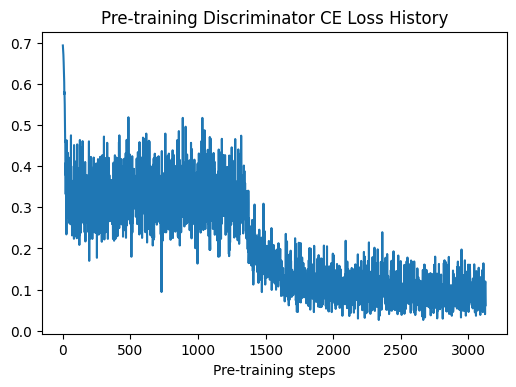

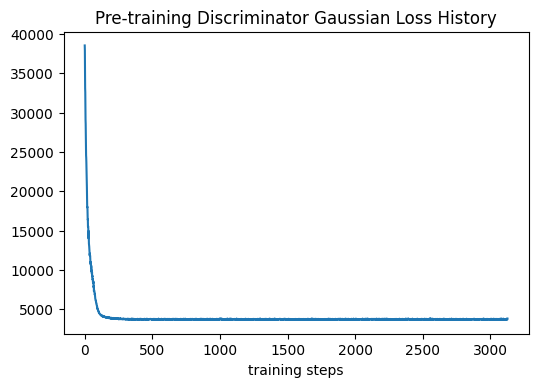

In [11]:
x = range(len(pretrain_disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_token_loss_history)
plt.title('Pre-training Discriminator CE Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_gaussian_loss_history)
plt.title('Pre-training Discriminator Gaussian Loss History')
plt.xlabel('training steps')

### Save Pretrained D

In [12]:
if not os.path.exists('./gan_model_weights/pretrain_40000_disc/'):
    os.makedirs('./gan_model_weights/pretrain_40000_disc/')
    
D_save_path = './gan_model_weights/pretrain_40000_disc/model.tf'
pretrained_discriminator.save_weights(D_save_path)

In [13]:
reload_pretrained_disc = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

reload_pretrained_disc.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_disc.load_weights(D_save_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [14]:
reload_pretrained_disc.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
event_type (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 11, 1, 5)     25          event_type[0][0]                 
__________________________________________________________________________________________________
time_delta (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 11, 5)        0           embedding_1[0][0]                
____________________________________________________________________________________________

## Code chunk

In [ ]:
# import pickle
# import numpy as np
# import tensorflow as tf

# def load_fixed_length_sequence_from_pickle(pickle_file_path, to_timedelta=True, end_token=0):
#     """
#         A list of sequence in format of (event_type, timestamp)
#         [[(1, 11), (1, 24), (2, 37), (3, 47), (2, 63), (2, 80), (1, 88), (2, 95), (2, 104), (3, 111)], ...]
#     :param pickle_file_path: e.g. /.../project-basileus/seq-gan/data/fixed_length/valid_sequences.pickle
#     :param to_timedelta: if True, convert absolute time to timedelta
#     :param end_token: same as padding token. default 0
#     :return: (event_type_seqs, timestamp_seqs)
#     """
#     with open(pickle_file_path, 'rb') as f:
#         raw_seqs = pickle.load(f)

#     if not raw_seqs or not raw_seqs[0]:
#         return np.array([]), np.array([])

#     N = len(raw_seqs)
#     T = len(raw_seqs[0])

#     event_type_seqs = []
#     timestamp_seqs = []

#     for seq in raw_seqs:
#         _ets, _tss = [], []
#         ts_prev = 0
#         for et, ts in seq:
#             if et == end_token:
#                 raise ValueError('Actual data should NOT contain END_TOKEN', end_token)
#             _ets.append(et)  # 0 is for padding, standing for END_TOKEN or 'N/A'
#             if to_timedelta:
#                 _tss.append(ts - ts_prev)
#                 ts_prev = ts
#             else:
#                 _tss.append(ts)
#         event_type_seqs.append(_ets)
#         timestamp_seqs.append(_tss)

#     event_type_seqs = np.array(event_type_seqs).astype(np.float64).reshape((N, T, 1))
#     timestamp_seqs = np.array(timestamp_seqs).astype(np.float64).reshape((N, T, 1))

#     return event_type_seqs, timestamp_seqs

In [ ]:
# def create_self_regression_data_batch(original_feature_sample, END_TOKEN=0):
#     """
#         Create self regression dataset given original sequences
#         only support batch_size = 1 for now, aka, we have to pretrain the generator one seq by

#         e.g. original event type seq (including init token -1): [-1, 1, 2, 3, 1, 1, 3]
#         turns into a train dataset with the next token(softmax)/timstamp as the target
        
#         [-1, 0, 0, 0, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 0, 0, 0, 0, 0] -> 2 : [0, 0, 1.0, 0]
#         [-1, 1, 2, 0, 0, 0, 0] -> 3 : [0, 0, 0, 1.0]
#         [-1, 1, 2, 3, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 2, 3, 1, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 2, 3, 1, 1, 0] -> 3 : [0, 0, 0, 1.0]

#         same for timestamp sequence.

#     :param original_feature_sample: tuple of numpy arrays (seq_et, seq_ts), each of shape (1, T, 1)
#     :param END_TOKEN: by default 0. so that we can fill non-zero values in np.zeros
#     :return:
#     """
#     orig_seq_et, orig_seq_ts = original_feature_sample
#     _, T_orig, _ = orig_seq_et.shape

#     self_regression_et = np.zeros((T_orig - 1, T_orig, 1))
#     self_regression_ts = np.zeros((T_orig - 1, T_orig, 1))

#     self_target_token = np.zeros((T_orig - 1, 1))
#     self_target_timestamp = np.zeros((T_orig - 1, 1))

#     for i in range(T_orig - 1):
#         self_regression_et[i, :i + 1, :] = orig_seq_et[:, :i + 1, :]
#         self_regression_ts[i, :i + 1, :] = orig_seq_ts[:, :i + 1, :]

#         self_target_token[i, :] = orig_seq_et[:, i + 1, :]
#         self_target_timestamp[i, :] = orig_seq_ts[:, i + 1, :]

#     return self_regression_et, self_regression_ts, self_target_token, self_target_timestamp

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam, SGD

# def pretrain_generator(feature_sample, generator, event_vocab_dim, verbose=False, weight_gaussian_loss=1,
#                        optimizer=Adam(lr=0.001)):
#     self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
#     # self_target_timestamp is not actually needed here,
#     # because we cauculate log-likelihood of gaussian mixture fitting original input timestamps
#     # rather than comparing the next actual timestamp with a sampled timestamp from the updated gm distribution
#     N_reg = self_regression_et.shape[0]

#     ce_loss_list = []
#     gaussian_loss_list = []

#     # train the generator
#     with tf.GradientTape() as tape:
#         for i in range(N_reg):
#             curr_state_et = self_regression_et[[i], :, :]
#             curr_state_ts = self_regression_ts[[i], :, :]

#             curr_target_token = int(self_target_token[i].item())
#             curr_target_token_prob = np.zeros((event_vocab_dim,))
#             curr_target_token_prob[curr_target_token] = 1.0

#             pred_token_prob, gaussian_log, mask, alpha, mu, sigma = generator([curr_state_et, curr_state_ts])

#             gaussian_log = gaussian_log[0, 0:i + 1, 0]  # masked to the current step only
#             gaussian_loss = -tf.reduce_sum(gaussian_log)
#             ce_loss = tf.reduce_sum(tf.keras.losses.categorical_crossentropy(
#                 curr_target_token_prob, pred_token_prob, from_logits=False, label_smoothing=0))

#             ce_loss_list.append(ce_loss)
#             gaussian_loss_list.append(gaussian_loss)

#         ce_loss_batch = tf.reduce_mean(ce_loss_list)
#         gaussian_loss_batch = tf.reduce_mean(gaussian_loss_list)
#         pretrain_generator_loss_batch = ce_loss_batch + weight_gaussian_loss * gaussian_loss_batch

#         if verbose:
#             print('pretrain generator categorical cross-entropy loss:{}'.format(ce_loss_batch))
#             print('pretrain generator gaussian loss:{}'.format(gaussian_loss_batch))

#     # apply gradient decent per batch
#     grads = tape.gradient(pretrain_generator_loss_batch, generator.trainable_variables)
#     optimizer.apply_gradients(zip(grads, generator.trainable_variables))

#     return ce_loss_batch, gaussian_loss_batch


# def pretrain_discriminator(features_batch, real_labels, discriminator, verbose=False, weight_gaussian_loss=1,
#                            optimizer=Adam(lr=0.001)):
#     # train the discriminator
#     with tf.GradientTape() as tape:
#         real_et, real_ts = features_batch

#         # train discriminator
#         true_prob, gaussian_log, mask = discriminator((real_et, real_ts))

#         # calculate masked neg-likelihood of gaussian mixture
#         gaussian_log = gaussian_log[:, :, 0:1]
#         gaussian_log = tf.boolean_mask(gaussian_log, mask)
#         gaussian_loss = -tf.reduce_sum(gaussian_log)

#         # cross-entropy loss
#         ce_loss = tf.reduce_mean(
#             tf.keras.losses.binary_crossentropy(real_labels, true_prob, from_logits=False))
#         discriminator_loss = gaussian_loss * weight_gaussian_loss + ce_loss

#         if verbose:
#             print('discriminator token loss:{}'.format(ce_loss))
#             print('discriminator gaussian loss:{}'.format(gaussian_loss))
#             print('total discriminator loss:{}'.format(discriminator_loss))

#     grads = tape.gradient(discriminator_loss, discriminator.trainable_variables)
#     optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

#     return ce_loss, gaussian_loss

## Code chunk

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.layers import Input, LSTM, Embedding, Reshape, Dense
# import tensorflow_probability as tfp
# from tensorflow_probability import distributions as tfd

# from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

# tf.keras.backend.set_floatx('float64')


# def build_D(T, event_vocab_dim, emb_dim, hidden_dim=11, k_mixt=7):
#     """
#         Build a discriminator for event type sequence of shape (batch_size, T, input_dim)
#         and input event type sequence of shape (batch_size, T, 1)
#     :param T: length of the sequence
#     :param event_vocab_dim: size of event vocabulary ['na', 'start', 'click', 'install']
#     :param emb_dim: dimension of the embedding layer output for event type
#     :param hidden_dim: dimension hidden of the time lstm cell
#     :param k_mixt: num of gaussian distributions in gaussian mixture model
#     :return: discriminator D
#     """
#     # Time-LSTM:
#     i_et = Input(shape=(T, 1), name='event_type')  # input of discrete feature event type
#     i_ts = Input(shape=(T, 1), name='time_delta')  # input of continuous feature timestamp
#     mask_layer = tf.keras.layers.Masking(mask_value=0., input_shape=(T, 1))
#     masked_ts = mask_layer(i_ts)

#     embed0 = Embedding(input_dim=event_vocab_dim, output_dim=emb_dim, input_length=T, mask_zero=True)(i_et)
#     embed0 = Reshape((T, emb_dim))(embed0)  # shape=[Batch_size, T, emb_dim]
#     merged0 = tf.keras.layers.concatenate([embed0, masked_ts], axis=2)  # # shape=[Batch_size, T, emb_dim + time_dim]

#     merged0 = tf.keras.layers.LayerNormalization()(merged0)
#     merged0 = tf.keras.layers.PReLU()(merged0)

#     hm, tm = TimeLSTM1(hidden_dim, activation='selu', name='time_lstm', return_sequences=False)(merged0)

#     # gaussian mixture for time delta
#     alpha = Dense(k_mixt, activation=tf.nn.softmax, name='dense_alpha')(tm)
#     mu = Dense(k_mixt, activation=None, name='dense_mu')(tm)
#     sigma = Dense(k_mixt, activation=tf.nn.softplus, name='dense_sigma')(tm)

#     gm = tfd.MixtureSameFamily(
#         mixture_distribution=tfd.Categorical(
#             probs=alpha),
#         components_distribution=tfd.Normal(
#             loc=mu,
#             scale=sigma))

#     gaussian_log = gm.log_prob(masked_ts)  # apply gaussian mixture to time stamp input

#     # mask out zeros in time stamps
#     mask = tf.not_equal(i_ts, 0)

#     # predicted real prob
#     real_prob = Dense(1, activation='sigmoid', name='fraud_prob')(hm)

#     discriminator = Model(
#         inputs=[i_et, i_ts],
#         outputs=[real_prob, gaussian_log, mask])

#     return discriminator


# def build_G(T, event_vocab_dim, emb_dim, hidden_dim=11, k_mixt=7, return_sequence=False):
#     """
#         Build a generator for event type sequence of shape (batch_size, T, input_dim)
#         and input event type sequence of shape (batch_size, T, 1)
#     :param T: length of the sequence
#     :param event_vocab_dim: size of event vocabulary ['na', 'start', 'click', 'install']
#     :param emb_dim: dimension of the embedding layer output for event type
#     :param hidden_dim: dimension hidden of the time lstm cell
#     :param k_mixt: num of gaussian distributions in gaussian mixture model
#     :param return_sequence:
#     :return:
#     """
#     # Time-LSTM:
#     i_et = Input(shape=(T, 1), name='event_type')  # input of discrete feature event type
#     i_ts = Input(shape=(T, 1), name='time_delta')  # input of continuous feature timestamp

#     mask_layer = tf.keras.layers.Masking(mask_value=0., input_shape=(T, 1))
#     masked_ts = mask_layer(i_ts)

#     embed0 = Embedding(input_dim=event_vocab_dim, output_dim=emb_dim, input_length=T, mask_zero=True)(i_et)
#     embed0 = Reshape((T, emb_dim))(embed0)
#     merged0 = tf.keras.layers.concatenate([embed0, masked_ts], axis=2)

#     # TODO: add deep layers to lstm
#     # TODO: add activation after layer norm/batch norm
#     merged0 = tf.keras.layers.LayerNormalization()(merged0)
#     merged0 = tf.keras.layers.PReLU()(merged0)

#     hm, tm = TimeLSTM1(hidden_dim, activation='selu', name='time_lstm', return_sequences=False)(merged0)

#     # gaussian mixture for time delta
#     alpha = Dense(k_mixt, activation=tf.nn.softmax, name='dense_alpha')(tm)
#     mu = Dense(k_mixt, activation=None, name='dense_mu')(tm)
#     sigma = Dense(k_mixt, activation=tf.nn.softplus, name='dense_sigma')(tm)

#     # add regularization to sigma to avoid GM collapse
#     print('sigma > 1 !')
#     sigma = tf.clip_by_value(sigma, clip_value_min=1.0, clip_value_max=1024)

#     gm = tfd.MixtureSameFamily(
#         mixture_distribution=tfd.Categorical(
#             probs=alpha),
#         components_distribution=tfd.Normal(
#             loc=mu,
#             scale=sigma))

#     # mask out zeros in time stamps
#     mask = tf.not_equal(i_ts, 0)
#     gaussian_log = gm.log_prob(masked_ts)  # apply gaussian mixture to time stamp input

#     # predicted prob of next token
#     token_prob = Dense(event_vocab_dim, activation='softmax', name='token_prob')(hm)

#     model_gen = Model(
#         inputs=[i_et, i_ts],
#         outputs=[token_prob, gaussian_log, mask, alpha, mu, sigma])

#     return model_gen


## Debug 

In [ ]:
valid_event_type_seqs.shape

In [ ]:
for feature_sample, label_sample in pretrain_dataset.take(1):
    print('feature_sample =', feature_sample)
    print('label_sample =', label_sample)

In [ ]:
feature_sample[0].shape

In [ ]:
valid_event_type_seqs[0]